### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python - Eloise Farmer

## Assignment: Diagnostic Analysis using Python

This project applies real-world data to examine a challenge facing the National Health Service (NHS). Using Python, the analysis investigates key datasets, generates visualisations to uncover patterns, and derives insights to support evidence-based decision-making.

Through this report, the NHS seeks to better understand issues of capacity and utilisation in response to growing demand across its services. The analysis is guided by two primary business questions provided by NHS stakeholders:

- Has there been adequate staff and capacity in the networks?
- What was the actual utilisation of resources?

This notebook provides the analytical journey and coding for the project, outlining how data was explored, transformed, and visualised to address these questions. For a deeper explanation of the rationale behind each step, as well as further discussion of key concepts and sources, please refer to the accompanying technical report.

#### The Primary Datasets and Purpose of the data collection:

| Dataset | Purpose |
|---------|---------|
| **ad** (`actual_duration.csv`) | To analyse the **actual duration of appointments** delivered in the healthcare system. This helps assess service delivery efficiency, appointment time variation, and resource planning across different care settings. |
| **ar** (`appointments_regional.csv`) | To track the **number of appointments by region**, **waiting time between booking and appointment**, and **healthcare professional (HCP) type**. This supports evaluation of service accessibility, timeliness, and workforce distribution. |
| **nc** (`national_categories.xlsx`) | To provide a **monthly count of appointments** across regions and service settings, tagged by **national category**. Enables analysis of service activity trends over time and across domains.

#### What domain of care is being addressed?
All three datasets - actual_duration.csv, appointments_regional.csv, and national_categories.xlsx relate to Primary Care.

They focus on general practice appointments, including data on appointment volumes, timing, duration, healthcare professional type, and service categorisation. This supports analysis of accessibility, utilisation, and delivery of care in the primary care setting, which is the first point of contact for most patients in the NHS.

**This project utilised a Macbook an Python version 3.12.7**

In [1]:
# Check Python Version
import sys
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]


## Initial Import and Descriptive Statistics:
- Import the three indicated data sources and perform basic exploratory analysis including obtaining descriptive statistics.

### Import libraries, NHS files (ad, ar and nc) and ICB/Region names file

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import the files to DataFrames using aliases 
# Import 'actual_duration.csv' as ad_original
ad_original = pd.read_csv('actual_duration.csv')

# Import 'appointments_regional.csv' as ar_original
ar_original = pd.read_csv('appointments_regional.csv')

# Import 'national_categories.xlsx' as nc_original
nc_original = pd.read_excel('national_categories.xlsx')

# Import file of NHS region and ICB names
# I made this lookup file to merge with the DataFrames to access names of regions and ICB locations 
# This made early data exploration more clear with intuitive labels, rather than using NHS codes.
icb_region_names = pd.read_csv('icb_region_names.csv')

### Sense Check Actual Duration Data Set (ad)

In [3]:
# View the top five rows of the DataFrame
ad_original.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [4]:
# The tail() function displays the bottom five rows and confirms there is no metadata stored as a footer
ad_original.tail()

sub_icb_location_code sub_icb_location_ons_code  \
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                 sub_icb_location_name icb_ons_code region_ons_code  \
137788  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137789  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137790  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137791  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137792  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   

       appointment_date actual_duration  count_of_appointments  
137788        30-Jun-22   31-60 Minutes                    430  
137789        30-Jun-22   21-30 Minutes                    751  
137790        30-Jun-22   16-20 Minutes                    921  
137791        30-Jun-22   11-15 Minutes                   1439  
137792        30-Jun-22     1-5 Minutes                   1739

In [5]:
# The info() function displays metadata for actual_duration
# This confirms the data types for each column, the shape of the DataFrame and confirms there are no null values
ad_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [6]:
# Check for missing values
print("\nMissing values per column:\n", ad_original.isnull().sum())


Missing values per column:
 sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64


In [7]:
# Review metadata and descriptive statistics
# The describe() function gives summary statistics for any numerical columns
# The round() function is used to limit the decimal places displayed to two
ad_original.describe().round(2)

count_of_appointments
count              137793.00
mean                 1219.08
std                  1546.90
min                     1.00
25%                   194.00
50%                   696.00
75%                  1621.00
max                 15400.00

The only numerical column is 'count_of_appointments'

In [8]:
# Check for duplicates
print("Number of duplicate records in ad:",ad_original.duplicated().sum())

Number of duplicate records in ad: 0


There are no duplicate records in actual_duration

In [9]:
# Merge ad_original with icb_region_names to add columns for icb_name and region_name
ad = pd.merge(ad_original, 
              icb_region_names[['icb_ons_code', 'icb_name', 'region_name']],
              how='left', on='icb_ons_code')

# View the dataset to check the new columns are added
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  \
0        01-Dec-21           31-60 Minutes                    364   
1        01-Dec-21           21-30 Minutes                    619   
2        01-Dec-21            6-10 Minutes                   1698   
3        01-Dec-21  Unknown / Data Quality                   1277   
4        01-Dec-21           16-20 Minutes                    730   

                           icb_name               region_name  
0  North East and North Cumbria ICB  North East and Yorkshire  
1  North East and North Cumbria ICB  North East and Yorkshire  
2  North East and North Cumbria ICB  North East and Yorkshire  
3  North East and North Cumbria ICB  North East and Yorkshire  
4  North East and North Cumbria ICB  North East and Yorkshire

### Sense Check Appointments Regional Data Set (ar)

In [10]:
# View the top five rows of the DataFrame
ar_original.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [11]:
# The tail() function displays the bottom five rows and confirms there is no metadata stored as a footer
ar_original.tail()

icb_ons_code appointment_month appointment_status hcp_type  \
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10

In [12]:
# The info() function displays metadata for actual_duration.
# This confirms the data types for each column, the shape of the DataFrame and confirms there are no null values.
ar_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [13]:
# Check for missing values.
print("\nMissing values per column:\n", ar_original.isnull().sum())


Missing values per column:
 icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64


In [14]:
# Review metadata and descriptive statistics.
# The describe() function gives summary statistics for any numerical columns.
# The only numerical column is 'count_of_appointments'.
# The round() function is used to limit the decimal places displayed to two.
ar_original.describe().round(2)

count_of_appointments
count              596821.00
mean                 1244.60
std                  5856.89
min                     1.00
25%                     7.00
50%                    47.00
75%                   308.00
max                211265.00

The only numerical column is 'count_of_appointments'

In [15]:
# Check for duplicates
print("Number of duplicate records in ar:",ar_original.duplicated().sum())

Number of duplicate records in ar: 21604


There are 21,604 duplicates in the ar_original dataframe. 
Since the dataset contains aggregated appointment counts, any duplicate rows would artificially inflate total values, distort averages, 
and compromise calculations such as proportions and trends over time. This was particularly important for analyses involving comparisons across 
regions or months, and for any normalisation based on population size or record count. 

In [16]:
# Remove exact duplicate rows from 'ar' to avoid double counting in analysis
# ar_original now named as ar_dupremoved, a future merge will return its name to ar
ar_dupremoved = ar_original.drop_duplicates()

# Confirm structure and row count
ar_dupremoved.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575217 entries, 0 to 596819
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       575217 non-null  object
 1   appointment_month                  575217 non-null  object
 2   appointment_status                 575217 non-null  object
 3   hcp_type                           575217 non-null  object
 4   appointment_mode                   575217 non-null  object
 5   time_between_book_and_appointment  575217 non-null  object
 6   count_of_appointments              575217 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 35.1+ MB


It now contains 575,217 rows and 6 columns

In [17]:
# Double-check that no duplicates remain
print("Number of duplicate records in ar_dupremoved:", ar_dupremoved.duplicated().sum())

Number of duplicate records in ar_dupremoved: 0


In [18]:
# Merge ar_dupremoved with icb_region_names to add columns for icb_name and region_name
ar = pd.merge(ar_dupremoved, 
              icb_region_names[['icb_ons_code', 'icb_name', 'region_name']],
              how='left', on='icb_ons_code')

# View the dataset to check the new columns are added
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments     icb_name  \
0                             1 Day                   8107  Frimley ICB   
1                    15  to 21 Days                   6791  Frimley ICB   
2                       2 to 7 Days                  20686  Frimley ICB   
3                    22  to 28 Days                   4268  Frimley ICB   
4                     8  to 14 Days                  11971  Frimley ICB   

  region_name  
0  South East  
1  South East  
2  South East  
3  South East  
4  South East

### Sense Check National Categories Data Set (nc)

In [19]:
# View the top five rows of the DataFrame
nc_original.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [20]:
# The tail() function displays the bottom five rows and confirms there is no metadata stored as a footer
nc_original.tail()

appointment_date icb_ons_code           sub_icb_location_name  \
817389       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817390       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817391       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817392       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817393       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   

                  service_setting            context_type  \
817389  Extended Access Provision  Care Related Encounter   
817390  Extended Access Provision  Care Related Encounter   
817391  Extended Access Provision  Care Related Encounter   
817392  Extended Access Provision  Care Related Encounter   
817393  Extended Access Provision  Care Related Encounter   

                   national_category  count_of_appointments appointment_month  
817389   Unplanned Clinical Activity                     12           2022-06  
817390               Planned Clinics                      4           2022-06  
817391    Planned Clinical Procedure                     92           2022-06  
817392  General Consultation Routine                      4           2022-06  
817393    General Consultation Acute                     19           2022-06

In [21]:
# The info() function displays metadata for national_categories
# This confirms the data types for each column, the shape of the DataFrame and confirms there are no null values.
nc_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [22]:
# Check for missing values.
print("\nMissing values per column:\n", nc_original.isnull().sum())


Missing values per column:
 appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


In [23]:
# Review metadata and descriptive statistics
# The describe() function gives summary statistics for any numerical columns
# The round() function is used to limit the decimal places displayed to two
nc_original.describe().round(2) 

appointment_date  count_of_appointments
count                         817394              817394.00
mean   2022-01-16 00:50:35.860796160                 362.18
min              2021-08-01 00:00:00                   1.00
25%              2021-10-25 00:00:00                   7.00
50%              2022-01-18 00:00:00                  25.00
75%              2022-04-07 00:00:00                 128.00
max              2022-06-30 00:00:00               16590.00
std                              NaN                1084.58

In the nc dataframe, appointment_date has a data type of datetime64 therefore appears in the statistics. The date/time columns are converted for later in the notebook.

In [24]:
# Check for duplicates
# There are no duplicate records in national_categories
print("Number of duplicate records in nc:",nc_original.duplicated().sum())

Number of duplicate records in nc: 0


There are no duplicate records in the nc_original dataframe

In [25]:
# Merge nc_original with icb_region_names to add columns for icb_name and region_name
nc = pd.merge(nc_original, 
              icb_region_names[['icb_ons_code', 'icb_name', 'region_name']],
              how='left', on='icb_ons_code')

# View the dataset to check the new columns are added
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month                          icb_name  \
0           2021-08  North East and North Cumbria ICB   
1           2021-08  North East and North Cumbria ICB   
2           2021-08  North East and North Cumbria ICB   
3           2021-08  North East and North Cumbria ICB   
4           2021-08  North East and North Cumbria ICB   

                region_name  
0  North East and Yorkshire  
1  North East and Yorkshire  
2  North East and Yorkshire  
3  North East and Yorkshire  
4  North East and Yorkshire

## Exploration of Datasets 
#### Organised via key questions 
##### This initial exploration looks at gaining a broader understanding of the dataset to guide specific analysis. Additional queries were introduced along the analytical journey.

**Question 1:** How many locations are there in the data set?

NHS England is divided into 7 regions, 42 ICBs (Integrated Care Boards) and 106 sub-ICB locations.

Although the dataset includes more granular sub-ICB location data, the analysis tends to focus on ICB-level data using the icb_ons_code field. This ensures alignment with NHS regional structures, avoids duplication across sub-regions, and supports clearer, more streamlined comparisons across the 42 ICBs in England.
That was also a reason for adding the ICB_name and region_name to each dataset. 

In [26]:
# Count of all location types in the dataset

# NHS Region level – the broadest geographic division
print("Number of NHS Regions (region_ons_code):", ad["region_ons_code"].nunique())

# ICB level – Integrated Care Boards that sit under regions
print("Number of ICB Locations (icb_ons_code):", ad["icb_ons_code"].nunique())

# Human-readable names for Sub-ICB locations
print("Number of Sub-ICB Location Names (sub_icb_location_name):", ad["sub_icb_location_name"].nunique())

Number of NHS Regions (region_ons_code): 7
Number of ICB Locations (icb_ons_code): 42
Number of Sub-ICB Location Names (sub_icb_location_name): 106


In [27]:
#List of sub ICB locations to better understand the landscape

# Extract and sort the unique sub-ICB names
sub_icb_list = sorted(nc['sub_icb_location_name'].dropna().unique())

# Create a DataFrame to display cleanly
sub_icb_df = pd.DataFrame(sub_icb_list, columns=['sub_icb_location_name'])

# Show the total count and display the list
print(f"Total unique sub-ICB locations: {len(sub_icb_df)}")
sub_icb_df

Total unique sub-ICB locations: 106


sub_icb_location_name
0    NHS Bath and North East Somerset Swindon and W...
1    NHS Bedfordshire Luton and Milton Keynes ICB -...
2                NHS Birmingham and Solihull ICB - 15E
3                        NHS Black Country ICB - D2P2L
4    NHS Bristol North Somerset and South Glouceste...
..                                                 ...
101                       NHS West Yorkshire ICB - 02T
102                       NHS West Yorkshire ICB - 03R
103                       NHS West Yorkshire ICB - 15F
104                       NHS West Yorkshire ICB - 36J
105                     NHS West Yorkshire ICB - X2C4Y

[106 rows x 1 columns]

**Question 2:** What are the five locations with the highest number of records?

While initially analysing the number of records per location, I found that many sub-ICB areas had identical or similar record counts.
This is likely due to the structured nature of the data submission, rather than reflecting actual activity levels.
Therefore, record count does not provide meaningful insight into service utilisation or demand.
To better assess how busy each location was, I **instead analysed the total number of appointments using the 'count_of_appointments' column.**

**Key Insight:**

Within the ad and nc dateframe, the top five sub ICB locations are:
1. North West London
2. North East London
3. Kent and Medway
4. Hampshire and Isle of Wight
5. South East London. 

The appointments_regional dataset (ar) does not include sub-ICB location names, so I used icb level instead. Based on this:

- North East and North Cumbria ICB had the highest volume of appointments
- West Yorkshire ICB and Greater Manchester were also among the top

**Top 5 by Record Count**

In [28]:
#ad dataset
print("Top 5 sub-ICB locations by number of records in 'ad':")
print(ad['sub_icb_location_name'].value_counts().head(5))

Top 5 sub-ICB locations by number of records in 'ad':
sub_icb_location_name
NHS Norfolk and Waveney ICB - 26A                       1484
NHS Kent and Medway ICB - 91Q                           1484
NHS North West London ICB - W2U3Z                       1484
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y    1484
NHS Greater Manchester ICB - 14L                        1484
Name: count, dtype: int64


In [29]:
#nc dataset
print("Top 5 sub-ICB locations by number of records in 'nc':")
print(nc['sub_icb_location_name'].value_counts().head(5))

Top 5 sub-ICB locations by number of records in 'nc':
sub_icb_location_name
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: count, dtype: int64


**Top 5 by Appointment Count** 

In [30]:
# Top 5 Sub-ICB Locations by appointment volume in the ad dataset
top_sub_icbs_ad = ad.groupby('sub_icb_location_name')['count_of_appointments']\
                    .sum()\
                    .sort_values(ascending=False)\
                    .head(5)

print(" Top 5 Sub-ICB Locations by Appointment Volume (actual_duration dataset):")
print(top_sub_icbs_ad.to_string())

 Top 5 Sub-ICB Locations by Appointment Volume (actual_duration dataset):
sub_icb_location_name
NHS North West London ICB - W2U3Z              6976986
NHS North East London ICB - A3A8R              5341883
NHS Kent and Medway ICB - 91Q                  5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V    4712737
NHS South East London ICB - 72Q                4360079


In [31]:
# Top 5 Sub-ICB Locations by appointment volume in the nc dataset
top_sub_icbs_nc = nc.groupby('sub_icb_location_name')['count_of_appointments']\
                    .sum()\
                    .sort_values(ascending=False)\
                    .head(5)

print(" Top 5 Sub-ICB Locations by Appointment Volume (national_categories dataset):")
print(top_sub_icbs_nc.to_string())

 Top 5 Sub-ICB Locations by Appointment Volume (national_categories dataset):
sub_icb_location_name
NHS North West London ICB - W2U3Z              12142390
NHS North East London ICB - A3A8R               9588891
NHS Kent and Medway ICB - 91Q                   9286167
NHS Hampshire and Isle Of Wight ICB - D9Y0V     8288102
NHS South East London ICB - 72Q                 7850170


In [32]:
# Top 5 ICB Locations by appointment volume in the ar dataset
# 'sub_icb_location_name' is not available in the ar dataset, so 'icb_name' is used for location-based analysis
# This still provides meaningful insight at a mid-level geographic scale

top_icbs_ar = ar.groupby('icb_name')['count_of_appointments']\
                .sum()\
                .sort_values(ascending=False)\
                .head(5)

print(" Top 5 ICB Locations by Appointment Volume (appointments_regional dataset):")
print(top_icbs_ar.to_string())

 Top 5 ICB Locations by Appointment Volume (appointments_regional dataset):
icb_name
North East and North Cumbria ICB    43054121
West Yorkshire ICB                  36075020
Greater Manchester ICB              34003953
Cheshire and Merseyside ICB         33064205
North West London ICB               29380767


**Question 3:** Which region had the highest sum of appointments?

Highest number of appointments was The Midlands, accounting for 20% of all recorded appointments. The Midlands (comprising the East Midlands and West Midlands) has a combined population representing 16% of the UK population.

In contrast, the region with the lowest share of appointments was the South East, delivering 10.9% of total appointments. The South West has a population of approximately 5.7 million, which is 14% of the UK population [Office for National Statistics](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates).

This graph is explored in the notebook, alongside additional regional analysis. 


In [33]:
# Group and sum total appointments by region
total_appointments = ar.groupby('region_name')['count_of_appointments'].sum().reset_index()

# Calculate overall total
total_sum = total_appointments['count_of_appointments'].sum()

# Calculate percentage of total appointments per region
total_appointments['percentage_of_total'] = (
    total_appointments['count_of_appointments'] / total_sum * 100
).round(1)

# Sort by percentage descending
total_appointments_sorted = total_appointments.sort_values('percentage_of_total', ascending=False)

# Display table
total_appointments_sorted

region_name  count_of_appointments  percentage_of_total
2                  Midlands              143604685                 20.3
3  North East and Yorkshire              121376383                 17.2
1                    London              107684862                 15.2
4                North West               88555435                 12.5
0           East of England               86200941                 12.2
6                South West               82969302                 11.7
5                South East               77278861                 10.9

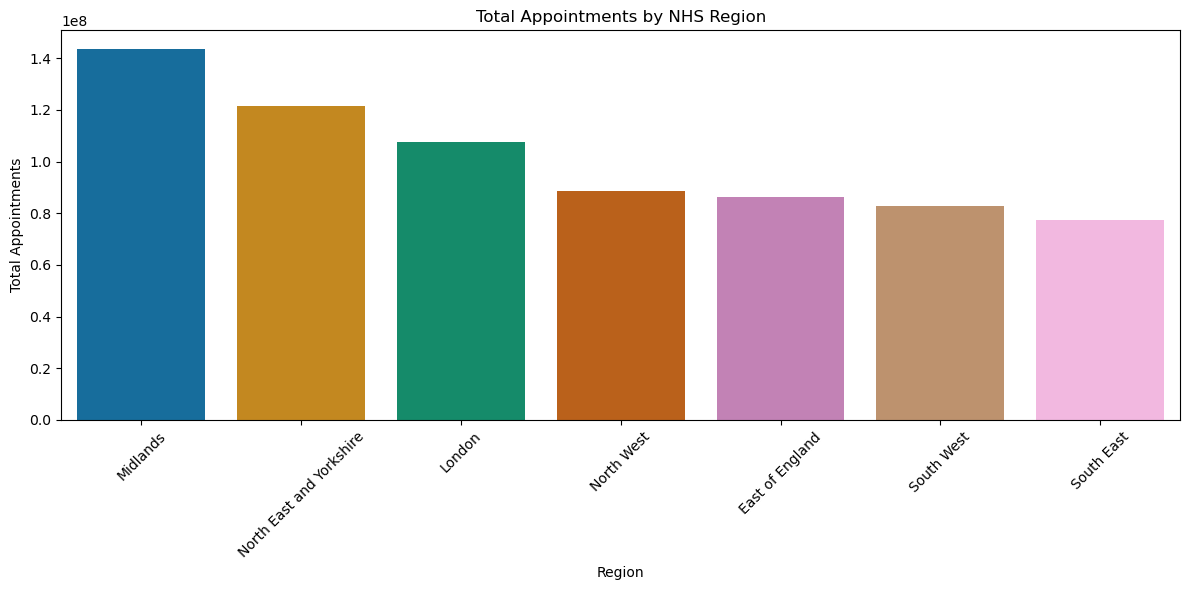

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum total appointments per region
total_appointments = ar.groupby('region_name')['count_of_appointments'].sum().reset_index()

# Sort regions by total appointments (descending)
total_appointments_sorted = total_appointments.sort_values('count_of_appointments', ascending=False)

# Plot with colorblind palette
plt.figure(figsize=(12, 6))
sns.barplot(
    data=total_appointments_sorted,
    x='region_name',
    y='count_of_appointments',
    palette='colorblind'
)
plt.title('Total Appointments by NHS Region')
plt.xlabel('Region')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Question 4:** How many service settings, context types, national categories, and appointment statuses are there?

- There are 5 service settings: Primary Care Network, Other, General Practice, Unmapped and Extended Access Provision
- There are 3 context types: Care Related Encounter, Unmapped, Inconsistent Mapping
- There are 18 national categories
- There are 3 appointment statuses: Attended, DNA and Unknown

In [35]:
# Determine the number of service settings
# Count unique service settings
print("Number of service settings:", nc["service_setting"].nunique())

# List all unique service setting types in the dataset
print("Types of service settings:\n", nc["service_setting"].unique())

Number of service settings: 5
Types of service settings:
 ['Primary Care Network' 'Other' 'General Practice' 'Unmapped'
 'Extended Access Provision']


In [36]:
# Determine the number of context types
# Count unique context types
print("Number of context types:", nc["context_type"].nunique())

# List all unique context types in the dataset
print("Context Types:\n", nc["context_type"].unique())

Number of context types: 3
Context Types:
 ['Care Related Encounter' 'Unmapped' 'Inconsistent Mapping']


In [37]:
# Determine the number of national categories
# Count unique national categories
print("Number of national categories:", nc["national_category"].nunique())

# List all unique national categories in the dataset
print("National Categories:\n", nc["national_category"].unique())

Number of national categories: 18
National Categories:
 ['Patient contact during Care Home Round' 'Planned Clinics' 'Home Visit'
 'General Consultation Acute' 'Structured Medication Review'
 'Care Home Visit' 'Unmapped' 'Clinical Triage'
 'Planned Clinical Procedure' 'Inconsistent Mapping'
 'Care Home Needs Assessment & Personalised Care and Support Planning'
 'General Consultation Routine'
 'Service provided by organisation external to the practice'
 'Unplanned Clinical Activity' 'Social Prescribing Service'
 'Non-contractual chargeable work'
 'Group Consultation and Group Education' 'Walk-in']


In [38]:
# Determine the number of appointment statuses
# Count unique appointment statuses
print("Number of appointment statuses:", ar["appointment_status"].nunique())

# List all unique appointment status types in the dataset
print("Types of appointment statuses:\n", ar["appointment_status"].unique())

Number of appointment statuses: 3
Types of appointment statuses:
 ['Attended' 'DNA' 'Unknown']


**Question 5:** Which appointment characteristics account for the highest volume of activity? (Context Type, National Category, Service Setting)

**Context Type**

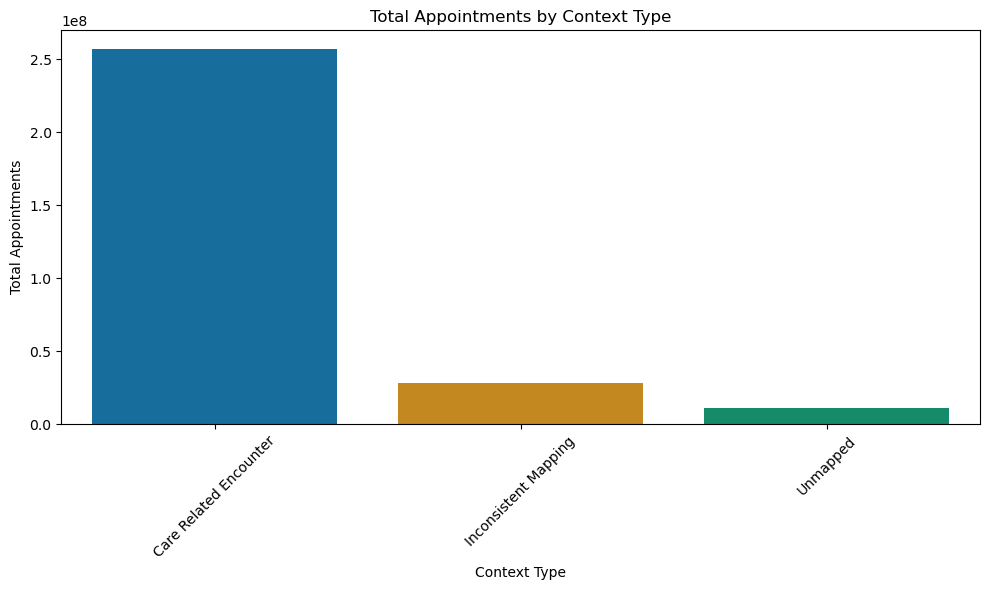

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and sum appointments by context type
context_totals = nc.groupby('context_type')['count_of_appointments'].sum().reset_index()

# Sort in descending order
context_totals = context_totals.sort_values('count_of_appointments', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=context_totals, x='context_type', y='count_of_appointments', palette='colorblind')
plt.title('Total Appointments by Context Type')
plt.xlabel('Context Type')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Care Related Encounter dominates however the other categories represent data quality issues so this plot has little value and was not included for the business presentation and technical report.

**National Category**

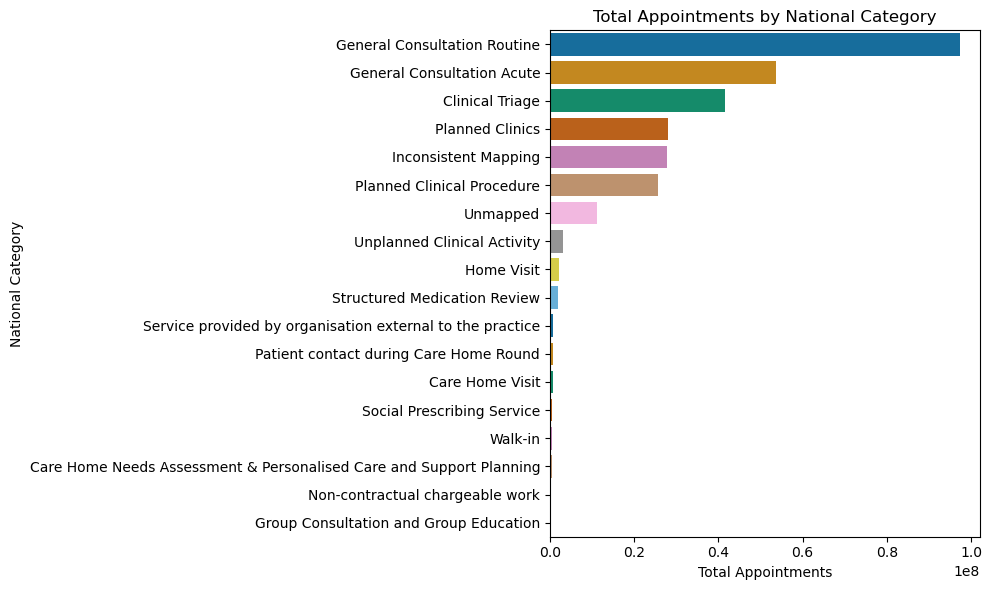

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and sum appointments by national category
category_totals = nc.groupby('national_category')['count_of_appointments'].sum().reset_index()

# Sort by appointment count (descending)
category_totals = category_totals.sort_values('count_of_appointments', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=category_totals,
    y='national_category',
    x='count_of_appointments',
    palette='colorblind'
)
plt.title('Total Appointments by National Category')
plt.ylabel('National Category')
plt.xlabel('Total Appointments')
plt.tight_layout()
plt.show()

General Consultation Routine has the highest count, followed by General Consultation Acute. This is logical given the data is GP data. This result is important to check but was not selected for the technical report or business presentation due to low level insights. 

**Service Setting**

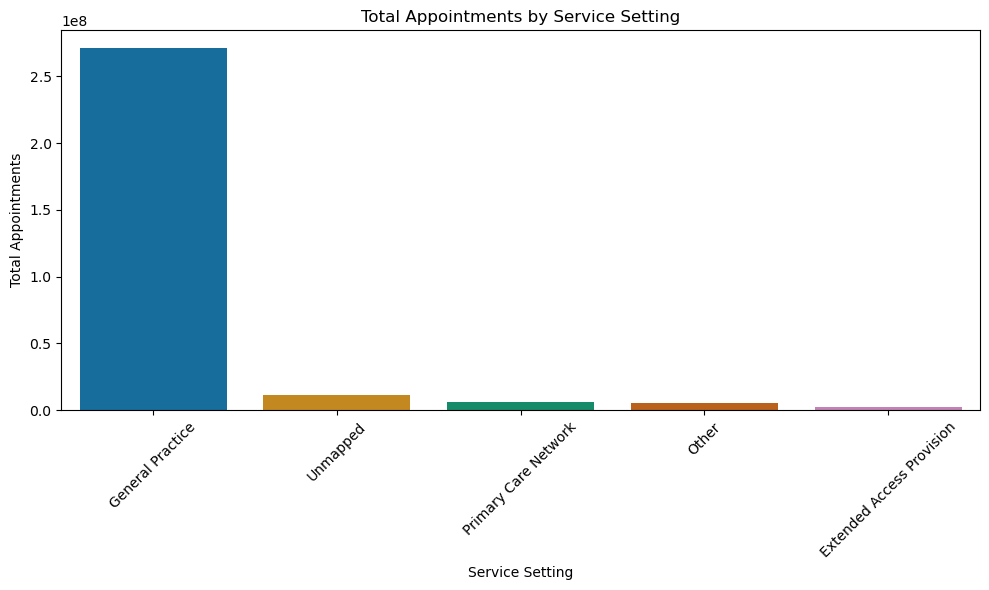

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and sum appointments by service setting
service_totals = nc.groupby('service_setting')['count_of_appointments'].sum().reset_index()

# Sort by appointment count (descending)
service_totals = service_totals.sort_values('count_of_appointments', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=service_totals,
    x='service_setting',
    y='count_of_appointments',
    palette='colorblind'
)
plt.title('Total Appointments by Service Setting')
plt.xlabel('Service Setting')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

General Practice dominates, would be interesting to calculate percentages.

In [42]:
# Calculate the percentage for each service setting
import pandas as pd

# Group and sum appointments by service setting
service_totals = nc.groupby('service_setting')['count_of_appointments'].sum().reset_index()

# Calculate total number of appointments
total_appointments = service_totals['count_of_appointments'].sum()

# Calculate percentage of total
service_totals['percentage_of_total'] = (
    service_totals['count_of_appointments'] / total_appointments * 100
).round(1)

# Sort for readability
service_totals_sorted = service_totals.sort_values('percentage_of_total', ascending=False)

# Display the table
service_totals_sorted

service_setting  count_of_appointments  percentage_of_total
1           General Practice              270811691                 91.5
4                   Unmapped               11080810                  3.7
3       Primary Care Network                6557386                  2.2
2                      Other                5420076                  1.8
0  Extended Access Provision                2176807                  0.7

General Practice dominates reflecting its central role in primary care delivery

**Question 6:** Between what dates were appointments scheduled? 

- In ad dataset, appointments run from 1st December 2021 - 30th June 2022 (7 months).
- In ar dataset, appointments run from January 2020 - June 2022 (30 months). ar provides month level data. 
- In nc dataset, appointments run from 1st August 2021 - 30th June 2022 (11 months). nc has both appointment_month and appointment_date.

In [43]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [44]:
# View the first five rows of appointment_month for the nc DataFrame to determine the date format.
nc['appointment_month'].head()

0    2021-08
1    2021-08
2    2021-08
3    2021-08
4    2021-08
Name: appointment_month, dtype: object

Ensured all files had consistent date formats for future analysis
Converted the relevant date columns to datetime format using `pd.to_datetime()`

In [45]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DataFrame.
ad[['appointment_date']].head()

appointment_date
0       2021-12-01
1       2021-12-01
2       2021-12-01
3       2021-12-01
4       2021-12-01

In [46]:
# Change the format of ar['appointment_month'] to datetime.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# View the DataFrame.
ar[['appointment_month']].head()

appointment_month
0        2020-01-01
1        2020-01-01
2        2020-01-01
3        2020-01-01
4        2020-01-01

In [47]:
# Change the format of nc['appointment_month'] to datetime.
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])

# View the DataFrame.
nc[['appointment_month']].head()

appointment_month
0        2021-08-01
1        2021-08-01
2        2021-08-01
3        2021-08-01
4        2021-08-01

In [48]:
# The nc dataframe has both appointment_month and appointment_date
# Change the date format of nc['appointment_date'].
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DataFrame.
nc[['appointment_date']].head()

appointment_date
0       2021-08-02
1       2021-08-02
2       2021-08-02
3       2021-08-02
4       2021-08-02

In [49]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
print("Earliest appointment in ad:", ad['appointment_date'].min())
print("Latest appointment in ad:", ad['appointment_date'].max())

Earliest appointment in ad: 2021-12-01 00:00:00
Latest appointment in ad: 2022-06-30 00:00:00


In [50]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.
print("Earliest appointment month in ar:", ar['appointment_month'].min().strftime('%B %Y'))
print("Latest appointment month in ar:", ar['appointment_month'].max().strftime('%B %Y'))

Earliest appointment month in ar: January 2020
Latest appointment month in ar: June 2022


In [51]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print("Earliest appointment in nc:", nc['appointment_date'].min())
print("Latest appointment in nc:", nc['appointment_date'].max())

Earliest appointment in nc: 2021-08-01 00:00:00
Latest appointment in nc: 2022-06-30 00:00:00


**Question 7:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

The most popular service setting in NHS North West London between 1 January and 1 June 2022 was General Practice, with a total of 4,804,239 appointments. This suggests high demand in that care setting during the specified period.

In [52]:
# For each of these service settings, determine the number of records available 
# Create a subset of the nc DataFrame to filter for NHS North West London ICB and the date range
# Filter by sub_icb_location_name and date
nc_subset = nc[
    (nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') &
    (nc['appointment_date'] >= '2022-01-01') &
    (nc['appointment_date'] <= '2022-06-01')
]
# For each of these service settings, determine the number of records available for the period and the location
# Group by service_setting and sum the count_of_appointments
service_counts = nc_subset.groupby('service_setting')['count_of_appointments'].sum().sort_values(ascending=False)

# View the output.
print(service_counts)

service_setting
General Practice             4804239
Unmapped                      391106
Other                         152897
Primary Care Network          109840
Extended Access Provision      98159
Name: count_of_appointments, dtype: int64


**Question 8:** Which month had the highest number of appointments?

The month with the highest number of appointments was **November 2021**, with a total of **30,405,070 appointments**. This peak in activity may reflect seasonal factors such as increased illness in winter, catch-up from earlier months, or year-end healthcare planning. However it is likely that the activity was driven by a post-lockdown rebound, COVID-19 booster activity, and unfilled secondary care referrals - which combined to push appointment volumes well above typical levels [Source](https://www.instituteforgovernment.org.uk/performance-tracker-2022-23/general-practice).

Both the ar and nc datasets were explored. The ad dataset was excluded due its shorter timeframe (7 months).

In [53]:
# First explored the nc dataset
# Number of appointments per month = sum of count_of_appointments by month
# Use the groupby() and sort_values() functions

# Group the data by year and month, and calculate the total number of appointments per group.
appointments_per_month = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month])['count_of_appointments'].sum()

# Sort the results in descending order to find the month with the highest number of appointments.
appointments_per_month_sorted = appointments_per_month.sort_values(ascending=False)

# View the output.
print(appointments_per_month_sorted)

appointment_date  appointment_date
2021              11                  30405070
                  10                  30303834
2022              3                   29595038
2021              9                   28522501
2022              5                   27495508
                  6                   25828078
                  1                   25635474
                  2                   25355260
2021              12                  25140776
2022              4                   23913060
2021              8                   23852171
Name: count_of_appointments, dtype: int64


In [54]:
# Compare to the ar dataset
# Group ar data by appointment_month and sum the count_of_appointments
appointments_per_month_ar = ar.groupby('appointment_month')['count_of_appointments'].sum()

# Sort the results in descending order to find the month with the highest number of appointments
appointments_per_month_ar_sorted = appointments_per_month_ar.sort_values(ascending=False)

# View the output
print(" Total Appointments per Month (appointments_regional dataset):")
print(appointments_per_month_ar_sorted)

 Total Appointments per Month (appointments_regional dataset):
appointment_month
2021-11-01    30395923
2021-10-01    30296850
2022-03-01    29586020
2021-09-01    28514685
2020-10-01    28296051
2022-05-01    27478652
2021-03-01    27216974
2020-01-01    27191758
2021-06-01    26775653
2020-09-01    26706462
2022-06-01    25819426
2021-07-01    25728662
2022-01-01    25623928
2022-02-01    25344812
2021-12-01    25132174
2020-11-01    25056131
2020-02-01    24097066
2020-03-01    24039635
2022-04-01    23904960
2021-04-01    23872938
2021-08-01    23843177
2020-12-01    23528063
2021-05-01    23488728
2020-07-01    22483207
2021-01-01    22482990
2021-02-01    22389461
2020-06-01    20678416
2020-08-01    20143878
2020-05-01    16410591
2020-04-01    16002488
Name: count_of_appointments, dtype: int64


**Question 9:** What was the total number of records per month?

The total number of records (rows) per month was calculated for each dataset:

- **ad (actual_duration):**
  Data covers December 2021 to June 2022, with ~19,000–21,000 records per month.

- **ar (appointments_regional):**
  Data spans from January 2020 to June 2022, with a very consistent monthly count of ~19,000–20,000 records.

- **nc (national_categories):**
  Starts in August 2021 and ends in June 2022. Record counts range from ~69,000 to 83,000 records per month.
  Therefore nc had the highest record volume per month.

This confirms the time coverage and volume of reporting across each dataset, which is important when comparing monthly trends or checking for data completeness.

In [55]:
# Total number of records per month
# ad: total records per month
ad_records_per_month = ad.groupby([ad['appointment_date'].dt.year, ad['appointment_date'].dt.month]).size()
print("ad records per month:")
print(ad_records_per_month)

# ar: total records per month
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])  # ensure datetime
ar_records_per_month = ar.groupby([ar['appointment_month'].dt.year, ar['appointment_month'].dt.month]).size()
print("\nar records per month:")
print(ar_records_per_month)

# nc: total records per month
nc_records_per_month = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]).size()
print("\nnc records per month:")
print(nc_records_per_month)

ad records per month:
appointment_date  appointment_date
2021              12                  19507
2022              1                   19643
                  2                   18974
                  3                   21236
                  4                   19078
                  5                   20128
                  6                   19227
dtype: int64

ar records per month:
appointment_month  appointment_month
2020               1                    20136
                   2                    19901
                   3                    20557
                   4                    18426
                   5                    17584
                   6                    18136
                   7                    18761
                   8                    18517
                   9                    19353
                   10                   19441
                   11                   19050
                   12                   18699
2021      

**Question 10:** How many appointment modes are there?

There are 5 modes with most appointments being face-to-face at 59%, followed by telephone consults at 36%.

In [56]:
# Determine the number of appointment modes
# Group the data by 'appointment_mode' and sum the total number of appointments for each mode
mode_summary = (
    ar.groupby('appointment_mode')['count_of_appointments']
    .sum()
    .reset_index()
)

# Rename the summed column to improve clarity in output
mode_summary = mode_summary.rename(columns={'count_of_appointments': 'total_appointments'})

# Calculate the overall total number of appointments across all modes
total = mode_summary['total_appointments'].sum()

# Add a new column to calculate the percentage of total appointments for each mode
mode_summary['percent_of_total'] = (mode_summary['total_appointments'] / total) * 100

# Round the percentage values to 2 decimal places for readability
mode_summary['percent_of_total'] = mode_summary['percent_of_total'].round(2)

# Sort the table in descending order
mode_summary = mode_summary.sort_values(by='total_appointments', ascending=False).reset_index(drop=True)

# Display the final summary table
mode_summary

appointment_mode  total_appointments  percent_of_total
0     Face-to-Face           439876928             59.24
1        Telephone           267752505             36.06
2          Unknown            26439308              3.56
3       Home Visit             4848743              0.65
4     Video/Online             3612275              0.49

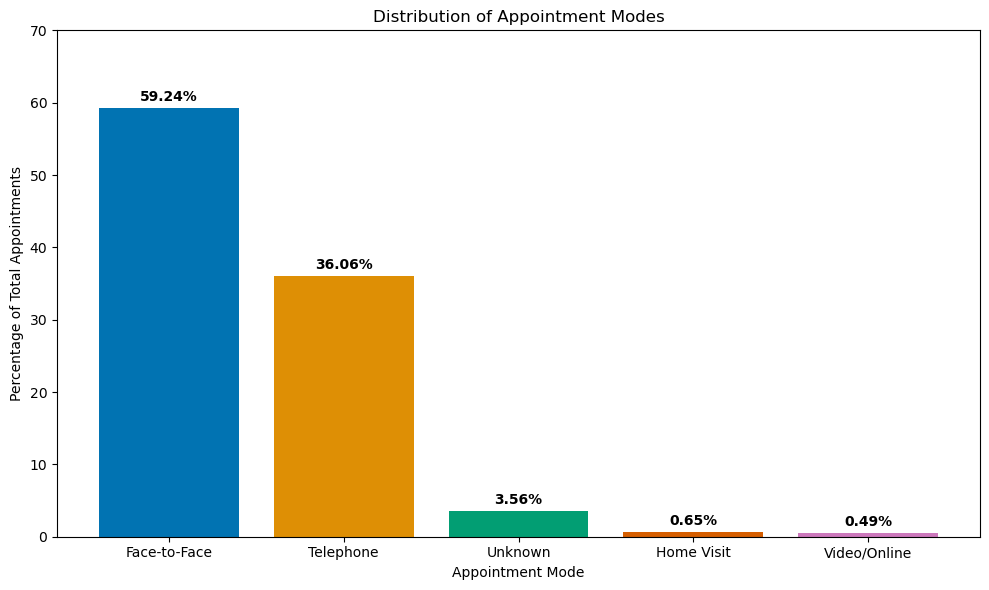

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get Seaborn's built-in colorblind-friendly palette
colorblind_colors = sns.color_palette("colorblind", n_colors=len(mode_summary))

# Plot
plt.figure(figsize=(10, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Use colorblind palette directly
plt.bar(mode_summary['appointment_mode'], mode_summary['percent_of_total'], color=colorblind_colors)

# Add labels and title
plt.xlabel('Appointment Mode')
plt.ylabel('Percentage of Total Appointments')
plt.title('Distribution of Appointment Modes')
plt.ylim(0, 70)

# Add percentage labels above each bar
for i, pct in enumerate(mode_summary['percent_of_total']):
    plt.text(i, pct + 1, f"{pct:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

This graph provides a quick snapshot of which modes are most dominant. The percentage labels make it easy for the reader to interpret. Appointment mode is discussed in detail within the business presentation and technical report so this initial graph is used to set the scene of discussion. 

**Question 11:** What are the trends in time between booking and appointment?

The time between booking and the appointment has 7 intervals and an additional 'unknown' option. 
It is positive to see that most appointments happen on the same day, followed by the 2-7 days interval. 
Perhaps this is a result of triaging based on urgency.

In [58]:
# Check how many unique time intervals exist between booking and appointment
unique_categories = ar['time_between_book_and_appointment'].nunique()
print(f"Number of unique time categories: {unique_categories}")

# Group the data by wait time category and sum total appointments in each
time_summary = (
    ar.groupby('time_between_book_and_appointment')['count_of_appointments']
    .sum()
    .reset_index()
    .rename(columns={'count_of_appointments': 'total_appointments'})
)

# Calculate the percentage of total appointments for each time interval
total = time_summary['total_appointments'].sum()
time_summary['percentage'] = (time_summary['total_appointments'] / total) * 100

# Sort the time categories by total appointments (most common first)
time_summary = time_summary.sort_values(by='total_appointments', ascending=False).reset_index(drop=True)

# View the booking-to-appointment intervals
time_summary.head(8)

Number of unique time categories: 8


time_between_book_and_appointment  total_appointments  percentage
0                          Same Day           342701908   46.153289
1                       2 to 7 Days           153749341   20.706152
2                     8  to 14 Days            86806958   11.690704
3                             1 Day            67673007    9.113844
4                    15  to 21 Days            42673981    5.747107
5                    22  to 28 Days            25503575    3.434687
6                 More than 28 Days            23024683    3.100843
7            Unknown / Data Quality              396306    0.053372

**Question 12:** What is the relationship between Telephone appointments (mode) and appointment wait time?

See summaries below each graph

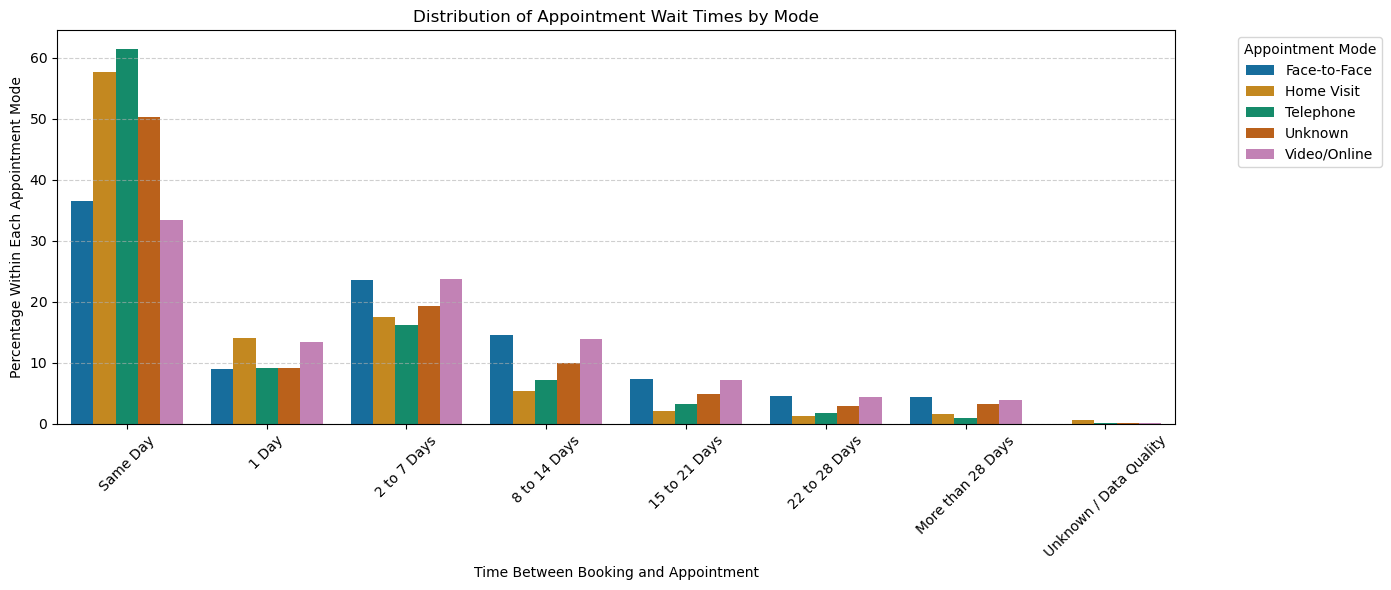

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean spacing in time categories 
ar['time_between_book_and_appointment'] = (
    ar['time_between_book_and_appointment']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

# Define the ordered time bands
time_order = [
    "Same Day", "1 Day", "2 to 7 Days", "8 to 14 Days",
    "15 to 21 Days", "22 to 28 Days", "More than 28 Days", "Unknown / Data Quality"
]

ar['time_between_book_and_appointment'] = pd.Categorical(
    ar['time_between_book_and_appointment'],
    categories=time_order,
    ordered=True
)

# Group by mode and wait time, and calculate total
mode_wait = (
    ar.groupby(['appointment_mode', 'time_between_book_and_appointment'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Calculate percentages within each mode
mode_totals = mode_wait.groupby('appointment_mode')['count_of_appointments'].sum().reset_index()
mode_totals = mode_totals.rename(columns={'count_of_appointments': 'total'})
mode_wait = mode_wait.merge(mode_totals, on='appointment_mode')
mode_wait['percent'] = (mode_wait['count_of_appointments'] / mode_wait['total']) * 100

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=mode_wait,
    x='time_between_book_and_appointment',
    y='percent',
    hue='appointment_mode',
    palette='colorblind'
)

plt.title('Distribution of Appointment Wait Times by Mode')
plt.xlabel('Time Between Booking and Appointment')
plt.ylabel('Percentage Within Each Appointment Mode')
plt.xticks(rotation=45)
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This chart illustrates the percentage distribution of appointment wait times across different appointment modes. It highlights that:

- Telephone and Home Visit appointments are most likely to occur on the same day, with 60% of appointments in those modes delivered immediately.
- Face-to-face appointments are more evenly spread, with notable proportions occurring 1–14 days after booking, suggesting longer lead times for in-person care.
- Video/Online appointments, though less frequent overall, also show high same-day delivery.
- Wait times beyond 2 weeks are less common across all modes, but still present, especially for in-person modes.
- This visual supports the finding that appointment mode has a clear influence on wait time, reinforcing that telephone and digital consults may help reduce delays in access.

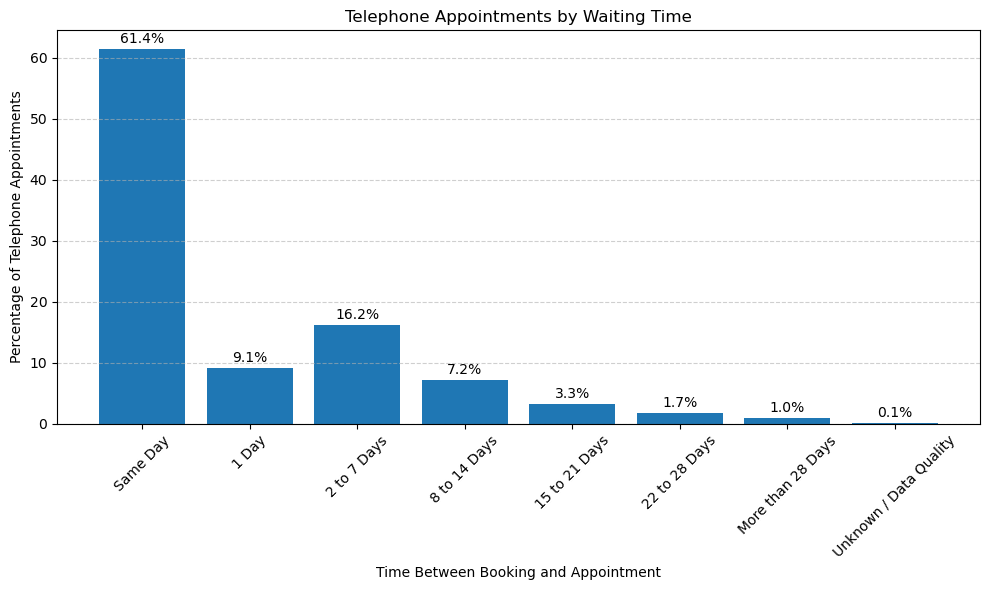

In [60]:
# Visualised with Telephone only
import matplotlib.pyplot as plt

# Filter to Telephone only and clean
telephone_wait = mode_wait[mode_wait['appointment_mode'] == 'Telephone'][[
    'time_between_book_and_appointment', 'percent'
]].sort_values('time_between_book_and_appointment')

# Round percentages
telephone_wait['percent'] = telephone_wait['percent'].round(2)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(
    telephone_wait['time_between_book_and_appointment'],
    telephone_wait['percent'],
    color='#1f77b4'  # Optional: consistent blue for Telephone
)

# Annotate with percentage values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Style
plt.title('Telephone Appointments by Waiting Time')
plt.xlabel('Time Between Booking and Appointment')
plt.ylabel('Percentage of Telephone Appointments')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The project focuses on the impacts of wait time so it was useful to isolate telephone for visual impact. The percentages were used in discussion. This was not used in the business presentation or technical report as it does not cover enough information, compared to other visualisations. Instead the graph below was selected as it compared 2 modes via appointment wait time. 

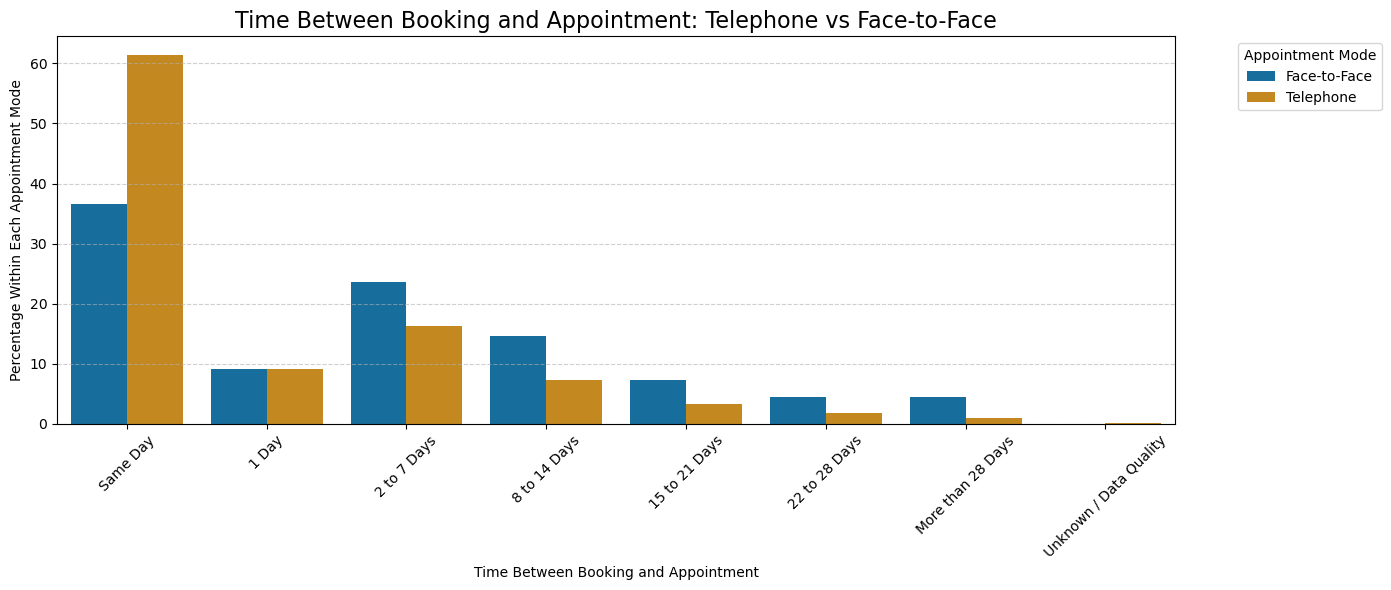

In [61]:
# Filter the bar graph to Telephone and face to face only 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean spacing in time categories again (in case not done)
ar['time_between_book_and_appointment'] = (
    ar['time_between_book_and_appointment']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

# Define the ordered time bands
time_order = [
    "Same Day", "1 Day", "2 to 7 Days", "8 to 14 Days",
    "15 to 21 Days", "22 to 28 Days", "More than 28 Days", "Unknown / Data Quality"
]

ar['time_between_book_and_appointment'] = pd.Categorical(
    ar['time_between_book_and_appointment'],
    categories=time_order,
    ordered=True
)

# Group by mode and wait time, and calculate total
mode_wait_filtered = (
    ar[ar['appointment_mode'].isin(['Telephone', 'Face-to-Face'])]
    .groupby(['appointment_mode', 'time_between_book_and_appointment'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Calculate percentages within each mode
mode_totals = mode_wait_filtered.groupby('appointment_mode')['count_of_appointments'].sum().reset_index()
mode_totals.rename(columns={'count_of_appointments': 'total'}, inplace=True)
mode_wait_filtered = mode_wait_filtered.merge(mode_totals, on='appointment_mode')
mode_wait_filtered['percent'] = (mode_wait_filtered['count_of_appointments'] / mode_wait_filtered['total']) * 100

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=mode_wait_filtered,
    x='time_between_book_and_appointment',
    y='percent',
    hue='appointment_mode',
    palette='colorblind'
)

plt.title('Time Between Booking and Appointment: Telephone vs Face-to-Face', fontsize=16)
plt.xlabel('Time Between Booking and Appointment')
plt.ylabel('Percentage Within Each Appointment Mode')
plt.xticks(rotation=45)
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This bar graph compares telephone and face-to-face appointments, revealing that telephone appointments are far more likely to be delivered on the same day. In fact, over 60% of telephone appointments are same-day, compared to over 35% for face-to-face. This reflects the greater flexibility and lower operational burden of telephone consultations.

**Question 13:** Is there a relationship between appointment waiting time and attendance?

Shorter waits, especially same-day bookings, are strongly associated with higher attendance, while appointments scheduled further in advance are more likely to be missed or go unrecorded. This suggests that improving rapid access to appointments - especially for high-risk groups - could reduce DNAs and improve system efficiency.

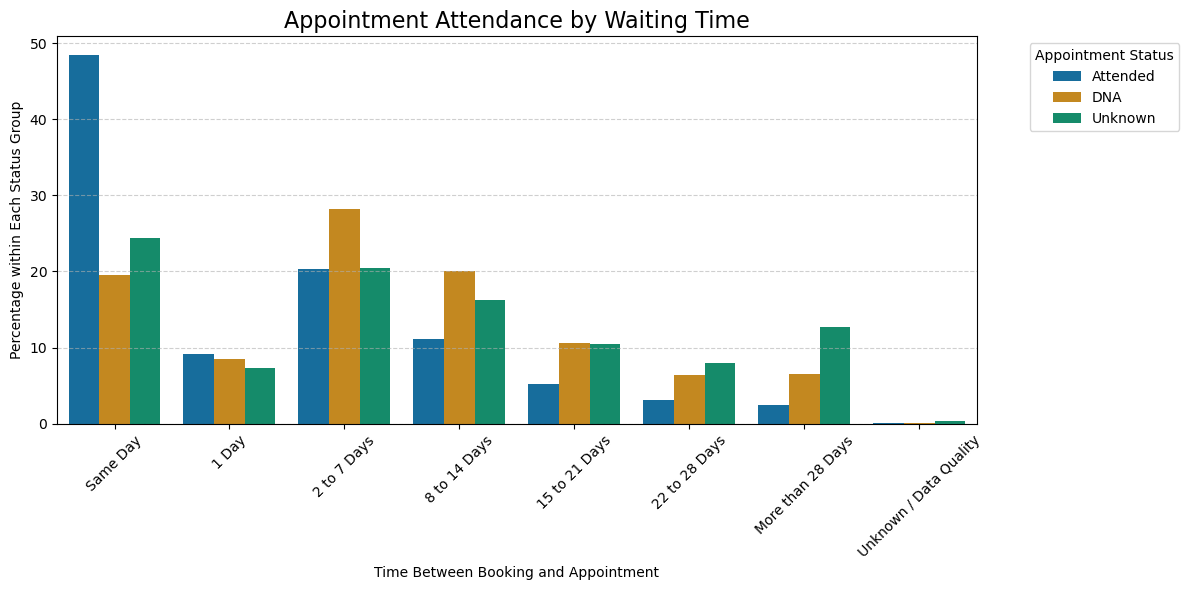

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean up spacing in time_between_book_and_appointment
# Ensure all entries are string before cleaning
ar['time_between_book_and_appointment'] = (
    ar['time_between_book_and_appointment']
    .astype(str)  
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

# Define consistent time order
time_order = [
    "Same Day", "1 Day", "2 to 7 Days", "8 to 14 Days",
    "15 to 21 Days", "22 to 28 Days", "More than 28 Days",
    "Unknown / Data Quality"
]

# Convert to ordered categorical
ar['time_between_book_and_appointment'] = pd.Categorical(
    ar['time_between_book_and_appointment'],
    categories=time_order,
    ordered=True
)

# Group by appointment_status and wait time
status_wait = (
    ar.groupby(['appointment_status', 'time_between_book_and_appointment'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Calculate total per appointment status
status_totals = status_wait.groupby('appointment_status')['count_of_appointments'].sum().reset_index()
status_totals.rename(columns={'count_of_appointments': 'total'}, inplace=True)

# Merge totals and compute percentages
status_wait = status_wait.merge(status_totals, on='appointment_status')
status_wait['percent'] = (status_wait['count_of_appointments'] / status_wait['total']) * 100

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=status_wait,
    x='time_between_book_and_appointment',
    y='percent',
    hue='appointment_status',
    palette='colorblind'
)

plt.title('Appointment Attendance by Waiting Time', fontsize=16)
plt.xlabel('Time Between Booking and Appointment')
plt.ylabel('Percentage within Each Status Group')
plt.xticks(rotation=45)
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Question 14:** Do Telephone appointments have greater attendance than other modes e.g. F2F?

Yes, Telephone appointments have a 95% attendance rate, compared to 89% for face-to-face. This suggests that remote consultations may support greater appointment adherence, likely due to their convenience and flexibility for patients.

In [63]:
# Filter to Telephone and Face-to-Face only
filtered = ar[ar['appointment_mode'].isin(['Telephone', 'Face-to-Face'])]

# Group by mode and appointment status
mode_status = (
    filtered.groupby(['appointment_mode', 'appointment_status'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Pivot to wide format
mode_pivot = mode_status.pivot(index='appointment_mode', columns='appointment_status', values='count_of_appointments').fillna(0)

# Calculate total and attendance rate
mode_pivot['total'] = mode_pivot.sum(axis=1)
mode_pivot['attendance_rate'] = (mode_pivot.get('Attended', 0) / mode_pivot['total']) * 100

# Reorder columns for clarity
columns = ['Attended', 'DNA', 'Unknown'] if 'Unknown' in mode_pivot.columns else ['Attended', 'DNA']
mode_pivot = mode_pivot[columns + ['total', 'attendance_rate']].round(2)

# Display
mode_pivot

appointment_status   Attended       DNA   Unknown      total  attendance_rate
appointment_mode                                                             
Face-to-Face        392673121  24216573  22987234  439876928            89.27
Telephone           254750500   5231667   7770338  267752505            95.14

**Question 15:** Do certain NHS Regions have greater delays in appointment waiting time?

While there are slight regional variations, no region clearly stands out as having significantly longer or shorter appointment delays. This suggests that waiting time patterns are broadly consistent across the NHS.

In [64]:
# Clean spacing in time between categories
ar['time_between_book_and_appointment'] = (
    ar['time_between_book_and_appointment']
    .astype(str)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

# Fix known formatting inconsistencies in categories
ar['time_between_book_and_appointment'] = ar['time_between_book_and_appointment'].replace({
    '8  to 14 Days': '8 to 14 Days',
    '15  to 21 Days': '15 to 21 Days',
    '22  to 28 Days': '22 to 28 Days'
})

# Define ordered categories
time_order = [
    "Same Day", "1 Day", "2 to 7 Days", "8 to 14 Days",
    "15 to 21 Days", "22 to 28 Days", "More than 28 Days",
    "Unknown / Data Quality"
]
ar['time_between_book_and_appointment'] = pd.Categorical(
    ar['time_between_book_and_appointment'],
    categories=time_order,
    ordered=True
)

# Group by region and delay
region_wait = (
    ar.groupby(['region_name', 'time_between_book_and_appointment'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Add total per region for % calculation
region_totals = region_wait.groupby('region_name')['count_of_appointments'].sum().reset_index()
region_totals.rename(columns={'count_of_appointments': 'total'}, inplace=True)

# Merge and calculate % per category within region
region_wait = region_wait.merge(region_totals, on='region_name')
region_wait['percent'] = (region_wait['count_of_appointments'] / region_wait['total']) * 100
region_wait['percent'] = region_wait['percent'].round(2)
region_wait.head(10)

region_name time_between_book_and_appointment  count_of_appointments  \
0  East of England                          Same Day               40097953   
1  East of England                             1 Day                7314083   
2  East of England                       2 to 7 Days               17169329   
3  East of England                      8 to 14 Days               10049683   
4  East of England                     15 to 21 Days                5226247   
5  East of England                     22 to 28 Days                3220274   
6  East of England                 More than 28 Days                3090698   
7  East of England            Unknown / Data Quality                  32674   
8           London                          Same Day               50831741   
9           London                             1 Day               11947829   

       total  percent  
0   86200941    46.52  
1   86200941     8.48  
2   86200941    19.92  
3   86200941    11.66  
4   86200941     6.06  
5   86200941     3.74  
6   86200941     3.59  
7   86200941     0.04  
8  107684862    47.20  
9  107684862    11.10

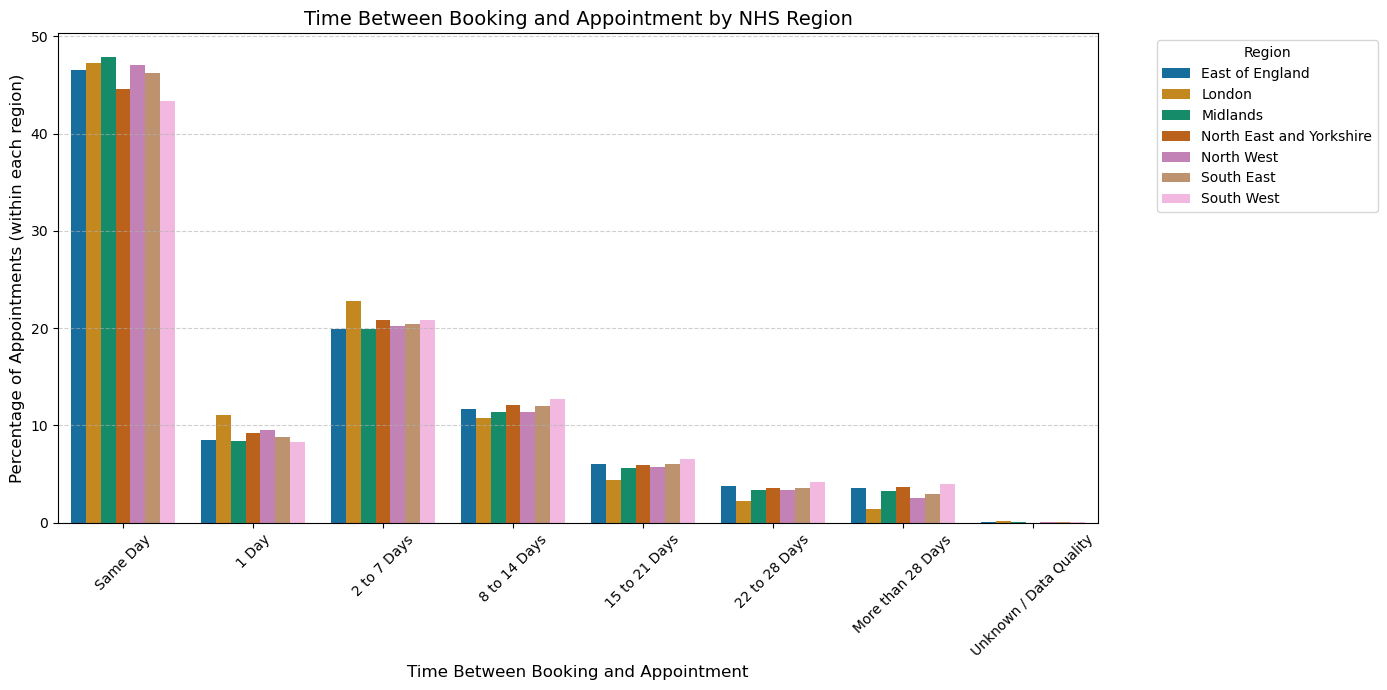

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 7))

# Plot
sns.barplot(
    data=region_wait,
    x='time_between_book_and_appointment',
    y='percent',
    hue='region_name',
    palette='colorblind' 
)

# Title and axes
plt.title('Time Between Booking and Appointment by NHS Region', fontsize=14)
plt.xlabel('Time Between Booking and Appointment', fontsize=12)
plt.ylabel('Percentage of Appointments (within each region)', fontsize=12)
plt.xticks(rotation=45)

# Legend
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

While there are slight regional variations, no region clearly stands out as having significantly longer or shorter appointment delays. This suggests that waiting time patterns are broadly consistent across the NHS.

**Question 16:** What are the different HCP types? Which is the most common?

The data uses 3 HCP categories. The most common is General Practitioner (GP) at 51% and Other Practice Staff at 45%.
The data does not provide further breakdown of Other Practice Staff but the metadata reveals this category includes:
- Acupuncturist
- Chiropodist
- Community Psychiatric Nurse
- Counsellor
- Dispenser
- District Nurse
- Health Visitor
- Interpreter/Link Worker
- Osteopath
- Other Practice Staff
- Physiotherapist
- Practice Nurse

Further breakdown by staff type would provide valuable insight into current workforce utilisation patterns and future planning opportunities.

In [66]:
# Count how many unique HCP types are in the dataset
unique_hcp_count = ar['hcp_type'].nunique()
print(f"Number of unique HCP types: {unique_hcp_count}")

# Group by HCP type and sum total appointments for each
hcp_summary = (
    ar.groupby('hcp_type')['count_of_appointments']
    .sum()
    .reset_index()
    .rename(columns={'count_of_appointments': 'total_appointments'})
)

# Calculate the overall total number of appointments
total_appointments = hcp_summary['total_appointments'].sum()

# Add a column for percentage of total appointments
hcp_summary['percent_of_total'] = (hcp_summary['total_appointments'] / total_appointments) * 100

# Round percentages for readability
hcp_summary['percent_of_total'] = hcp_summary['percent_of_total'].round(2)

# Sort in descending order of total appointments
hcp_summary = hcp_summary.sort_values(by='total_appointments', ascending=False).reset_index(drop=True)

#Display the full table (this must be the last line in the cell)
hcp_summary

Number of unique HCP types: 3


hcp_type  total_appointments  percent_of_total
0                    GP           379532056             51.11
1  Other Practice staff           339528981             45.73
2               Unknown            23468722              3.16

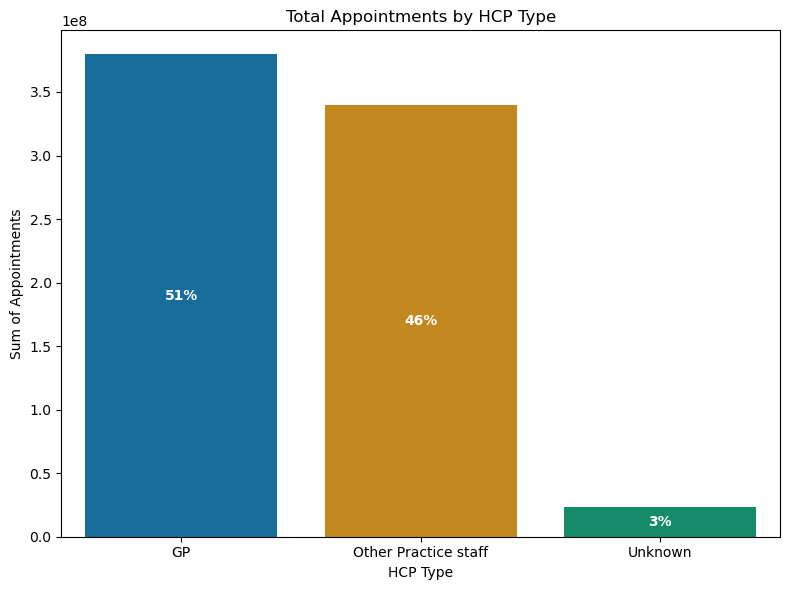

In [67]:
#Plot the HCP types 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    data=hcp_summary,
    x='hcp_type',
    y='total_appointments',
    palette='colorblind'
)

# Add % labels inside each bar
for index, row in hcp_summary.iterrows():
    plt.text(
        x=index,
        y=row['total_appointments'] * 0.5,  # halfway inside
        s=f"{int(round(row['percent_of_total']))}%",
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

# Labels and title
plt.title('Total Appointments by HCP Type')
plt.xlabel('HCP Type')
plt.ylabel('Sum of Appointments')
plt.tight_layout()
plt.show()

It is interesting to see that other HCP are only 5% behind GPs. This demonstrates that the NHS are dealing with demand by utilising other practice staff. That is, Other staff (e.g., nurses, pharmacists, physician associates) are already playing a major role in delivering care. However I wondered if other practice staff are used more for phone appointments and GPs doing more face to face appointments.

**Question 17:** What is the relationship between Appointment Mode and Health Care Professional?

See summary below bar graph

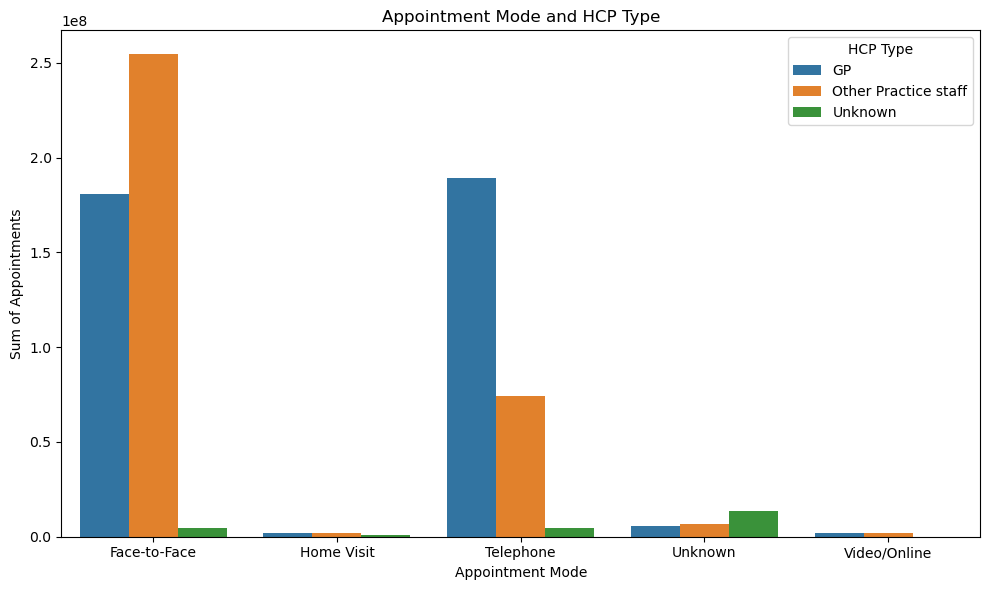

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group and aggregate
mode_hcp_summary = (
    ar.groupby(['appointment_mode', 'hcp_type'])['count_of_appointments']
    .sum()
    .reset_index()
    .rename(columns={'count_of_appointments': 'total_appointments'})
)

# Define bright manual colors for each HCP type to match other HCP presentation plot
custom_palette = {
    'GP': '#1f77b4',                 # blue 
    'Other Practice staff': '#ff7f0e',  # orange
    'Unknown': '#2ca02c'             # green
}

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=mode_hcp_summary,
    x='appointment_mode',
    y='total_appointments',
    hue='hcp_type',
    palette=custom_palette
)

# Make x-axis labels horizontal
plt.xticks(rotation=0)

# Final touches
plt.title('Appointment Mode and HCP Type')
plt.xlabel('Appointment Mode')
plt.ylabel('Sum of Appointments')
plt.legend(title='HCP Type')
plt.tight_layout()
plt.show()

While GPs are often viewed as the primary providers of in-person care, the data shows that Other Practice Staff account for the majority of face-to-face appointments. This reflects a valuable opportunity: NHS systems could invest further in non-GP roles to increase capacity for in-person care, while allowing GPs to focus on more complex, often remote, consultations.

GPs are well-positioned to deliver high volumes of remote care efficiently. Multiple studies show that they require less clinical time - on average, around 1.5 minutes shorter per consultation [Downes etl a (2017)](https://systematicreviewsjournal.biomedcentral.com/articles/10.1186/s13643-017-0529-0) [Bunn et al, 2005](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1570504/). This can translate into substantial time savings at scale. Given current appointment mode usage, NHS systems could further optimise GP schedules by increasing remote-first booking pathways, particularly for routine reviews, medication follow-ups, and triage.

While GPs remain highly efficient in delivering remote care, it’s important to recognise the growing value of Other Practice Staff in telephone consultations. These clinicians — such as nurses, pharmacists, and physician associates — are increasingly able to triage symptoms, assess urgency, issue simple prescriptions, and escalate cases to GPs only when necessary. This model not only reduces unnecessary GP workload but also increases access to timely care.

Therefore the NHS should explore increasing Other Practice Staff and increasing their involvement in Telephone consults. 

- Scale up triage-capable roles for non-GP staff:
Allow trained other practice staff to conduct remote consultations, using decision support tools where needed, to triage, issue simple prescriptions, and escalate complex cases to GPs only when necessary.

- Build clinician confidence in supervisory systems:
Teaching triage decision-making protocols to non GP staff increases triage safety and reliability, leading to lower risk and better overall quality metrics.

- Monitor workload and consult patterns:
Patient-focused evaluation of reconsultation rates (e.g., 4-week follow-up) ensures that shifted workload does not lead to inefficiencies or unmet patient need.

**Question 18:** How does HCP differ over time?

Read insights below graph

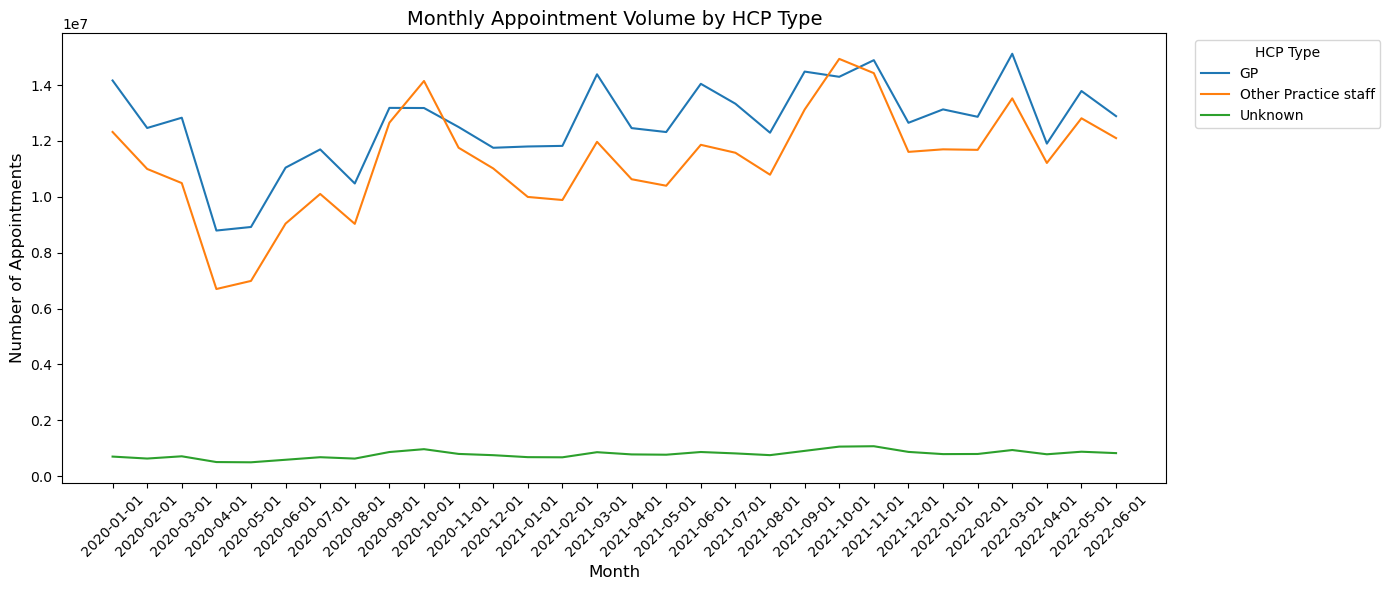

In [69]:
# Create a lineplot to answer the question.
import seaborn as sns
import matplotlib.pyplot as plt

# Convert appointment_month to string for consistent plotting
ar['appointment_month'] = ar['appointment_month'].astype(str)

# Group by month and HCP type to get total appointments per type over time
hcp_time = (
    ar.groupby(['appointment_month', 'hcp_type'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Plot the line chart
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=hcp_time,
    x='appointment_month',
    y='count_of_appointments',
    hue='hcp_type',
    errorbar=None
)

# Plot
plt.title("Monthly Appointment Volume by HCP Type", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Appointments", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='HCP Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

This graph shows that appointment trends for GPs and Other Practice Staff follow closely aligned patterns, with peaks and troughs occurring at similar points across the timeline. This likely attributes to a system-wide response, rather than isolated behaviour by certain regions. Interestingly, there are two distinct periods where Other Practice Staff briefly overtake GPs in appointment volume.

**Question 19:** What is the difference in DNA rates between GP and Other Practice Staff appointments?

The 3.94% higher DNA rate for Other Practice Staff may seem minor, but it results in over 13 million additional missed appointments compared to if those appointments had the same attendance rate as GP appointments. Addressing this could represent a major opportunity to improve efficiency and reduce wasted clinical time. 

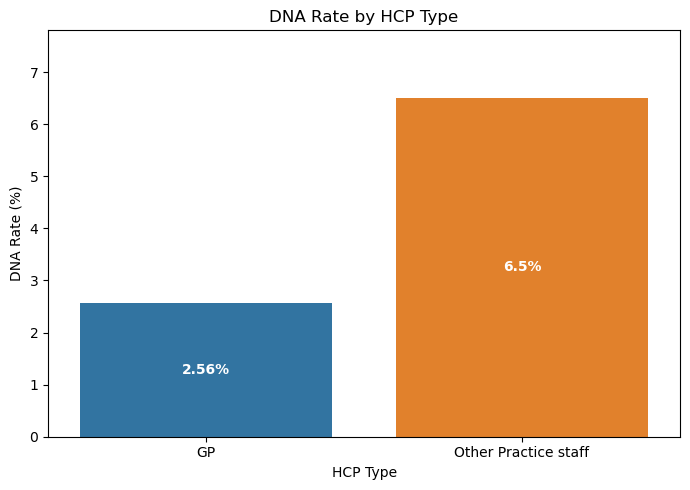

In [70]:
# Explore the difference in DNA rate between GP vs Other Practice Staff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to just GP and Other Practice Staff
filtered_ar = ar[ar['hcp_type'].isin(['GP', 'Other Practice staff'])]

# Filter to just Attended and DNA appointments
filtered_ar = filtered_ar[filtered_ar['appointment_status'].isin(['Attended', 'DNA'])]

# Group by HCP type and appointment status
attendance_summary = (
    filtered_ar.groupby(['hcp_type', 'appointment_status'])['count_of_appointments']
    .sum()
    .reset_index()
    .rename(columns={'count_of_appointments': 'total_appointments'})
)

# Pivot for comparison
pivot = attendance_summary.pivot(index='hcp_type', columns='appointment_status', values='total_appointments').fillna(0)
pivot['Total'] = pivot['Attended'] + pivot['DNA']
pivot['DNA Rate (%)'] = (pivot['DNA'] / pivot['Total']) * 100
pivot['DNA Rate (%)'] = pivot['DNA Rate (%)'].round(2)

# Prepare for plot
plot_data = pivot.reset_index()

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(
    data=plot_data,
    x='hcp_type',
    y='DNA Rate (%)',
    palette=['#1f77b4', '#ff7f0e']  # blue for GP, orange for Other Practice Staff
)

# Add % labels inside bars
for index, row in plot_data.iterrows():
    plt.text(
        x=index,
        y=row['DNA Rate (%)'] / 2,  # place label halfway up the bar
        s=f"{row['DNA Rate (%)']}%",
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

# Final touches
plt.title('DNA Rate by HCP Type')
plt.xlabel('HCP Type')
plt.ylabel('DNA Rate (%)')
plt.ylim(0, max(plot_data['DNA Rate (%)']) * 1.2)
plt.tight_layout()
plt.show()

The simple bar graph shows there is a clear difference in Did Not Attend (DNA) rates between healthcare professional types. Appointments with Other Practice Staff have a DNA rate of 6.5%, more than double that of GPs, which sits at 2.56%. This suggests that patients may engage differently depending on who the appointment is with. It would be valuable to explore patient perceptions and expectations around HCP types, as these attitudes could be influencing attendance behaviour and may present an opportunity to improve utilisation through better communication or targeted education.

In [71]:
#How many appointments does that 4% difference account for?

# Total Other Staff appointments
total_other = 339_528_981

# Actual DNA rate for other staff: 6.5%
actual_dna = total_other * 0.065

# Expected DNA rate if matched GP: 2.56%
expected_dna = total_other * 0.0256

# Difference in number of missed appointments
excess_dna = actual_dna - expected_dna

print(f"Extra missed appointments: {excess_dna:,.0f}")

Extra missed appointments: 13,377,442


**Question 20:** What are the trends in appointment duration?

24% of appointments have an unknown duration, 20% are 6-10 minutes and 17% are 1-5 minutes.

This raises question as to why the majority of appointments have an unknown length and reveals a major data quality issue.

Analysis is commented on throughout this question after the charts

In [72]:
# Count how many unique appointment durations are recorded
unique_durations = ad['actual_duration'].nunique()
print(f"Number of unique appointment duration categories: {unique_durations}")

# Group by actual_duration and count number of appointments per duration
duration_summary = (
    ad.groupby('actual_duration')['count_of_appointments']
    .sum()
    .reset_index()
    .rename(columns={'count_of_appointments': 'total_appointments'})
)

# Calculate total number of appointments in the dataset
total_appointments = duration_summary['total_appointments'].sum()

# Add a percentage column
duration_summary['percent_of_total'] = (duration_summary['total_appointments'] / total_appointments) * 100
duration_summary['percent_of_total'] = duration_summary['percent_of_total'].round(2)

# Sort by total appointments in descending order
duration_summary = duration_summary.sort_values(by='total_appointments', ascending=False).reset_index(drop=True)

# Display the full table
duration_summary

Number of unique appointment duration categories: 7


actual_duration  total_appointments  percent_of_total
0  Unknown / Data Quality            40284086             23.98
1            6-10 Minutes            33800815             20.12
2             1-5 Minutes            28600865             17.03
3           11-15 Minutes            25160882             14.98
4           16-20 Minutes            16004247              9.53
5           21-30 Minutes            15026365              8.95
6           31-60 Minutes             9103432              5.42

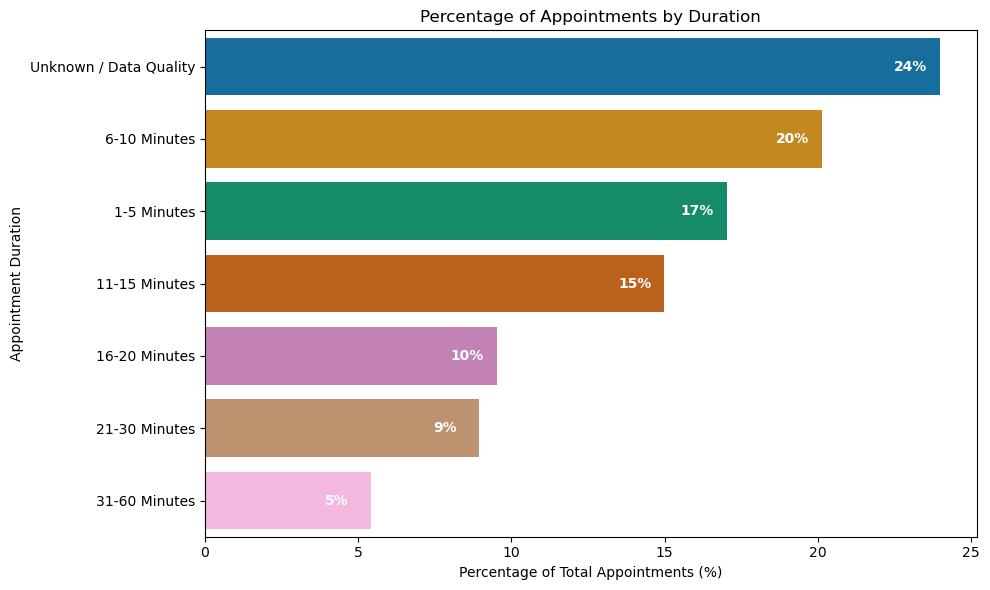

In [73]:
# Plot the percentage of appointments by duration
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by actual_duration and calculate totals
duration_summary = (
    ad.groupby('actual_duration')['count_of_appointments']
    .sum()
    .reset_index()
    .rename(columns={'count_of_appointments': 'total_appointments'})
)

# Calculate percentages
total_appointments = duration_summary['total_appointments'].sum()
duration_summary['percent_of_total'] = (duration_summary['total_appointments'] / total_appointments) * 100
duration_summary['percent_of_total'] = duration_summary['percent_of_total'].round(2)

# Sort by total
duration_summary = duration_summary.sort_values(by='total_appointments', ascending=False).reset_index(drop=True)

# Plot percentage values
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=duration_summary,
    x='percent_of_total',
    y='actual_duration',
    palette='colorblind'
)

# Add percentage labels to each bar
for index, row in duration_summary.iterrows():
    plt.text(
        x=row['percent_of_total'] - 1.5,  # shift left inside the bar
        y=index,
        s=f"{int(round(row['percent_of_total']))}%",
        va='center',
        color='white',
        fontweight='bold'
    )

plt.title('Percentage of Appointments by Duration')
plt.xlabel('Percentage of Total Appointments (%)')
plt.ylabel('Appointment Duration')
plt.tight_layout()
plt.show()

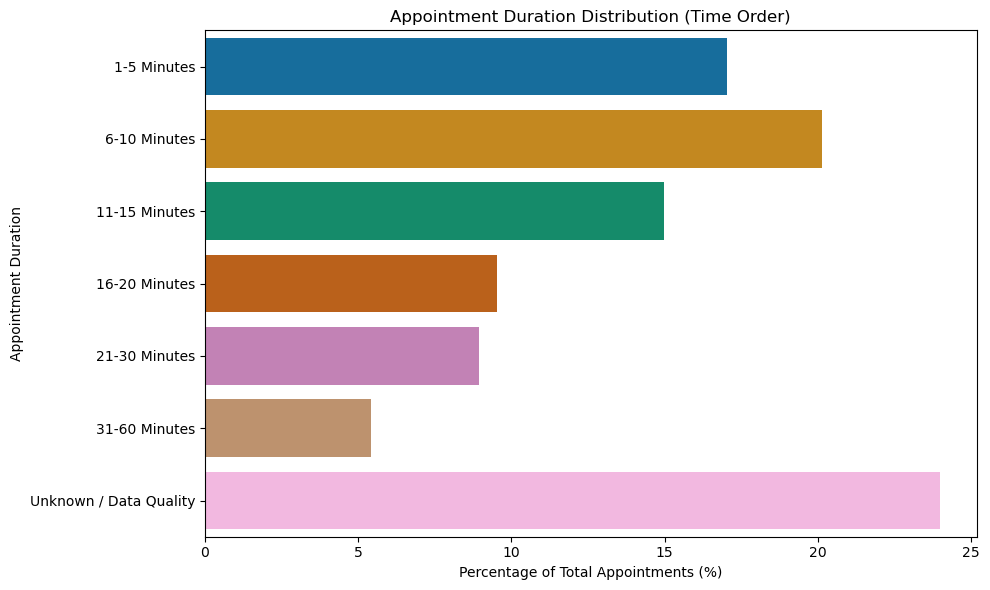

In [74]:
#Plotting the y axis in time order (ascending) so I can compare usefulness and readability

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by duration and calculate percentages
duration_summary = (
    ad.groupby('actual_duration')['count_of_appointments']
    .sum()
    .reset_index()
    .rename(columns={'count_of_appointments': 'total_appointments'})
)

total_appointments = duration_summary['total_appointments'].sum()
duration_summary['percent_of_total'] = (duration_summary['total_appointments'] / total_appointments * 100).round(2)

# Define custom duration order
duration_order = [
    '1-5 Minutes',
    '6-10 Minutes',
    '11-15 Minutes',
    '16-20 Minutes',
    '21-30 Minutes',
    '31-60 Minutes',
    'Unknown / Data Quality'
]

# Convert to categorical with specified order
duration_summary['actual_duration'] = pd.Categorical(
    duration_summary['actual_duration'],
    categories=duration_order,
    ordered=True
)

# Sort by that order
duration_summary = duration_summary.sort_values('actual_duration')

# Plot in time order
plt.figure(figsize=(10, 6))
sns.barplot(
    data=duration_summary,
    x='percent_of_total',
    y='actual_duration',
    palette='colorblind'
)
plt.title('Appointment Duration Distribution (Time Order)')
plt.xlabel('Percentage of Total Appointments (%)')
plt.ylabel('Appointment Duration')
plt.tight_layout()
plt.show()

I have decided to proceed with the chart that has it sorted by most popular first. This clearly highlights the data quality issue with unknown/data quality at the top with the highest percentage.

While the NHS does not mandate a standard appointment length, both the [British Medical Association (BMA)](https://www.theguardian.com/society/2016/aug/28/doctor-appointments-15-minutes-bma-overweight-population) and [The Royal College of General Practitioners (RCGP)](https://www.rcgp.org.uk/news/gp-teams-working-extremely-hard) recommend a 15-minute duration for routine GP consultations. This benchmark provides a useful reference point for interpreting the data and identifying where improvements in scheduling and resource use may be required.


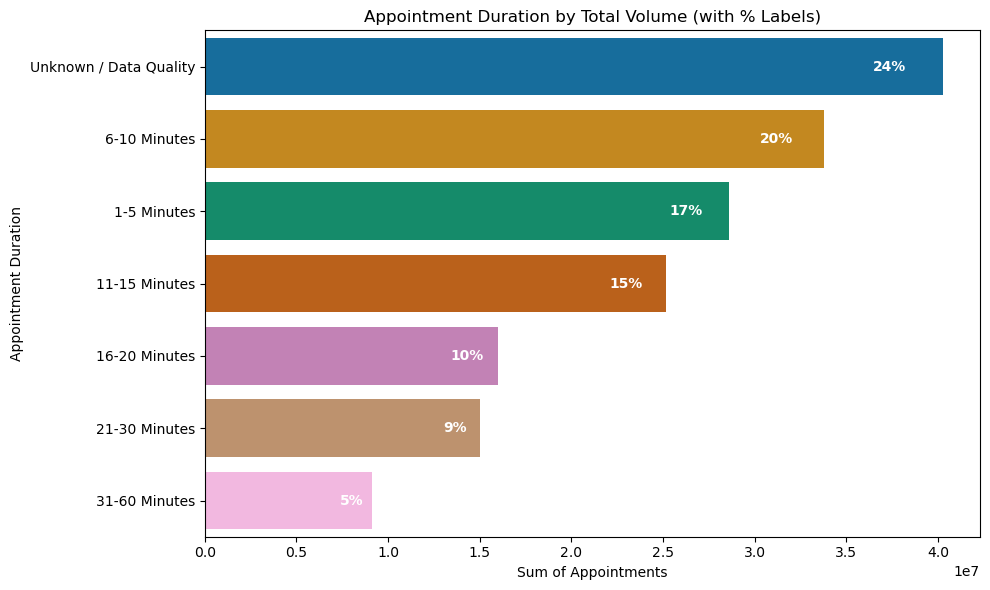

In [75]:
# Plot with sum of appointments on x-axis and percentage labels
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group and calculate
duration_summary = (
    ad.groupby('actual_duration')['count_of_appointments']
    .sum()
    .reset_index()
    .rename(columns={'count_of_appointments': 'total_appointments'})
)

# Total and percent
total_appointments = duration_summary['total_appointments'].sum()
duration_summary['percent_of_total'] = (duration_summary['total_appointments'] / total_appointments * 100).round(2)

# Sort by raw total
duration_summary = duration_summary.sort_values(by='total_appointments', ascending=False).reset_index(drop=True)

# Plot based on total appointments
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=duration_summary,
    x='total_appointments',
    y='actual_duration',
    palette='colorblind'
)

# Add inside-the-bar percentage labels
for index, row in duration_summary.iterrows():
    plt.text(
        x=row['total_appointments'] - row['total_appointments'] * 0.05,  # ~5% left margin inside
        y=index,
        s=f"{int(round(row['percent_of_total']))}%",
        va='center',
        ha='right',
        color='white',
        fontweight='bold'
    )

# Titles and labels
plt.title('Appointment Duration by Total Volume (with % Labels)')
plt.xlabel('Sum of Appointments')
plt.ylabel('Appointment Duration')
plt.tight_layout()
plt.show()

This updated bar graph was used in the business presentation and technical report. The axis was changed to sum of appointments as the percentages are clearly notes within each bar.

By grouping the data into three categories - appointments under 15 minutes, over 15 minutes, and unknown - we can assess how current appointment patterns align with this recommended benchmark.

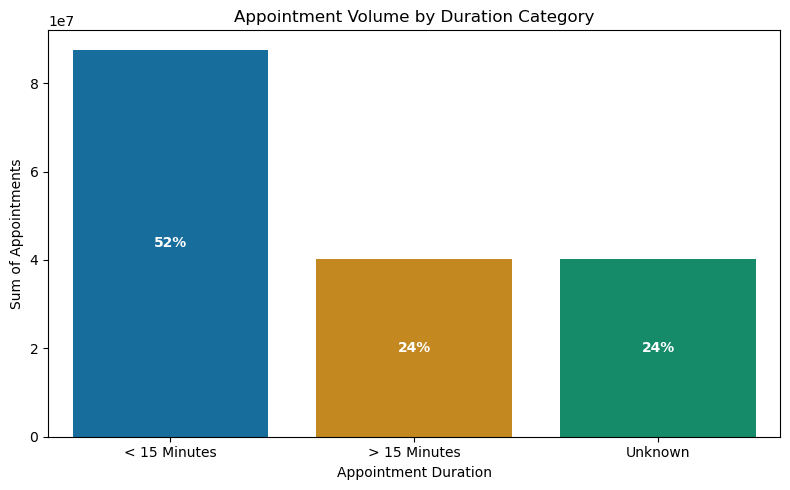

In [76]:
# Plot into <15 mins, >15 mins and unknown bins
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classify durations into bins
def classify_duration(duration):
    if duration == 'Unknown / Data Quality':
        return 'Unknown'
    elif duration in ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes']:
        return '< 15 Minutes'
    else:
        return '> 15 Minutes'

# Apply binning
duration_summary['duration_bin'] = duration_summary['actual_duration'].apply(classify_duration)

# Group into 3 bins
bin_summary = (
    duration_summary.groupby('duration_bin')['total_appointments']
    .sum()
    .reset_index()
)

# Calculate percentages
total = bin_summary['total_appointments'].sum()
bin_summary['percent'] = (bin_summary['total_appointments'] / total * 100).round(2)

# Sort bin order
bin_order = ['< 15 Minutes', '> 15 Minutes', 'Unknown']
bin_summary['duration_bin'] = pd.Categorical(bin_summary['duration_bin'], categories=bin_order, ordered=True)
bin_summary = bin_summary.sort_values('duration_bin')

# Plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=bin_summary,
    x='duration_bin',
    y='total_appointments',
    palette='colorblind'
)

# Add % labels **inside** the bars
for index, row in bin_summary.iterrows():
    plt.text(
        x=index,
        y=row['total_appointments'] * 0.5,  # halfway inside the bar
        s=f"{int(round(row['percent']))}%",
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

# Final touches
plt.title('Appointment Volume by Duration Category')
plt.xlabel('Appointment Duration')
plt.ylabel('Sum of Appointments')
plt.tight_layout()
plt.show()

The data shows that 52% of appointments are within the recommended 15-minute window, while 25% exceed it. If GPs are consistently spending more than 15 minutes per appointment, this may contribute to inefficiencies across the staffing network, especially given rising demand.

**Question 21:** What are the trends in appointment status?

At first glance, the data appears positive, with 91% of GP appointments marked as attended. However, a deeper look reveals that the 4% of appointments missed without notice (commonly referred to as “Did Not Attend” or DNAs) translate to over 30 million missed appointments. That's across the dataset date range of 30 months. 

According to [NHS England](https://www.england.nhs.uk/2019/01/missed-gp-appointments-costing-nhs-millions/), each missed GP appointment costs the NHS an average of £30 (NHS, 2019). When we apply an estimated cost of £30 per missed appointment, this equates to a staggering £924 million in lost value to the NHS. 

In [77]:
# Which appointment status has the highest appointment count and percentage of total
# Check how many unique appointment statuses are in the dataset
unique_statuses = ar['appointment_status'].nunique()
print(f"Number of unique appointment statuses: {unique_statuses}")

# Group by appointment status and sum total appointments
status_summary = (
    ar.groupby('appointment_status')['count_of_appointments']
    .sum()
    .reset_index()
    .rename(columns={'count_of_appointments': 'total_appointments'})
)

# Calculate the total number of appointments across all statuses
total_appointments = status_summary['total_appointments'].sum()

# Add a column for percentage of total
status_summary['percent_of_total'] = (status_summary['total_appointments'] / total_appointments) * 100
status_summary['percent_of_total'] = status_summary['percent_of_total'].round(2)

# Sort in descending order to show the most common status at the top
status_summary = status_summary.sort_values(by='total_appointments', ascending=False).reset_index(drop=True)

# Display the summary table
status_summary

Number of unique appointment statuses: 3


appointment_status  total_appointments  percent_of_total
0           Attended           677646088             91.26
1            Unknown            34050656              4.59
2                DNA            30833015              4.15

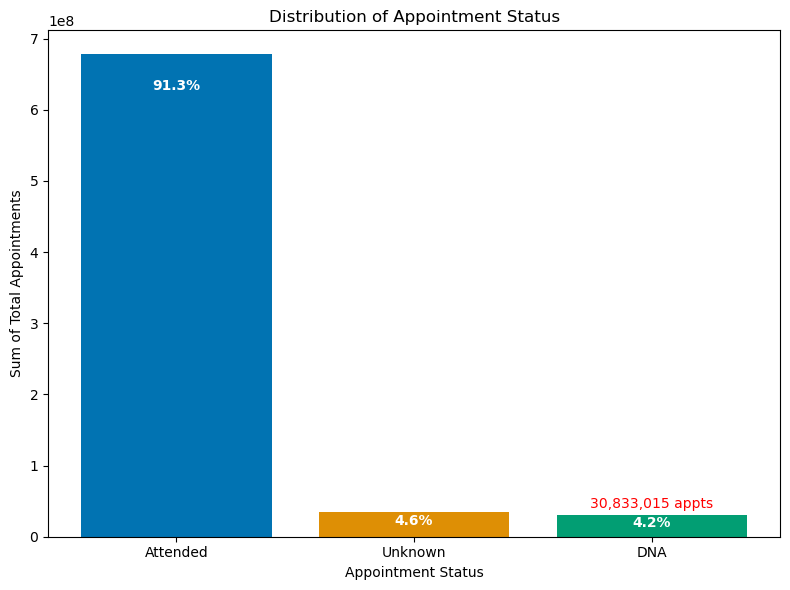

In [78]:
# Put above table into a bar graph 
import matplotlib.pyplot as plt
import seaborn as sns

# Define colorblind palette
colorblind_palette = sns.color_palette("colorblind", n_colors=len(status_summary)).as_hex()
color_map = dict(zip(status_summary['appointment_status'], colorblind_palette))
colors = status_summary['appointment_status'].map(color_map)

# Plot with white background
plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Plot using raw totals (not percent)
plt.bar(status_summary['appointment_status'], status_summary['total_appointments'], color=colors)

# Y-axis label changed
plt.xlabel('Appointment Status')
plt.ylabel('Sum of Total Appointments')
plt.title('Distribution of Appointment Status')

# Add % labels inside bars
for i, row in status_summary.iterrows():
    pct = row['percent_of_total']
    total = row['total_appointments']
    plt.text(
        x=i,
        y=total * 0.95,
        s=f"{pct:.1f}%",
        ha='center',
        va='top',
        color='white',
        fontweight='bold'
    )

# Add total label above DNA
dna_row = status_summary[status_summary['appointment_status'] == 'DNA']
if not dna_row.empty:
    dna_index = dna_row.index[0]
    dna_total = int(dna_row['total_appointments'].values[0])
    plt.text(
        x=dna_index,
        y=dna_total + 1e7,  
        s=f"{dna_total:,} appts",
        ha='center',
        color='red',
        fontsize=10
    )

plt.tight_layout()
plt.show()

I continued to update this plot to add percentage labels and the appointment count for DNA. This required complex code and external research was complete.

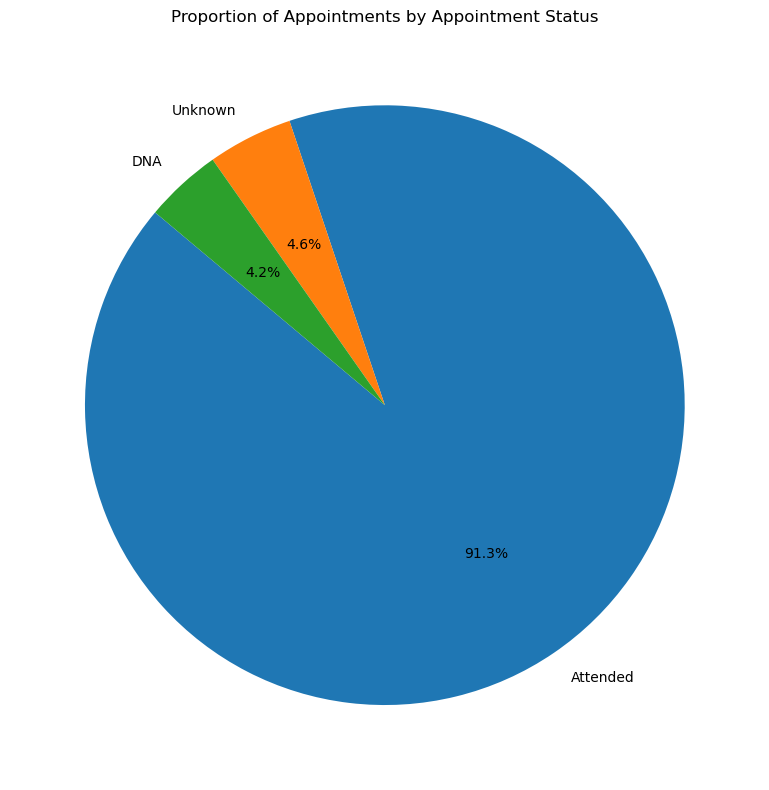

In [79]:
# Converted to a pie graph to explore different visualisation ideas
import matplotlib.pyplot as plt

# Group and sum appointments by appointment status
status_totals = ar.groupby('appointment_status')['count_of_appointments'].sum().reset_index()

# Sort (optional)
status_totals = status_totals.sort_values('count_of_appointments', ascending=False)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    status_totals['count_of_appointments'],
    labels=status_totals['appointment_status'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Proportion of Appointments by Appointment Status')
plt.tight_layout()
plt.show()

Didn't use this pie graph as the bar graph displays it better

Has there been changes in attendance over time? Plotted with a line graph

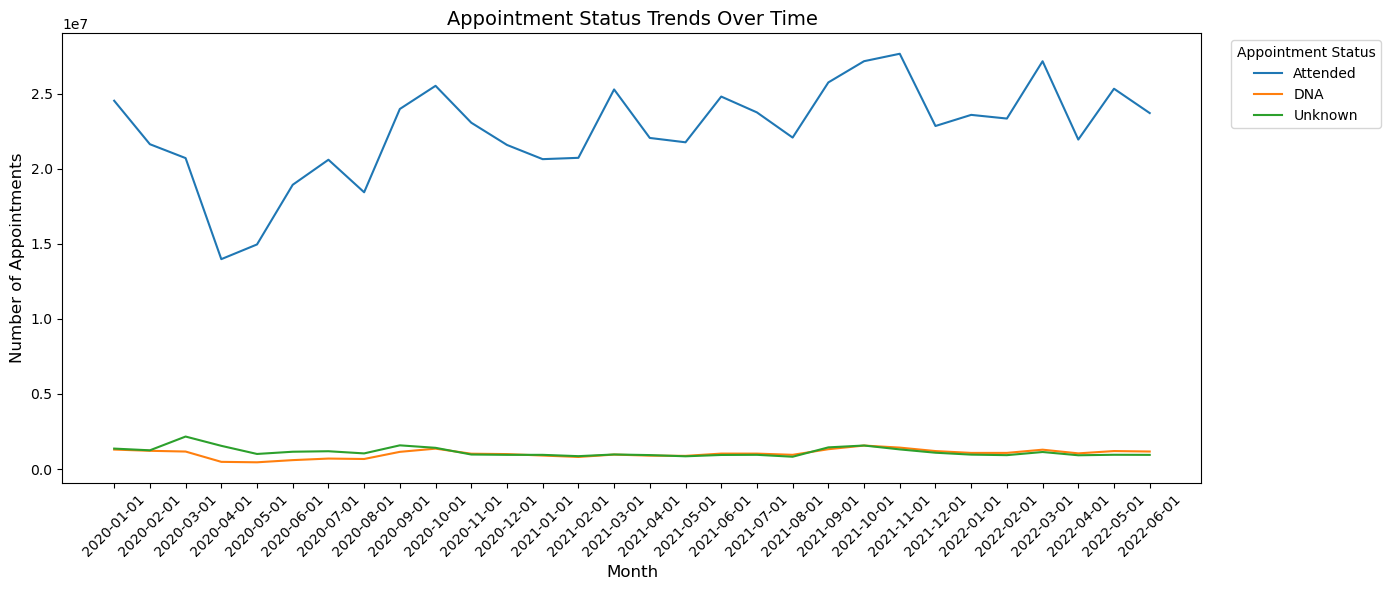

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert appointment_month to string for cleaner x-axis
ar['appointment_month'] = ar['appointment_month'].astype(str)

# Group by month and appointment status, summing appointments
status_time = (
    ar.groupby(['appointment_month', 'appointment_status'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Plot line chart to show trends over time
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=status_time,
    x='appointment_month',
    y='count_of_appointments',
    hue='appointment_status',
    errorbar=None
)

# Style the plot
plt.title("Appointment Status Trends Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Appointments", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Appointment Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

This line chart illustrates the monthly trend in appointment status from January 2020 to June 2022. Attended appointments consistently dominate, with visible fluctuations that likely reflect seasonal variation and pandemic-related disruptions. DNA (Did Not Attend) and Unknown statuses remain relatively low and stable by comparison. Despite their smaller scale, these categories are important due to their cost and data quality implications.

Filter out Attended in next line graph:

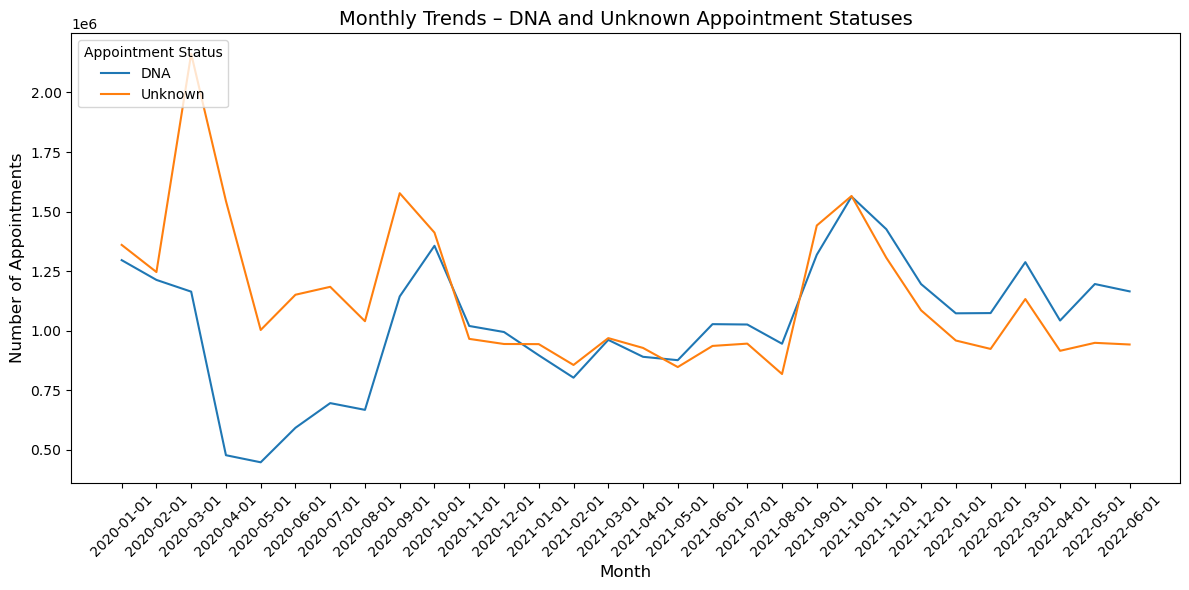

In [81]:
# Filter to keep only DNA and Unknown statuses
status_filtered = status_time[status_time['appointment_status'].isin(['DNA', 'Unknown'])]

# Plot the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=status_filtered,
    x='appointment_month',
    y='count_of_appointments',
    hue='appointment_status',
    errorbar=None
)

# Style the plot
plt.title("Monthly Trends – DNA and Unknown Appointment Statuses", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Appointments", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Appointment Status', loc='upper left')
plt.tight_layout()
plt.show()

To better visualise lower-volume trends, this chart filters out the 'Attended' category and focuses solely on DNA (Did Not Attend) and Unknown appointments. Both categories display noticeable fluctuation, with sharp peaks in early 2020 likely linked to COVID-19 disruption and reporting inconsistencies. The graph highlights persistent data quality issues in the Unknown category and shows that DNA rates have remained variable but consistently impactful throughout the 30-month period.

**Question 22:** What are the trends with time between booking and appointment?

Initially this was explored by each ICC.
ICBs are relatively similar in terms of time between pattern. Most have a rate of 40-50% for same day and 1-5% for more than 28 days.

When looking at the top % timeframes for each ICB (by filtering to top 3 %), all except 4 ICBs have
1. Same day
2. 2-7 days
3. 8-14 days

The other 4 are Black Country, North Central London, NE London, SE London.

In [82]:
# Group by ICB name and time delay category, summing appointment counts
delay_grouped = ar.groupby(['icb_name', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# Calculate total appointments per ICB
total_per_icb = delay_grouped.groupby('icb_name')['count_of_appointments'].sum().reset_index()
total_per_icb.rename(columns={'count_of_appointments': 'total_appointments'}, inplace=True)

# Merge total counts back into the grouped table
delay_grouped = delay_grouped.merge(total_per_icb, on='icb_name')

# Calculate percentage column
delay_grouped['percent'] = (delay_grouped['count_of_appointments'] / delay_grouped['total_appointments']) * 100

# Sort by ICB and percent descending, then rank within each ICB
delay_grouped['rank'] = delay_grouped.groupby('icb_name')['percent'].rank(method='first', ascending=False)

# Filter to only top 3 per ICB
top_3_per_icb = delay_grouped[delay_grouped['rank'] <= 3].sort_values(['icb_name', 'rank'])

# Optional: tidy formatting
top_3_per_icb = top_3_per_icb[['icb_name', 'time_between_book_and_appointment', 'percent']]

# Display full table (remove truncation in output)
import pandas as pd
pd.set_option('display.max_rows', None)

top_3_per_icb

icb_name  \
0    Bath and North East Somerset, Swindon and Wilt...   
2    Bath and North East Somerset, Swindon and Wilt...   
3    Bath and North East Somerset, Swindon and Wilt...   
8            Bedfordshire, Luton and Milton Keynes ICB   
10           Bedfordshire, Luton and Milton Keynes ICB   
11           Bedfordshire, Luton and Milton Keynes ICB   
16                         Birmingham and Solihull ICB   
18                         Birmingham and Solihull ICB   
19                         Birmingham and Solihull ICB   
24                                   Black Country ICB   
26                                   Black Country ICB   
25                                   Black Country ICB   
32   Bristol, North Somerset and South Gloucestersh...   
34   Bristol, North Somerset and South Gloucestersh...   
35   Bristol, North Somerset and South Gloucestersh...   
40   Buckinghamshire, Oxfordshire and Berkshire Wes...   
42   Buckinghamshire, Oxfordshire and Berkshire Wes...   
43   Buckinghamshire, Oxfordshire and Berkshire Wes...   
48                 Cambridgeshire and Peterborough ICB   
50                 Cambridgeshire and Peterborough ICB   
51                 Cambridgeshire and Peterborough ICB   
56                         Cheshire and Merseyside ICB   
58                         Cheshire and Merseyside ICB   
59                         Cheshire and Merseyside ICB   
64                Cornwall and the Isles of Scilly ICB   
66                Cornwall and the Isles of Scilly ICB   
67                Cornwall and the Isles of Scilly ICB   
72                       Coventry and Warwickshire ICB   
74                       Coventry and Warwickshire ICB   
75                       Coventry and Warwickshire ICB   
80                            Derby and Derbyshire ICB   
82                            Derby and Derbyshire ICB   
83                            Derby and Derbyshire ICB   
88                                           Devon ICB   
90                                           Devon ICB   
91                                           Devon ICB   
96                                          Dorset ICB   
98                                          Dorset ICB   
99                                          Dorset ICB   
104                                        Frimley ICB   
106                                        Frimley ICB   
107                                        Frimley ICB   
112                                Gloucestershire ICB   
114                                Gloucestershire ICB   
115                                Gloucestershire ICB   
120                             Greater Manchester ICB   
122                             Greater Manchester ICB   
123                             Greater Manchester ICB   
128                    Hampshire and Isle of Wight ICB   
130                    Hampshire and Isle of Wight ICB   
131                    Hampshire and Isle of Wight ICB   
136               Herefordshire and Worcestershire ICB   
138               Herefordshire and Worcestershire ICB   
139               Herefordshire and Worcestershire ICB   
144                   Hertfordshire and West Essex ICB   
146                   Hertfordshire and West Essex ICB   
147                   Hertfordshire and West Essex ICB   
152                     Humber and North Yorkshire ICB   
154                     Humber and North Yorkshire ICB   
155                     Humber and North Yorkshire ICB   
160                                Kent and Medway ICB   
162                                Kent and Medway ICB   
163                                Kent and Medway ICB   
168                   Lancashire and South Cumbria ICB   
170                   Lancashire and South Cumbria ICB   
171                   Lancashire and South Cumbria ICB   
176          Leicester, Leicestershire and Rutland ICB   
178          Leicester, Leicestershire and Rutland ICB   
179          Leicester, Leicestershire and R

**Given the lengthy analysis, it was more useful to plot the data over time**

In [83]:
# Plot the time between booking and appointment 
# Define your desired order
time_order = [
    "Same Day", "1 Day", "2 to 7 Days", "8  to 14 Days",
    "15  to 21 Days", "22  to 28 Days", "More than 28 Days",
    "Unknown / Data Quality"
]

# Turn it into an ordered categorical column
ar['time_between_book_and_appointment'] = pd.Categorical(
    ar['time_between_book_and_appointment'],
    categories=time_order,
    ordered=True
)

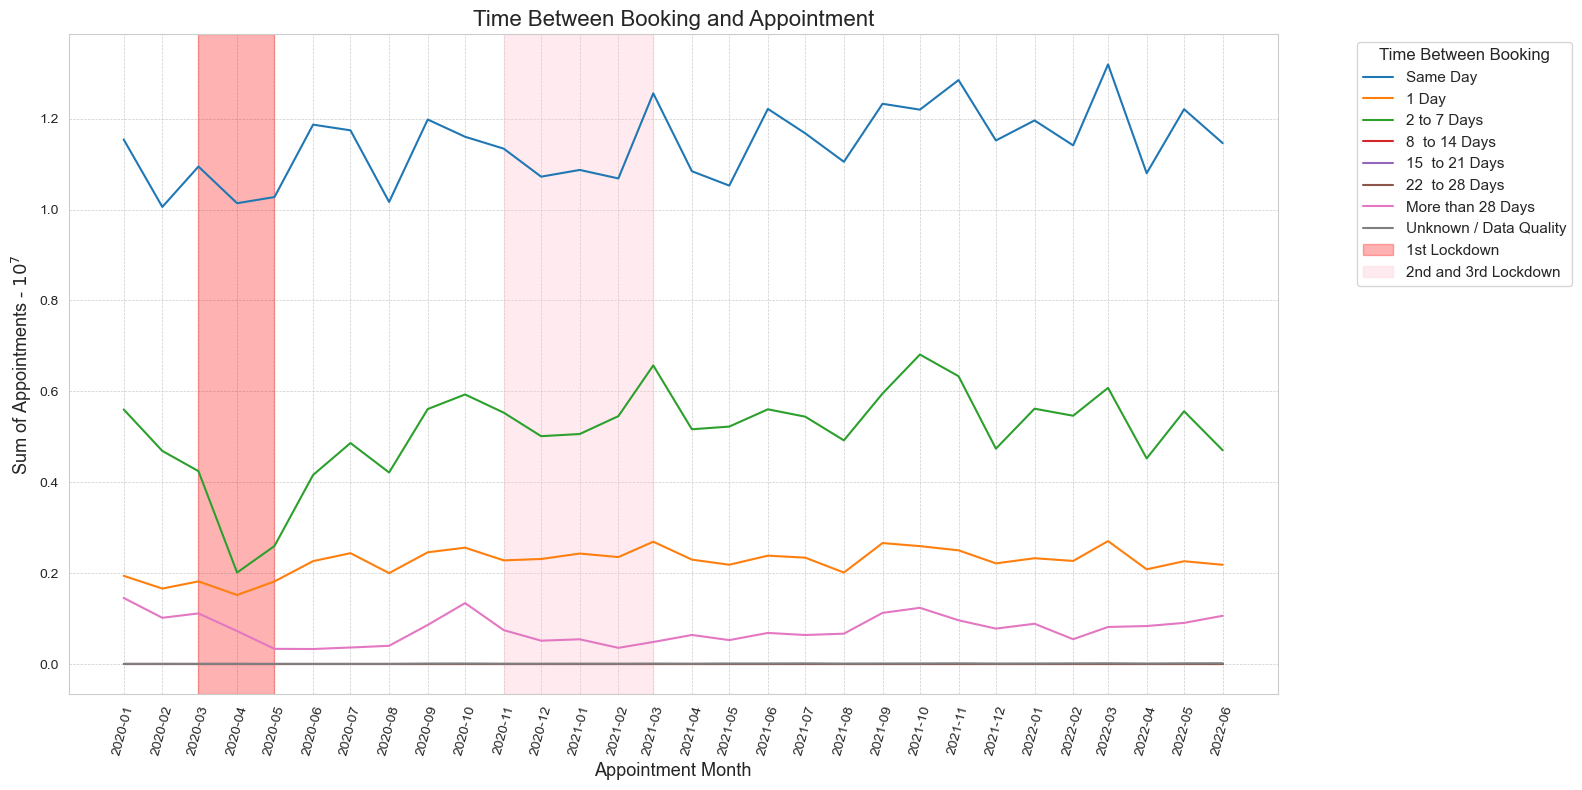

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Group and prepare data
ar_grouped = (
    ar.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Ensure appointment_month is datetime
ar_grouped['appointment_month'] = pd.to_datetime(ar_grouped['appointment_month'])

# Plot
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

sns.lineplot(
    data=ar_grouped,
    x="appointment_month",
    y="count_of_appointments",
    hue="time_between_book_and_appointment"
)

# Format
plt.title("Time Between Booking and Appointment", fontsize=16)
plt.xlabel("Appointment Month", fontsize=13)
plt.ylabel("Sum of Appointments - $10^7$", fontsize=13)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e7:.1f}'))

# Lockdown shading
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2020-05-01"), color="red", alpha=0.3, label="1st Lockdown")
plt.axvspan(pd.to_datetime("2020-11-01"), pd.to_datetime("2021-03-01"), color="pink", alpha=0.3, label="2nd and 3rd Lockdown")

# Ticks and legend
all_months = sorted(ar_grouped["appointment_month"].unique())
plt.xticks(ticks=all_months, labels=[m.strftime('%Y-%m') for m in all_months], rotation=75)
plt.legend(
    loc="upper right",
    title="Time Between Booking",
    title_fontsize=12,
    fontsize=11,
    bbox_to_anchor=(1.25, 1)
)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

**Summary**
The line graph shows that the majority of appointments over time were delivered on the same day, followed by those booked 2–7 days and 8–14 days in advance. This pattern suggests that patients were generally able to access care within the recommended two-week target.
However, the graph also highlights distinct drops in total appointment volumes during the first and second/third national lockdowns, most notably in same-day and short-wait appointments. These dips reflect the immediate impact of the COVID-19 pandemic on routine primary care delivery.

The shaded bands were added as the evident dip in April 2020 and December 2020 raised questions. 
- 1st Lockdown (Mar–May 2020)
- 2nd/3rd Lockdown (Nov 2020–Mar 2021)

The research behind these bands is explored in detail in the technical report. 

I read about 'recession shading' in seaborn on Stack Overflow [1](https://stackoverflow.com/questions/65344945/how-to-create-a-plot-with-vertical-shades-in-matplotlib) and [2](https://stackoverflow.com/questions/47962876/pandas-dataframe-recession-highlighting-plot)

**Next it would be interesting to explore the percentage of each timeframe in a visualisation**

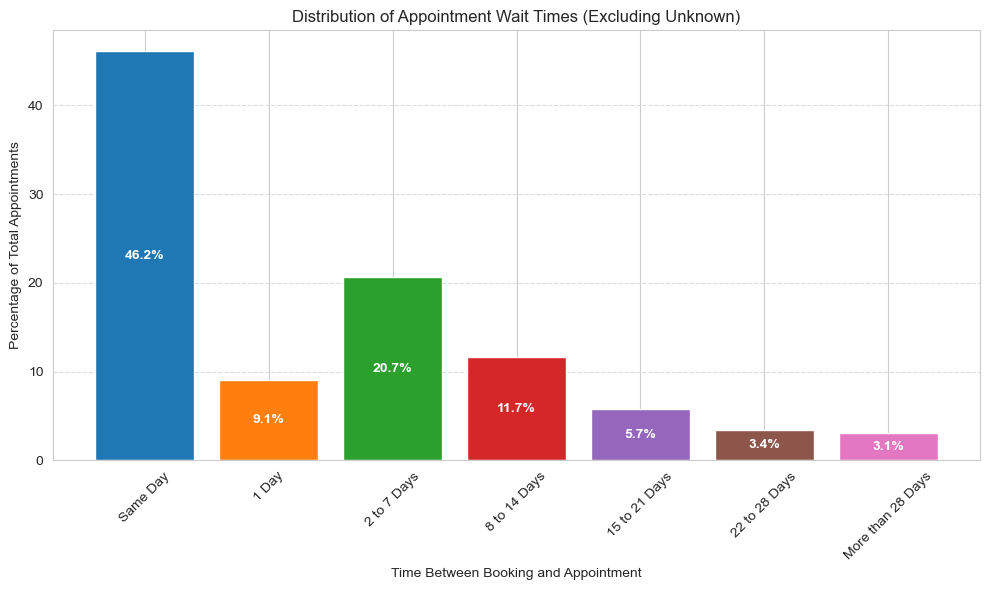

In [85]:
# Plot timeframes in a bar chart using % values
import pandas as pd
import matplotlib.pyplot as plt

# Data (excluding 'Unknown / Data Quality')
data = {
    'time_between_book_and_appointment': [
        'Same Day', '1 Day', '2 to 7 Days', '8 to 14 Days',
        '15 to 21 Days', '22 to 28 Days', 'More than 28 Days'
    ],
    'percentage': [
        46.153289, 9.113844, 20.706152, 11.690704,
        5.747107, 3.434687, 3.100843
    ]
}

# Custom colors from your legend (approximate hex codes)
colors = [
    '#1f77b4',  # Same Day - blue
    '#ff7f0e',  # 1 Day - orange
    '#2ca02c',  # 2 to 7 Days - green
    '#d62728',  # 8 to 14 Days - red
    '#9467bd',  # 15 to 21 Days - purple
    '#8c564b',  # 22 to 28 Days - brown
    '#e377c2'   # More than 28 Days - pink
]

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df['time_between_book_and_appointment'], df['percentage'], color=colors)

# Add percentage labels inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.5,  # place label halfway up the bar
        f'{height:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.xlabel('Time Between Booking and Appointment')
plt.ylabel('Percentage of Total Appointments')
plt.title('Distribution of Appointment Wait Times (Excluding Unknown)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This bar graph provides a simple overview of which timeframes are most common. It is in time order on the x axis to improve readability. 

This analysis has utilised the less than 14 days ‘target’ for time between booking and appointment. That is, the NHS expects patients to be offered a routine GP appointment within 14 days of request. This target is explored in detail in the technical report but is backed by [UK Government Policy Announcement](https://www.gov.uk/government/news/new-plan-to-make-it-easier-for-patients-to-see-their-gp
), [NHS England](https://www.england.nhs.uk/long-read/delivery-plan-for-recovering-access-to-primary-care-2/) and [The British Medical Association](https://www.bma.org.uk/advice-and-support/gp-practices/gp-service-provision/gp-access-meeting-the-reasonable-needs-of-patients)

The bar graph shows that 88% of appointments were delivered within the 14-day target. While this appears positive at first glance, the remaining 12% represents approximately 91 million appointments - a substantial volume (calculated from question 11 output). This highlights that even a relatively small percentage can equate to significant service demand and potential delays at scale.

## ICB-Level Activity and Capacity Analysis

This analysis involves calculating appointments per 1,000 registered patients at the **ICB level (42 Integrated Care Boards)** to provide localised insights into service delivery and demand. 
This allows further assessment of performance, staffing needs, and capacity pressures from a system-wide perspective.

This approach enables us to:
- Calculate each ICB’s share of the national registered patient population
- Estimate appointment delivery expectations using the national NHS benchmark of 1.2 million appointments per working day
- Compare actual vs expected delivery across 30 months
- Identify which ICBs are potentially over-performing (staff strain) or under-performing (missed care or resource gaps)

This level of analysis is well-suited to answer stakeholder questions such as:
- “Has there been adequate staffing and resource delivery?”
- “Which ICBs are exceeding or falling short of expected capacity?”

We begin by creating a new dataset, icb_level_data, that contains one row per ICB with total registered patients and location metadata.

To enable fair comparisons of service activity across different areas, I calculated the number of appointments delivered per 1,000 registered patients at the Integrated Care Board (ICB) level. The reg_patients dataset was used to determine the number of registered patients at the Sub-ICB level. Data was found on the NHS website [here](https://digital.nhs.uk/data-and-information/publications/statistical/patients-registered-at-a-gp-practice/january-2025)

For appointment counts, I chose the ar dataset as it provides the longest available time span (30 months) and the most complete appointment volume, with a total of 742.8 million appointments recorded.

This process is outlined in detail in the technical report.

In [86]:
import pandas as pd

# Import registered patient data
reg_patients = pd.read_csv('reg_patients.csv')

# Create sub_icb_location_code column if missing
nc['sub_icb_location_code'] = nc['sub_icb_location_name'].str.extract(r' - (\w{3,5})$')

# Create a lookup from sub-ICB to ICB using nc
sub_to_icb_lookup = nc[['sub_icb_location_code', 'icb_ons_code']].drop_duplicates()

# Create sub_icb_location_code column i
nc['sub_icb_location_code'] = nc['sub_icb_location_name'].str.extract(r' - (\w{3,5})$')

# Create a lookup from sub-ICB to ICB using nc
sub_to_icb_lookup = nc[['sub_icb_location_code', 'icb_ons_code']].drop_duplicates()

# Add ICB code into the reg_patients table
reg_patients_with_icb = reg_patients.merge(sub_to_icb_lookup, on='sub_icb_location_code', how='left')

# Aggregate registered patients by ICB
reg_summary_icb = reg_patients_with_icb.groupby('icb_ons_code')['registered_patients'].sum().reset_index()

# Aggregate appointments from ar by ICB
appt_summary_icb = ar.groupby('icb_ons_code')['count_of_appointments'].sum().reset_index()

# Build an ICB-level lookup for names and regions
icb_lookup = nc[[
    'region_name', 'icb_name', 'icb_ons_code'
]].drop_duplicates(subset='icb_ons_code')

# Merge everything together
icb_level_data = (
    icb_lookup
    .merge(reg_summary_icb, on='icb_ons_code', how='left')
    .merge(appt_summary_icb, on='icb_ons_code', how='left')
)

# Calculate appointments per 1,000 patients
icb_level_data['appointments_per_1000'] = (
    icb_level_data['count_of_appointments'] / icb_level_data['registered_patients']
) * 1000

# Clean up ICB names by removing 'ICB' suffix
icb_level_data['icb_name'] = icb_level_data['icb_name'].str.replace(r'\s*ICB$', '', regex=True)

# Preview result
icb_level_data[[
    'region_name', 'icb_name', 'icb_ons_code',
    'registered_patients', 'count_of_appointments', 'appointments_per_1000'
]].sort_values('appointments_per_1000', ascending=False).head()

region_name                                           icb_name  \
19       South West                   Cornwall and the Isles of Scilly   
24       South West                                              Devon   
26  East of England                                Norfolk and Waveney   
25         Midlands                   Herefordshire and Worcestershire   
33       South West  Bath and North East Somerset, Swindon and Wilt...   

   icb_ons_code  registered_patients  count_of_appointments  \
19    E54000036               606416                9575233   
24    E54000037              1298178               19139882   
26    E54000022              1100260               15448907   
25    E54000019               832650               11494537   
33    E54000040              1013188               13639181   

    appointments_per_1000  
19           15789.875267  
24           14743.649946  
26           14041.142094  
25           13804.764307  
33           13461.648776

In [87]:
# View the bottom 5 performing
icb_level_data[[
    'region_name', 'icb_name', 'icb_ons_code',
    'registered_patients', 'count_of_appointments', 'appointments_per_1000'
]].sort_values('appointments_per_1000', ascending=True).head()

region_name                 icb_name icb_ons_code  registered_patients  \
34      London     North Central London    E54000028              1837219   
29      London        South East London    E54000030              2123937   
35      London        North East London    E54000029              2469805   
22    Midlands  Birmingham and Solihull    E54000055              1645425   
41      London        North West London    E54000027              2902259   

    count_of_appointments  appointments_per_1000  
34               16495418            8978.471266  
29               20241452            9530.156497  
35               23594259            9553.085770  
22               15952469            9695.044745  
41               29380767           10123.413176

In [88]:
# Check my merge worked correctly 
icb_level_data['registered_patients'].isna().sum()

0

In [89]:
# Check that the dataframe has expected rows for number of ICBs = 42, yes it does
icb_level_data.shape

(42, 6)

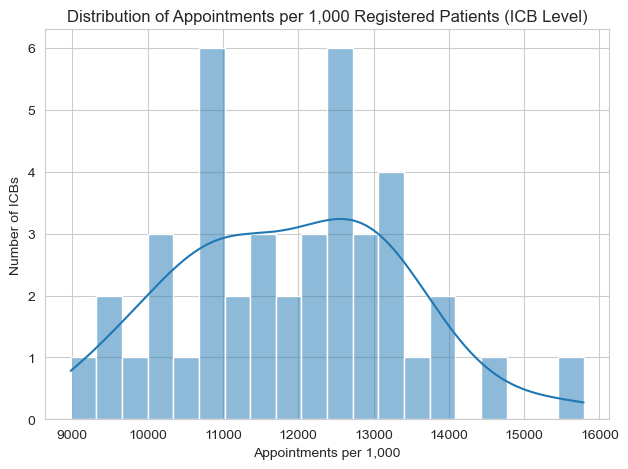

In [90]:
# Plotted the data for an initial look
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(icb_level_data['appointments_per_1000'], bins=20, kde=True)
plt.title("Distribution of Appointments per 1,000 Registered Patients (ICB Level)")
plt.xlabel("Appointments per 1,000")
plt.ylabel("Number of ICBs")
plt.tight_layout()
plt.show()

This histogram provides an initial view of the distribution of appointment rates across the 42 Integrated Care Boards (ICBs). It shows that most ICBs deliver between 10,000 and 13,000 appointments per 1,000 patients over the 30-month period, with a few outliers on the higher end.

While useful for spotting general spread and skewness, this visual was not included in the business presentation. Its interpretability is limited for non-technical audiences, and it doesn’t clearly communicate actionable insights.

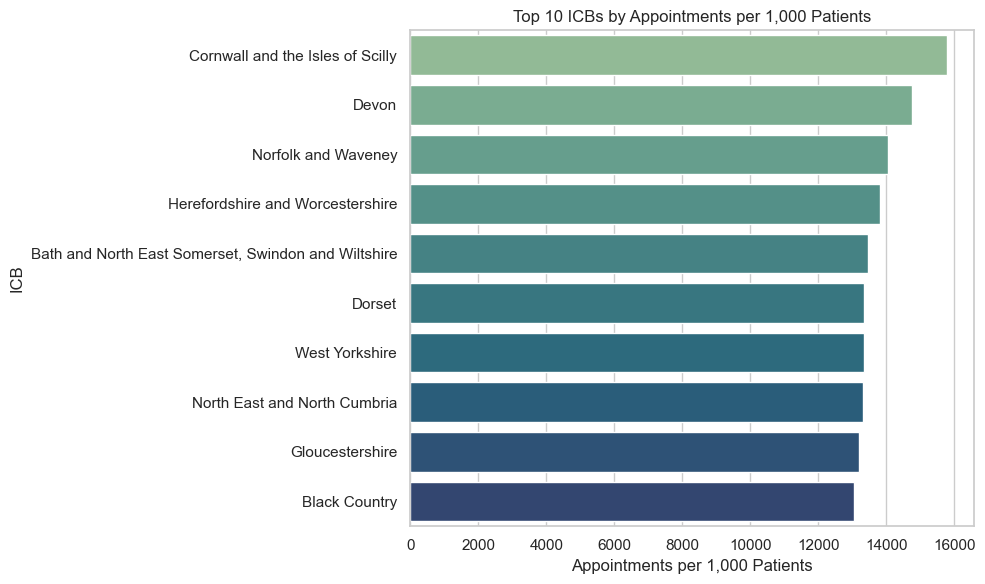

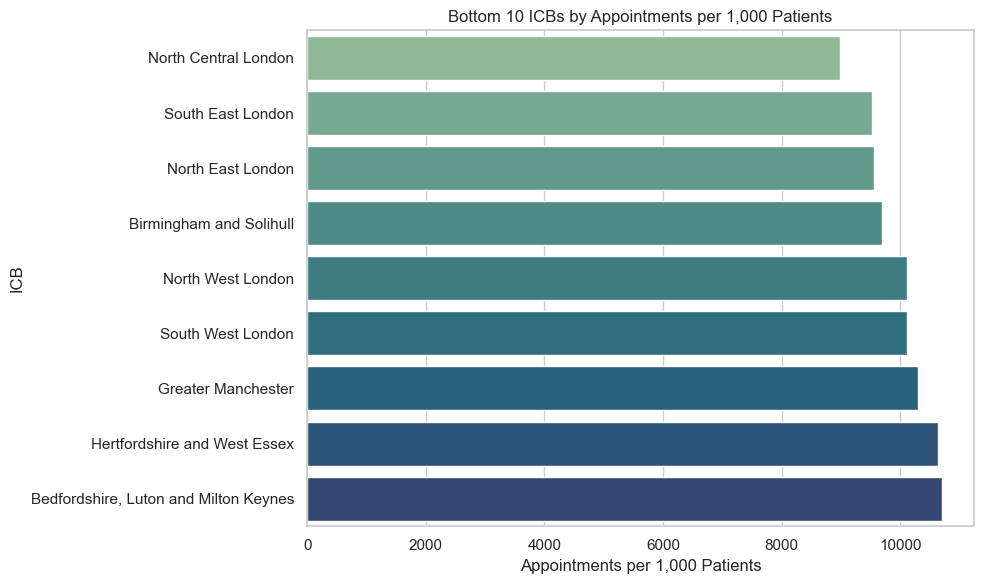

In [91]:
# Plot the top 10 and bottom 10 performing ICBs 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and extract Top 10 and Bottom 10 ICBs
top10 = icb_level_data.sort_values('appointments_per_1000', ascending=False).head(10)
bottom10 = icb_level_data.sort_values('appointments_per_1000', ascending=True).head(10)

# Set Seaborn style
sns.set(style='whitegrid')

# Top 10 Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10,
    y='icb_name',
    x='appointments_per_1000',
    palette='crest'
)
plt.title('Top 10 ICBs by Appointments per 1,000 Patients')
plt.xlabel('Appointments per 1,000 Patients')
plt.ylabel('ICB')
plt.tight_layout()
plt.show()

# Bottom 10 Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=bottom10,
    y='icb_name',
    x='appointments_per_1000',
    palette='crest'
)
plt.title('Bottom 10 ICBs by Appointments per 1,000 Patients')
plt.xlabel('Appointments per 1,000 Patients')
plt.ylabel('ICB')
plt.tight_layout()
plt.show()

These horizontal bar charts show the top and bottom 10 ICBs based on appointments per 1,000 registered patients over the 30-month period. This breakdown highlights wide variation across England, with Cornwall and the Isles of Scilly, Devon, and Norfolk and Waveney delivering the most care per capita, while several London-based ICBs rank lowest.

This visual was included to provide a clear, actionable summary for stakeholders, helping identify areas of potential underperformance or strain. These rankings are more interpretable and better suited for business communication and prioritisation discussions. However given the amount of information in the plots, it was not used in the business presentation. 

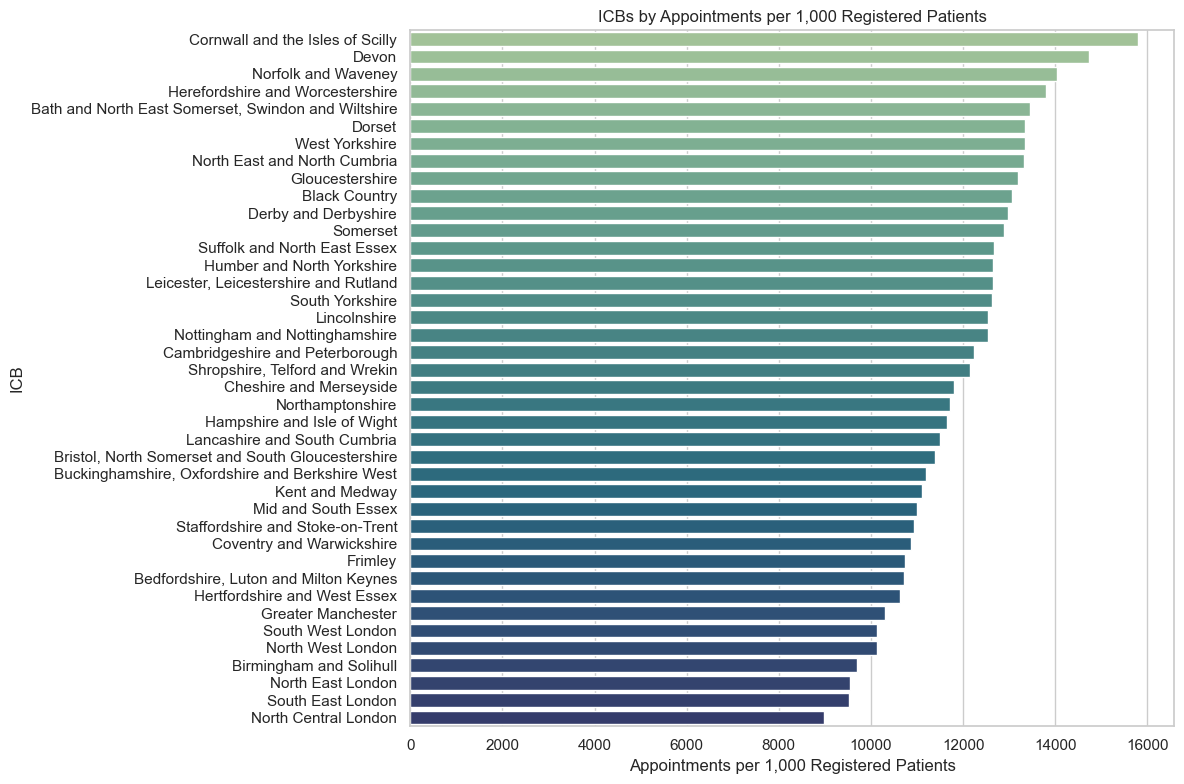

In [92]:
# All ICBs Plot to gain overview
# Calculated over a 30-month period (April 2021 – September 2023), using the most complete dataset (ar) for consistency and comparability."
plt.figure(figsize=(12, 8))
sns.barplot(
    data=icb_level_data.sort_values('appointments_per_1000', ascending=False),
    y='icb_name',
    x='appointments_per_1000',
    palette='crest'
)
plt.title('ICBs by Appointments per 1,000 Registered Patients')
plt.xlabel('Appointments per 1,000 Registered Patients')
plt.ylabel('ICB')
plt.tight_layout()
plt.show()

This plot provides a quick overview of how all the ICBs perform in terms of appointments per 1,000 registered patients over the 30-month period. It is an easy way to check where an ICB sits in the ranking. 

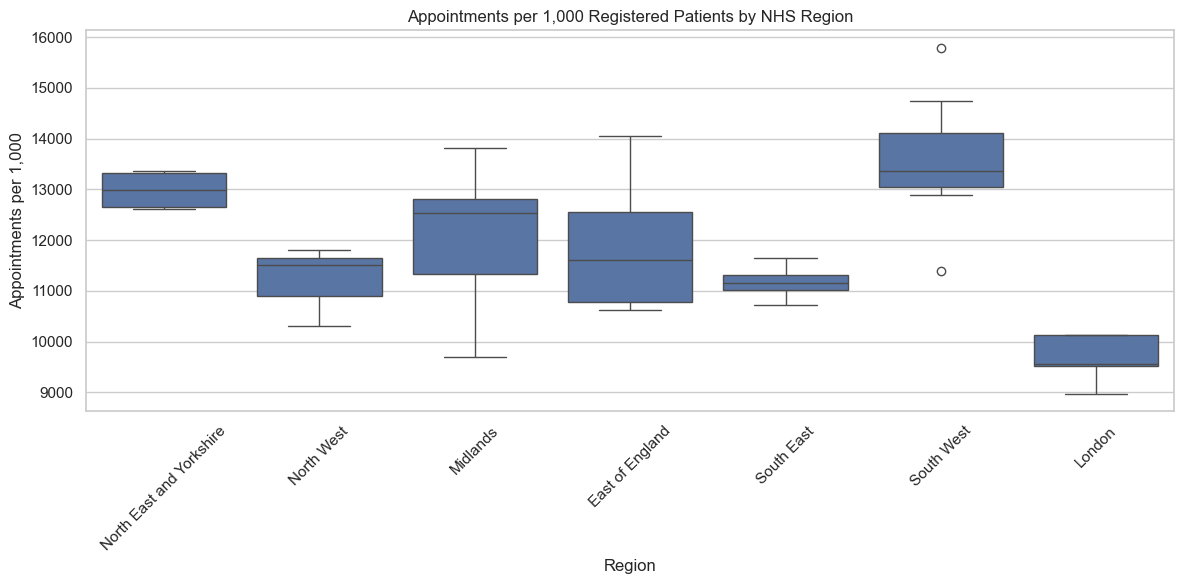

In [93]:
# Show the distribution of appointment rates across the 7 NHS regions

plt.figure(figsize=(12, 6))
sns.boxplot(data=icb_level_data, x='region_name', y='appointments_per_1000')
plt.title('Appointments per 1,000 Registered Patients by NHS Region')
plt.xlabel('Region')
plt.ylabel('Appointments per 1,000')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

The boxplot reveals variation in appointment rates per 1,000 registered patients across ICBs within each NHS region. Regions such as the Midlands, East of England, and South West exhibit wider interquartile ranges (IQRs) and greater overall spread, indicating considerable variation in service delivery across ICBs. This suggests that while some ICBs in these regions may be delivering significantly above average, others are delivering less — potentially due to differences in capacity, reporting, or demand.

In contrast, North East & Yorkshire displays a narrow IQR and short whiskers, suggesting a high level of consistency in appointment delivery across its ICBs. London also shows a narrow IQR but consistently lower appointment rates, with little upward variation. These differences highlight the importance of evaluating region-level performance alongside ICB variation, particularly when making decisions about resource allocation or interpreting headline totals.

This boxplot is included in the technical report when analysing regional level trends. 

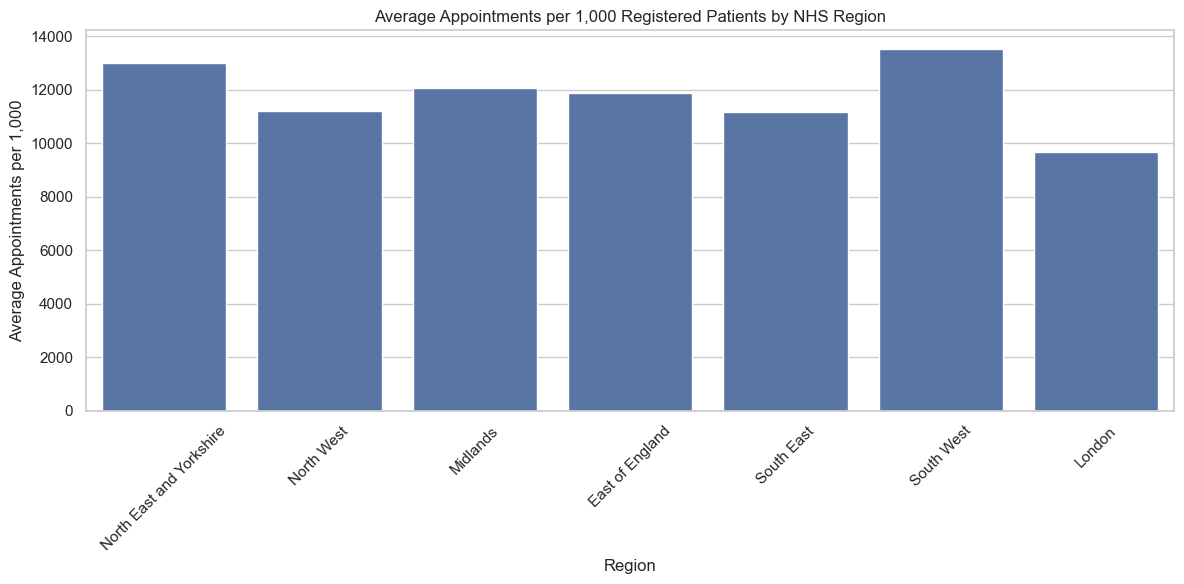

In [94]:
# Plot the average appointments per 1000 registered patients by region
# Define the custom order
custom_order = [
    'North East and Yorkshire',
    'North West',
    'Midlands',
    'East of England',
    'South East',
    'South West',
    'London'
]

# Calculate the mean appointments per 1,000 for each region
mean_appointments = icb_level_data.groupby('region_name')['appointments_per_1000'].mean().reset_index()

# Plot the bar chart with the custom order
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_appointments, x='region_name', y='appointments_per_1000', order=custom_order)
plt.title('Average Appointments per 1,000 Registered Patients by NHS Region')
plt.xlabel('Region')
plt.ylabel('Average Appointments per 1,000')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart presents the average number of appointments delivered per 1,000 registered patients. These values were aggregated from the calculations described in Appendix 7C. While the Midlands and North East & Yorkshire delivered the highest number of total appointments, this reflects both high population and high service volume. However, when adjusted for population size, the South West — despite ranking lower in total appointments — emerges as the highest performer per capita, delivering the most appointments per 1,000 registered patients.

It is important to highlight the issue of data quality and completeness with regional data. The Midlands may benefit from more consistent reporting standards, which could partly explain its higher share of recorded appointments relative to population size.

### Introduced NHS benchmark capacity statistic - 1.2 million appointments per day across entire service

In [95]:
# Group ar by ICB and appointment_month to get total monthly appointments
monthly_actuals = (
    ar.groupby(['icb_ons_code', 'appointment_month'])['count_of_appointments']
    .sum()
    .reset_index()
    .rename(columns={'count_of_appointments': 'actual_monthly_appointments'})
)

# Check sample
monthly_actuals.head()

icb_ons_code appointment_month  actual_monthly_appointments
0    E54000008        2020-01-01                      1191909
1    E54000008        2020-02-01                      1046764
2    E54000008        2020-03-01                      1039370
3    E54000008        2020-04-01                       679586
4    E54000008        2020-05-01                       718248

In [96]:
#check that the dataframe has expected rows for number of ICBs (42) and data frame months (30) = 1260 
monthly_actuals.shape

(1260, 3)

In [97]:
# Use icb_level_data to get total registered patients per ICB
icb_registered = icb_level_data[['icb_ons_code', 'registered_patients', 'icb_name']].copy()

# Calculate total patients nationally
total_patients = icb_registered['registered_patients'].sum()

# Calculate each ICB’s share and expected monthly capacity (21 days × 1.2 million)
icb_registered['patient_share'] = (icb_registered['registered_patients'] / total_patients * 100).round(2)  # as %
icb_registered['expected_monthly_capacity'] = (
    icb_registered['registered_patients'] / total_patients * 1_200_000 * 21
).round()

# Create monthly appointment totals from 'ar'
monthly_actuals = (
    ar.groupby(['icb_ons_code', 'appointment_month'])['count_of_appointments']
    .sum()
    .reset_index()
    .rename(columns={'count_of_appointments': 'actual_monthly_appointments'})
)

# Merge actuals with capacity estimates
monthly_analysis = monthly_actuals.merge(icb_registered, on='icb_ons_code', how='left')

# Calculate whether capacity is exceeded and by how much
monthly_analysis['exceeds_capacity'] = (
    monthly_analysis['actual_monthly_appointments'] > monthly_analysis['expected_monthly_capacity']
)
monthly_analysis['difference'] = (
    monthly_analysis['actual_monthly_appointments'] - monthly_analysis['expected_monthly_capacity']
)

# Preview
monthly_analysis.head()

icb_ons_code appointment_month  actual_monthly_appointments  \
0    E54000008        2020-01-01                      1191909   
1    E54000008        2020-02-01                      1046764   
2    E54000008        2020-03-01                      1039370   
3    E54000008        2020-04-01                       679586   
4    E54000008        2020-05-01                       718248   

   registered_patients                 icb_name  patient_share  \
0              2799136  Cheshire and Merseyside           4.39   
1              2799136  Cheshire and Merseyside           4.39   
2              2799136  Cheshire and Merseyside           4.39   
3              2799136  Cheshire and Merseyside           4.39   
4              2799136  Cheshire and Merseyside           4.39   

   expected_monthly_capacity  exceeds_capacity  difference  
0                  1106917.0              True     84992.0  
1                  1106917.0             False    -60153.0  
2                  1106917.0             False    -67547.0  
3                  1106917.0             False   -427331.0  
4                  1106917.0             False   -388669.0

In [98]:
#Checking that all ICBs are included given complex calculation
monthly_analysis['icb_ons_code'].nunique()

42

In [99]:
# Count how many rows had exceeds_capacity = True
monthly_analysis['exceeds_capacity'].sum()

644

**Selected one ICB randomly to sense check and understand the data created across the 30 months**

In [100]:
# Replace with the ICB ONS code you're interested in
selected_icb = 'E54000008'  # Cheshire and Merseyside ICB

# Filter just that ICB's 30 months of data
icb_30_months = monthly_analysis[monthly_analysis['icb_ons_code'] == selected_icb]

# Reset index for clean display
icb_30_months = icb_30_months.reset_index(drop=True)

# Display result
display(icb_30_months)

icb_ons_code appointment_month  actual_monthly_appointments  \
0     E54000008        2020-01-01                      1191909   
1     E54000008        2020-02-01                      1046764   
2     E54000008        2020-03-01                      1039370   
3     E54000008        2020-04-01                       679586   
4     E54000008        2020-05-01                       718248   
5     E54000008        2020-06-01                       902221   
6     E54000008        2020-07-01                       997236   
7     E54000008        2020-08-01                       902169   
8     E54000008        2020-09-01                      1209566   
9     E54000008        2020-10-01                      1282202   
10    E54000008        2020-11-01                      1126490   
11    E54000008        2020-12-01                      1060021   
12    E54000008        2021-01-01                      1001621   
13    E54000008        2021-02-01                      1006815   
14    E54000008        2021-03-01                      1222043   
15    E54000008        2021-04-01                      1060680   
16    E54000008        2021-05-01                      1052347   
17    E54000008        2021-06-01                      1185764   
18    E54000008        2021-07-01                      1143808   
19    E54000008        2021-08-01                      1063475   
20    E54000008        2021-09-01                      1310024   
21    E54000008        2021-10-01                      1377883   
22    E54000008        2021-11-01                      1365181   
23    E54000008        2021-12-01                      1111622   
24    E54000008        2022-01-01                      1144719   
25    E54000008        2022-02-01                      1130193   
26    E54000008        2022-03-01                      1330633   
27    E54000008        2022-04-01                      1061874   
28    E54000008        2022-05-01                      1212936   
29    E54000008        2022-06-01                      1126805   

    registered_patients                 icb_name  patient_share  \
0               2799136  Cheshire and Merseyside           4.39   
1               2799136  Cheshire and Merseyside           4.39   
2               2799136  Cheshire and Merseyside           4.39   
3               2799136  Cheshire and Merseyside           4.39   
4               2799136  Cheshire and Merseyside           4.39   
5               2799136  Cheshire and Merseyside           4.39   
6               2799136  Cheshire and Merseyside           4.39   
7               2799136  Cheshire and Merseyside           4.39   
8               2799136  Cheshire and Merseyside           4.39   
9               2799136  Cheshire and Merseyside           4.39   
10              2799136  Cheshire and Merseyside           4.39   
11              2799136  Cheshire and Merseyside           4.39   
12              2799136  Cheshire and Merseyside           4.39   
13              2799136  Cheshire and Merseyside           4.39   
14              2799136  Cheshire and Merseyside           4.39   
15              2799136  Cheshire and Merseyside           4.39   
16              2799136  Cheshire and Merseyside           4.39   
17              2799136  Cheshire and Merseyside           4.39   
18              2799136  Cheshire and Merseyside           4.39   
19              2799136  Cheshire and Merseyside           4.39   
20              2799136  Cheshire and Merseyside           4.39   
21              2799136  Cheshire and Merseyside           4.39   
22              2799136  Cheshire and Merseyside           4.39   
23              2799136  Cheshire and Merseyside           4.39   
24              2799136  Cheshire and Merseyside           4.39   
25              2799136  Cheshire and Merseyside           4.39   
26              2799136  Cheshire and Merseyside           4.39   
27              2799136  Cheshire and Merseyside           4.39   
28           

**Plotted Actual vs Expected for Chesire and Merseyside ICB**

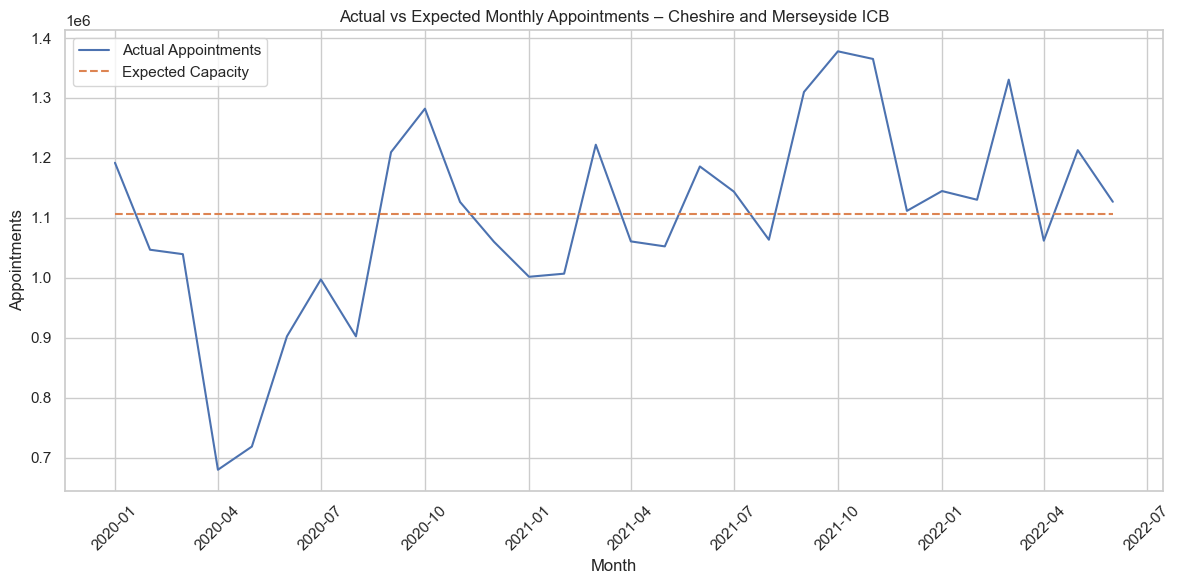

In [101]:
import matplotlib.pyplot as plt

# Filter for a specific ICB (e.g., Cheshire and Merseyside ICB)
icb_30_months = monthly_analysis[monthly_analysis['icb_ons_code'] == 'E54000008'].copy()
icb_30_months['appointment_month'] = pd.to_datetime(icb_30_months['appointment_month'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(icb_30_months['appointment_month'], icb_30_months['actual_monthly_appointments'], label='Actual Appointments')
plt.plot(icb_30_months['appointment_month'], icb_30_months['expected_monthly_capacity'], label='Expected Capacity', linestyle='--')
plt.title('Actual vs Expected Monthly Appointments – Cheshire and Merseyside ICB')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This line chart compares actual appointment volume to expected capacity for the Cheshire and Merseyside ICB, adjusted per 1,000 registered patients. The dashed line represents the ICB’s monthly appointment target based on its population share and the NHS benchmark of 1.2 million appointments per working day nationally.

The chart shows significant fluctuation over time, with several months notably exceeding expectations, especially in late 2021. The early 2020 dip reflects the impact of the first COVID-19 lockdown. This type of analysis helps assess whether an ICB is consistently meeting demand or facing resourcing or reporting challenges.

#### Top performing ICB for appts per 1000 registered patients - Cornwall & The Isles of Scilly

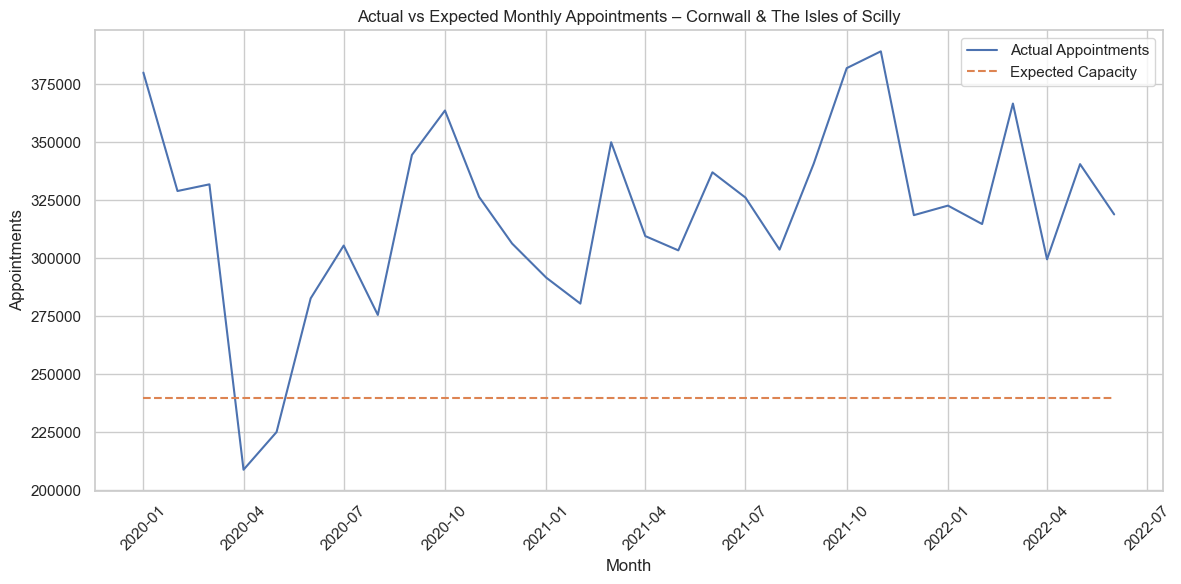

In [102]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for Cornwall & The Isles of Scilly ICB
icb_30_months = monthly_analysis[monthly_analysis['icb_ons_code'] == 'E54000036'].copy()
icb_30_months['appointment_month'] = pd.to_datetime(icb_30_months['appointment_month'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(icb_30_months['appointment_month'], icb_30_months['actual_monthly_appointments'], label='Actual Appointments')
plt.plot(icb_30_months['appointment_month'], icb_30_months['expected_monthly_capacity'], label='Expected Capacity', linestyle='--')
plt.title('Actual vs Expected Monthly Appointments – Cornwall & The Isles of Scilly')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cornwall & The Isles of Scilly ranks as the top-performing ICB in England by appointments per 1,000 registered patients. This chart shows that the ICB consistently exceeds its expected appointment capacity, with most months sitting well above the benchmark based on registered patients-adjusted national targets.

The post-lockdown recovery in mid-2020 and the surge in late 2021 stand out as periods of particularly high delivery. Sustained overperformance suggests strong system resilience, effective resource deployment, and possibly higher demand or activity due to local healthcare dynamics. It may also suggest over utilisation and ICB strain. 

#### Bottom performing ICB for appts per 1000 registered patients - North Central London

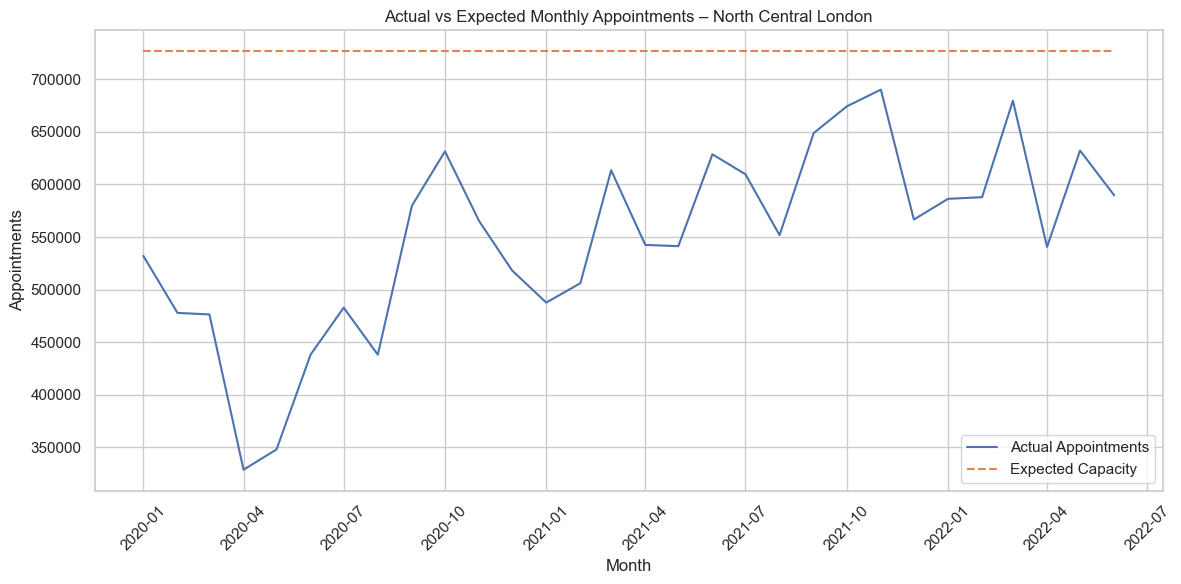

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for North Central London ICB
icb_30_months = monthly_analysis[monthly_analysis['icb_ons_code'] == 'E54000028'].copy()
icb_30_months['appointment_month'] = pd.to_datetime(icb_30_months['appointment_month'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(icb_30_months['appointment_month'], icb_30_months['actual_monthly_appointments'], label='Actual Appointments')
plt.plot(icb_30_months['appointment_month'], icb_30_months['expected_monthly_capacity'], label='Expected Capacity', linestyle='--')
plt.title('Actual vs Expected Monthly Appointments – North Central London')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

North Central London is the lowest-performing ICB in terms of appointments per 1,000 registered patients. As shown in this chart, actual appointment delivery remains consistently below the expected capacity benchmark for nearly every month.

Despite some recovery following the first COVID-19 lockdown, the gap between expected and actual delivery remains significant throughout the 30-month period. This persistent underperformance may reflect structural service pressures, staffing constraints, or data reporting differences within the region.

These ICB level charts were not included in the main analysis, as they were not considered central to answering the core business questions. However, with additional time and resources, there is clear value in further exploring ICB-level data in more detail. For instance, future work could include generating charts comparing actual vs. expected appointment rates per ICB, or identifying outliers in service provision. These early visualisations represent only the tip of the iceberg and highlight the potential for deeper analysis to support localised decision-making.

### What % of ICBs exceeded capacity each month?
This will give stakeholders a clear view of how strained the system was month to month.

In [104]:
# Count how many ICBs exceeded capacity per month
monthly_exceed_summary = (
    monthly_analysis
    .groupby('appointment_month')['exceeds_capacity']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

# Add percentage column
monthly_exceed_summary['%_ICBs_exceeded'] = (
    monthly_exceed_summary[True] / (monthly_exceed_summary[True] + monthly_exceed_summary[False]) * 100
)

# Rename for clarity
monthly_exceed_summary = monthly_exceed_summary.rename(columns={
    True: 'ICBs_exceeded',
    False: 'ICBs_not_exceeded'
})

# View result
monthly_exceed_summary.head(30)

exceeds_capacity appointment_month  ICBs_not_exceeded  ICBs_exceeded  \
0                       2020-01-01                 12             30   
1                       2020-02-01                 21             21   
2                       2020-03-01                 22             20   
3                       2020-04-01                 42              0   
4                       2020-05-01                 42              0   
5                       2020-06-01                 39              3   
6                       2020-07-01                 32             10   
7                       2020-08-01                 40              2   
8                       2020-09-01                 12             30   
9                       2020-10-01                  7             35   
10                      2020-11-01                 18             24   
11                      2020-12-01                 27             15   
12                      2021-01-01                 31             11   
13                      2021-02-01                 32             10   
14                      2021-03-01                 12             30   
15                      2021-04-01                 25             17   
16                      2021-05-01                 27             15   
17                      2021-06-01                 13             29   
18                      2021-07-01                 16             26   
19                      2021-08-01                 26             16   
20                      2021-09-01                  6             36   
21                      2021-10-01                  4             38   
22                      2021-11-01                  4             38   
23                      2021-12-01                 19             23   
24                      2022-01-01                 16             26   
25                      2022-02-01                 18             24   
26                      2022-03-01                  3             39   
27                      2022-04-01                 25             17   
28                      2022-05-01                  8             34   
29                      2022-06-01                 17             25   

exceeds_capacity  %_ICBs_exceeded  
0                       71.428571  
1                       50.000000  
2                       47.619048  
3                        0.000000  
4                        0.000000  
5                        7.142857  
6                       23.809524  
7                        4.761905  
8                       71.428571  
9                       83.333333  
10                      57.142857  
11                      35.714286  
12                      26.190476  
13                      23.809524  
14                      71.428571  
15                      40.476190  
16                      35.714286  
17                      69.047619  
18                      61.904762  
19                      38.095238  
20                      85.714286  
21                      90.476190  
22                      90.476190  
23                      54.761905  
24                      61.904762  
25                      57.142857  
26                      92.857143  
27                      40.476190  
28                      80.952381  
29                      59.523810

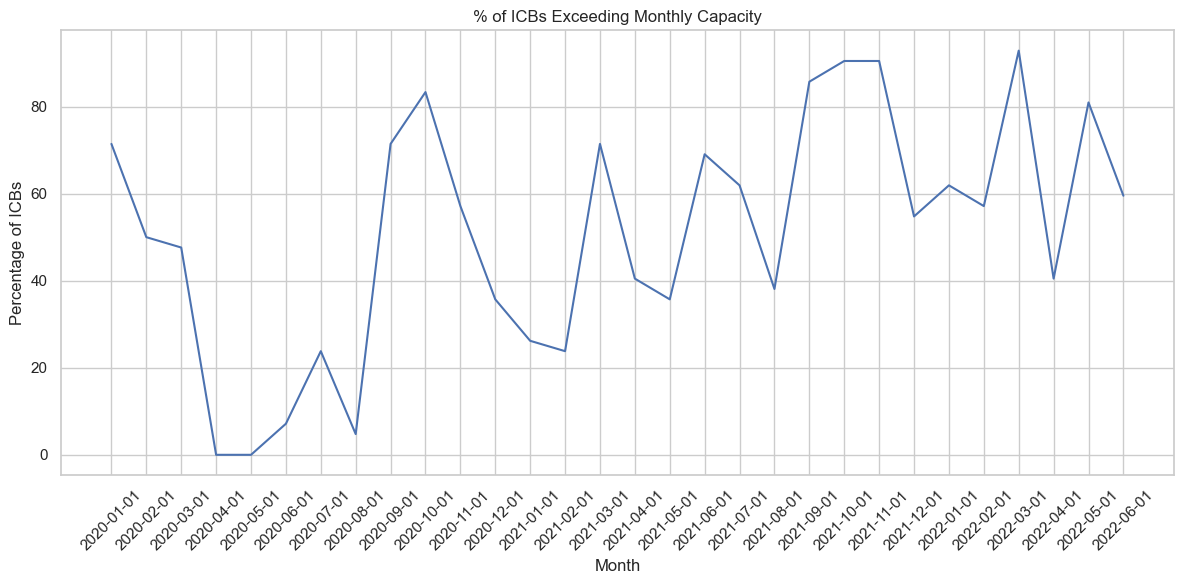

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot to visualise capacity pressure
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_exceed_summary, x='appointment_month', y='%_ICBs_exceeded')
plt.title('% of ICBs Exceeding Monthly Capacity')
plt.ylabel('Percentage of ICBs')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Decided to add the shading of key periods to make the chart more meaningful. 
Here I introduced additional shading for the following:
- 1st Lockdown (Mar–May 2020)
- 1st Backlog Recovery (May–Oct 2020)
- 2nd/3rd Lockdown (Nov 2020–Mar 2021)
- 2nd Recovery (Aug–Nov 2021)
- Omicron wave & Christmas (Dec 2021–Feb 2022

The research behind these bands is explored in detail in the technical report. 

I also added the 100% capacity line - although obvious it is a nice touch

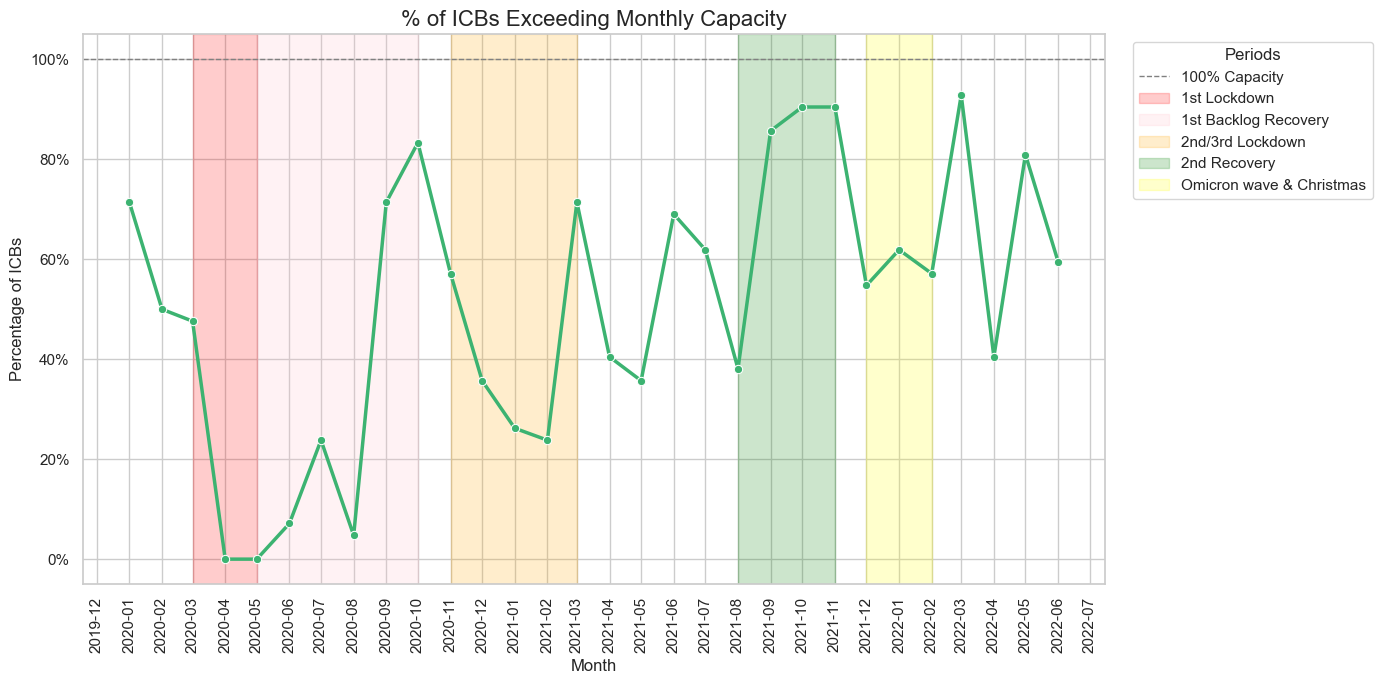

In [106]:
# Extended version with shaded lockdown periods

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import PercentFormatter
import matplotlib.dates as mdates

# Convert month to datetime if needed
monthly_exceed_summary['appointment_month'] = pd.to_datetime(monthly_exceed_summary['appointment_month'])

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_exceed_summary, x='appointment_month', y='%_ICBs_exceeded', color="mediumseagreen", linewidth=2.5, marker="o", markersize=6)

# Add horizontal line for 100%
plt.axhline(y=100, linestyle='--', color='gray', linewidth=1, label='100% Capacity')

# Add shaded periods
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2020-05-01"), color="red", alpha=0.2, label="1st Lockdown")
plt.axvspan(pd.to_datetime("2020-05-01"), pd.to_datetime("2020-10-01"), color="pink", alpha=0.2, label="1st Backlog Recovery")
plt.axvspan(pd.to_datetime("2020-11-01"), pd.to_datetime("2021-03-01"), color="orange", alpha=0.2, label="2nd/3rd Lockdown")
plt.axvspan(pd.to_datetime("2021-08-01"), pd.to_datetime("2021-11-01"), color="green", alpha=0.2, label="2nd Recovery")
plt.axvspan(pd.to_datetime("2021-12-01"), pd.to_datetime("2022-02-01"), color="yellow", alpha=0.2, label="Omicron wave & Christmas")

# Labels and formatting
plt.title('% of ICBs Exceeding Monthly Capacity', fontsize=16)
plt.ylabel('Percentage of ICBs', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter())

# Show every month on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), title="Periods", frameon=True, framealpha=0.8)

plt.tight_layout()
plt.show()

The resulting line chart provides a clear picture of how stretched the system was across the country, month by month. This analysis highlights regional variation and strain, showing that even when the system appears to stay within capacity on average, a significant number of local areas may be overburdened.

This chart is compared with the % Utilisation graph (found in the Summary Visualisations) within the technical report and business presentation. 

## Time Based Analysis
### Monthly Trends by Service Setting, Context Types and National Categories

In [107]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

**Appointments per month by Service Settings:**

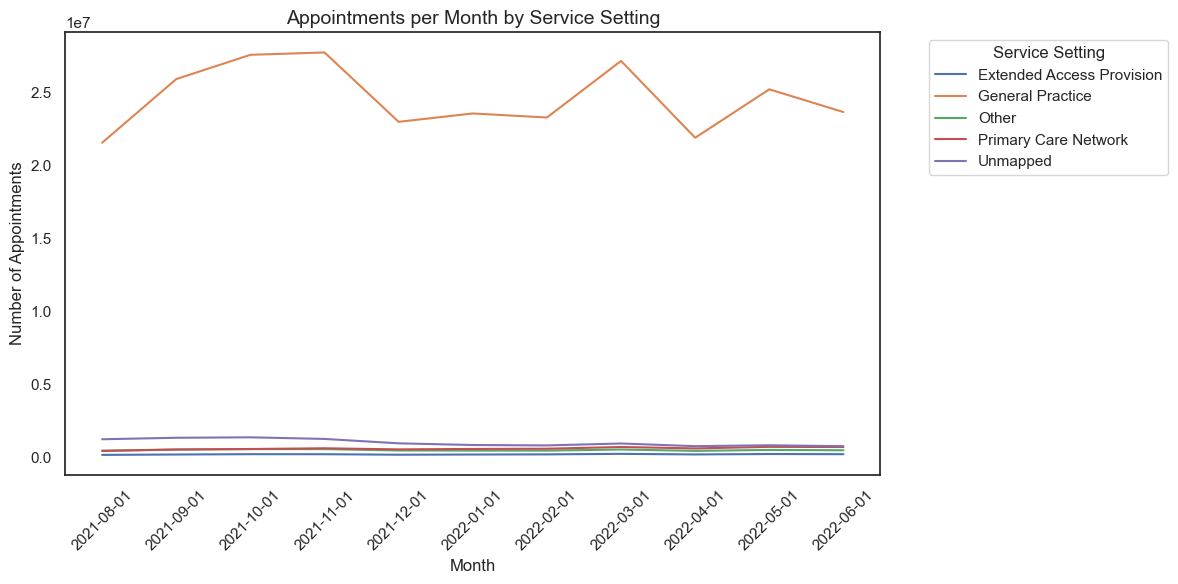

In [108]:
# Convert appointment_month to string for easier visualisation
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Group by appointment_month and service_setting
# Aggregate the total number of appointments
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Plot the line chart using Seaborn
plt.figure(figsize=(12, 6))  # Moderate plot size for balance

sns.lineplot(
    data=nc_ss,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    errorbar=None  # Seaborn ≥ 0.12.0
)

# Improve visual presentation
plt.title("Appointments per Month by Service Setting", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Appointments", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend to the side
plt.tight_layout()
plt.show()

Generate Practice dominates throughout the timeframe. Due to the range between GP and other service settings, it is difficult to 
analyse the other settings. It would be beneficial to apply a logarithmic scale to help visualise all service settings more clearly.

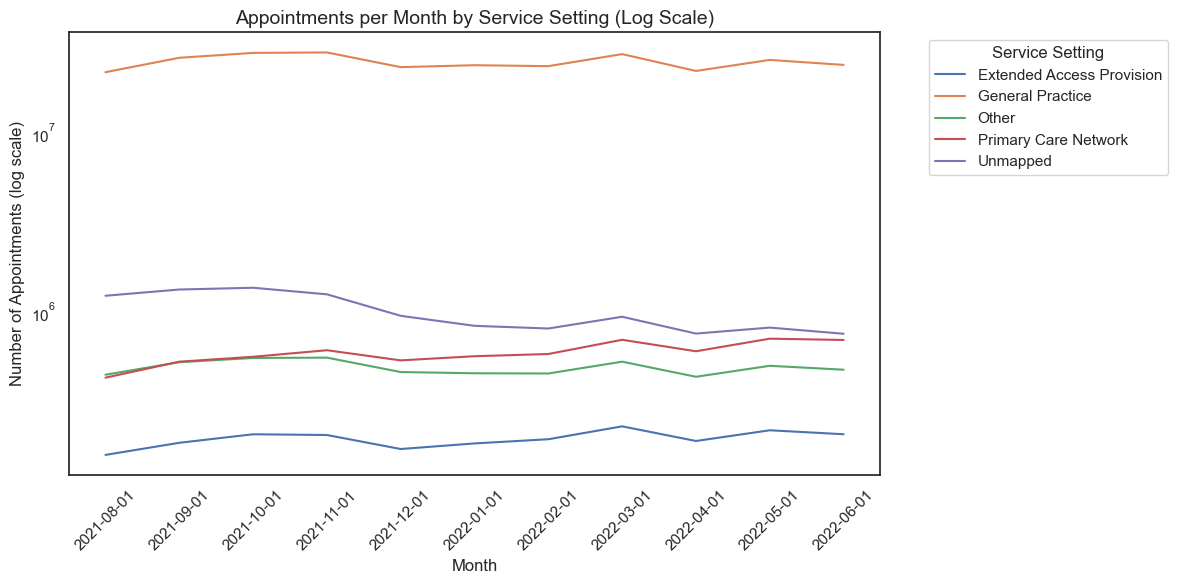

In [109]:
# Convert appointment_month to string for easier visualisation
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Group by appointment_month and service_setting
# Aggregate the total number of appointments
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Plot the line chart using Seaborn
plt.figure(figsize=(12, 6))  

sns.lineplot(
    data=nc_ss,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    errorbar=None  
)

# Improve visual presentation
# Apply log scale to y-axis to improve visibility and all settings
plt.yscale('log') 
plt.title("Appointments per Month by Service Setting (Log Scale)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Appointments (log scale)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

- General Practice consistently dominates in appointment volume throughout the period, reflecting its central role in primary care delivery.

- Unmapped appointments show a steady decline, suggesting improvements in service classification or data recording practices over time.

- Primary Care Network (PCN) appointments increase gradually, likely reflecting NHS policy efforts to strengthen integrated, team-based community care.

- Other service settings (e.g., Extended Access Provision and 'Other') remain relatively stable, but at much lower volumes than GP services.

- The rise in PCN appointments could be attributed to NHS England’s Primary Care Networks initiative, aimed at improving access, proactive care, and population health management [Link](https://www.england.nhs.uk/publication/gp-contract-five-year-framework/)

Interested to compare it with when GP is removed from the plot all together

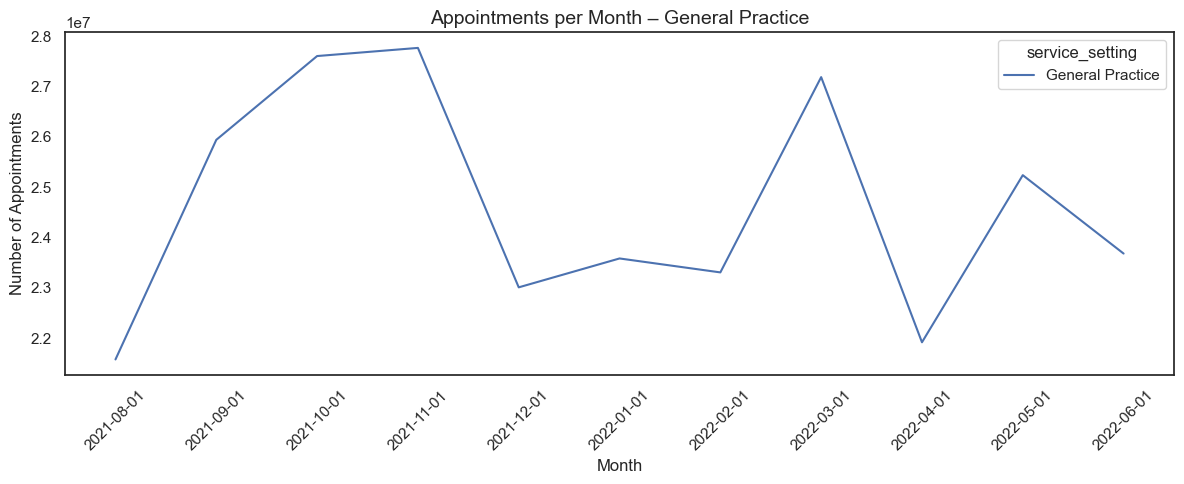

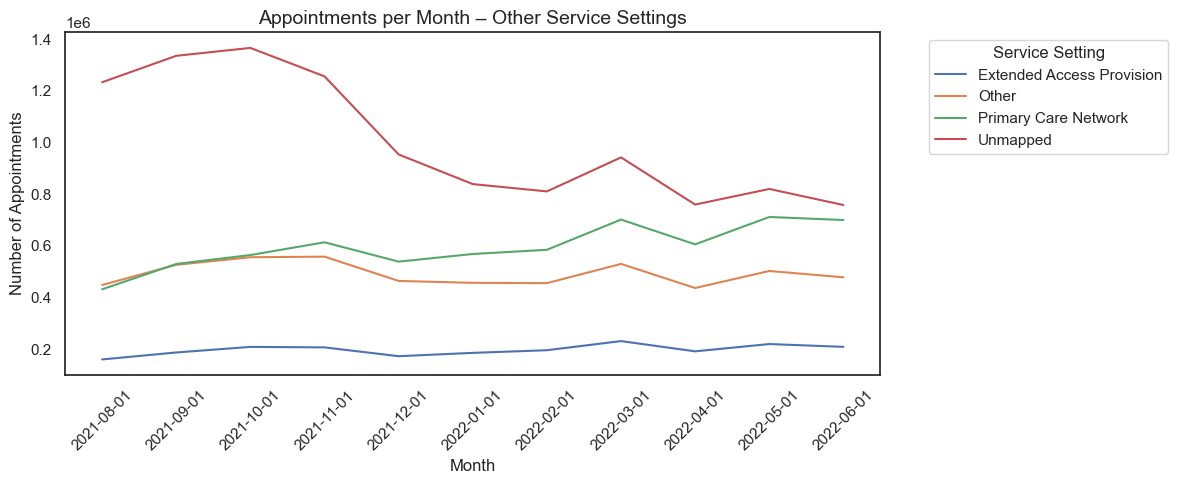

In [110]:
# Plot GP seperately to the other service settings to improve visability of potential trends
# Convert appointment_month to string for easier plotting
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Group data by appointment_month and service_setting
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Split data into two sets
# One for General Practice
nc_gp = nc_ss[nc_ss['service_setting'] == 'General Practice']

# One for all other service settings
nc_other = nc_ss[nc_ss['service_setting'] != 'General Practice']

# Plot General Practice appointments
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=nc_gp,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    errorbar=None
)
plt.title("Appointments per Month – General Practice", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Appointments", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot all other service settings
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=nc_other,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    errorbar=None
)
plt.title("Appointments per Month – Other Service Settings", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Appointments", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The peaks and troughs in appointment activity become more pronounced once GP data is seperated. This makes the drop in 'Unmapped' appointments more visible and clearly shows the steady rise in Primary Care Network (PCN) appointments over time, as previously discussed.
- The rise in PCN appointments could be attributed to NHS England’s Primary Care Networks initiative, aimed at improving access, proactive care, and population health management [Link](https://www.england.nhs.uk/publication/gp-contract-five-year-framework/)

**How does the spread of service settings compare?**

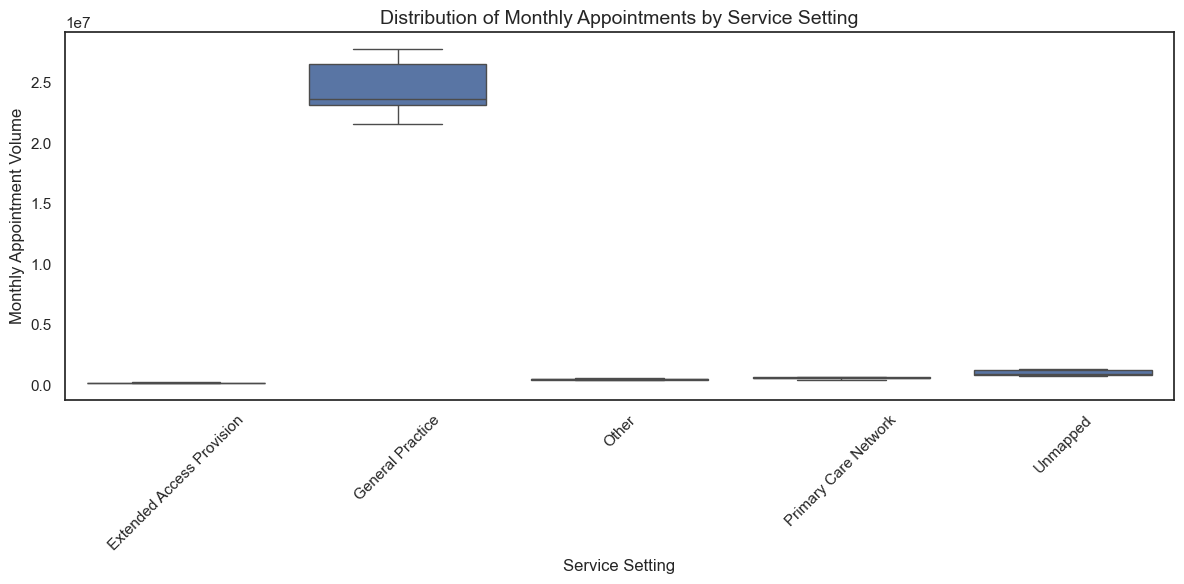

In [111]:
# Create a boxplot to investigate the spread of service settings.
import seaborn as sns
import matplotlib.pyplot as plt

# Convert appointment_month to string (if not already done)
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Group by appointment_month and service_setting to get total monthly appointments
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Plot boxplot of appointment counts by service setting
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=nc_ss,
    x='service_setting',
    y='count_of_appointments'
)

# Style the plot
plt.title("Distribution of Monthly Appointments by Service Setting", fontsize=14)
plt.xlabel("Service Setting", fontsize=12)
plt.ylabel("Monthly Appointment Volume", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This boxplot visualises the variation in monthly appointment volumes across service settings. As expected, 'General Practice' dominates in both volume and variability. In contrast, categories like 'Extended Access Provision' and 'Primary Care Network' show much lower volumes, and the 'Unmapped' category adds ambiguity.

This chart was not included in the final business presentation or report due to its limited analytical value. The overwhelming dominance of General Practice obscures meaningful comparisons across categories, making it difficult to draw actionable insights. Other figures in the report better support the key findings on service trends.

Another boxplot with GP removed:

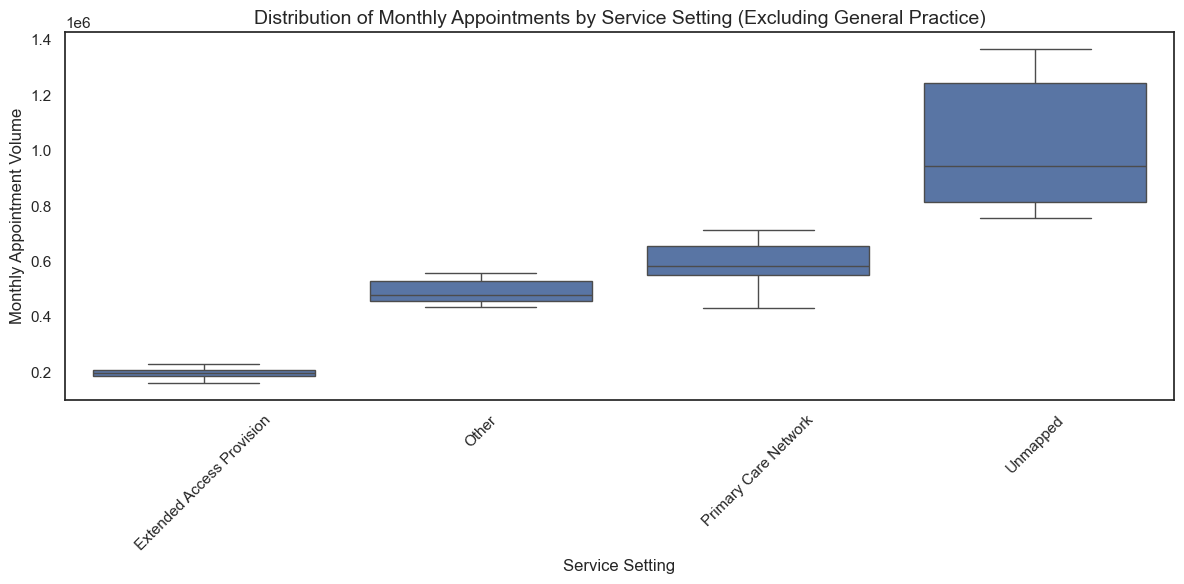

In [112]:
# Create a boxplot to investigate the service settings without GP.
# Filter out General Practice from the grouped data
nc_ss_no_gp = nc_ss[nc_ss['service_setting'] != 'General Practice']

# Plot boxplot for service settings excluding General Practice
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=nc_ss_no_gp,
    x='service_setting',
    y='count_of_appointments'
)

# Style the plot
plt.title("Distribution of Monthly Appointments by Service Setting (Excluding General Practice)", fontsize=14)
plt.xlabel("Service Setting", fontsize=12)
plt.ylabel("Monthly Appointment Volume", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart excludes General Practice to better highlight variation among the smaller service settings. It shows that 'Unmapped' and 'Primary Care Network' categories account for the highest appointment volumes among the remaining groups, with 'Unmapped' displaying considerable spread across months. 'Other' and 'Extended Access Provision' are more stable but contribute relatively fewer appointments.

Although more interpretable without General Practice dominating the scale, this visual was still excluded from the final report. The category definitions (particularly 'Unmapped' and 'Other') are too ambiguous to support confident conclusions or meaningful recommendations. As such, this chart was more helpful during exploratory analysis than final outputs.

**Appointments per month by Context Types:**

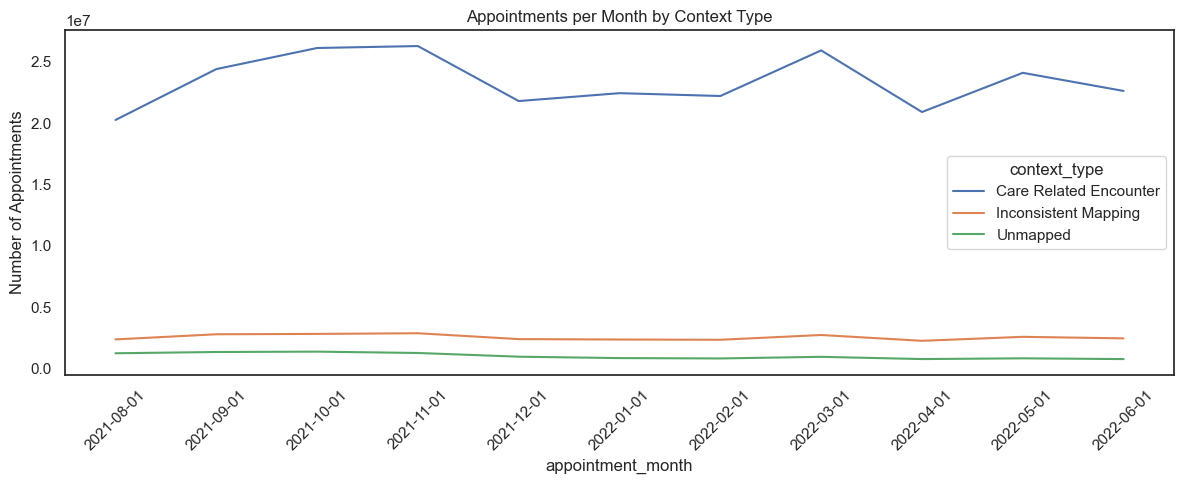

In [113]:
# Convert appointment_month to string (if not already done)
# This makes the month column easier to plot on the x-axis
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Group by appointment_month and context_type to get total counts
# This creates a summary table of total appointments per context type per month
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# View the output
# This shows the first few rows to check the grouped result
nc_ct.head()

# Plot the data using a lineplot
# This shows how different context types varied month-to-month
plt.figure(figsize=(12, 5))  # Set plot size

sns.lineplot(
    data=nc_ct,
    x='appointment_month',               # X-axis: appointment month
    y='count_of_appointments',           # Y-axis: number of appointments
    hue='context_type',                  # Line colour by context type
    errorbar=None                        # Avoid error bars for seaborn ≥ 0.12
)

# Style the chart
plt.title("Appointments per Month by Context Type")   # Add chart title
plt.ylabel("Number of Appointments")                  # Y-axis label
plt.xticks(rotation=45)                               # Rotate x labels for readability
plt.tight_layout()                                    # Clean layout
plt.show()                                            # Show the plot

Care Related Encounter dominates. Difficult to see any trends in Inconsistent Mapping or Unmapped due to scale of graph.

It would be beneficial to apply a logarithmic scale to help visualise all context types more clearly.

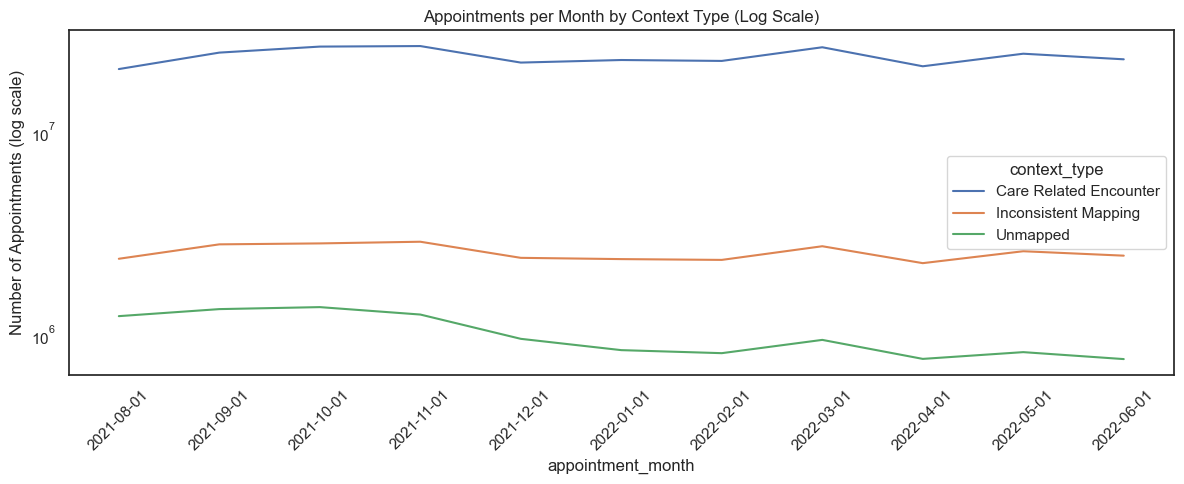

In [114]:
# Convert appointment_month to string (if not already done)
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Group by appointment_month and context_type to get total counts
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# View the output
nc_ct.head()

# Plot the data using a lineplot
plt.figure(figsize=(12, 5))  # Set plot size

sns.lineplot(
    data=nc_ct,
    x='appointment_month',               # X-axis: appointment month
    y='count_of_appointments',           # Y-axis: number of appointments
    hue='context_type',                  # Line colour by context type
    errorbar=None                        # Avoid error bars for seaborn ≥ 0.12
)

# Style the chart
# Apply log scale to y-axis
plt.yscale('log')                                      
plt.title("Appointments per Month by Context Type (Log Scale)")   # Add chart title
plt.ylabel("Number of Appointments (log scale)")                  # Y-axis label
plt.xticks(rotation=45)                               # Rotate x labels for readability
plt.tight_layout()                                    # Clean layout
plt.show()                                            # Show the plot

This chart was explored during analysis but not included in the final report or presentation. As this is a GP-focused dataset, it is unsurprising that the majority of records fall under the 'Care Related Encounter' category. The remaining two context types — 'Inconsistent Mapping' and 'Unmapped' - offer limited analytical value in terms of understanding GP service delivery.

However, the presence of a consistent mid-level trend for 'Inconsistent Mapping' does reinforce underlying data quality issues in the dataset. It serves as a reminder of the limitations in how appointments are categorised and recorded.

**Appointments per month by National Categories:**

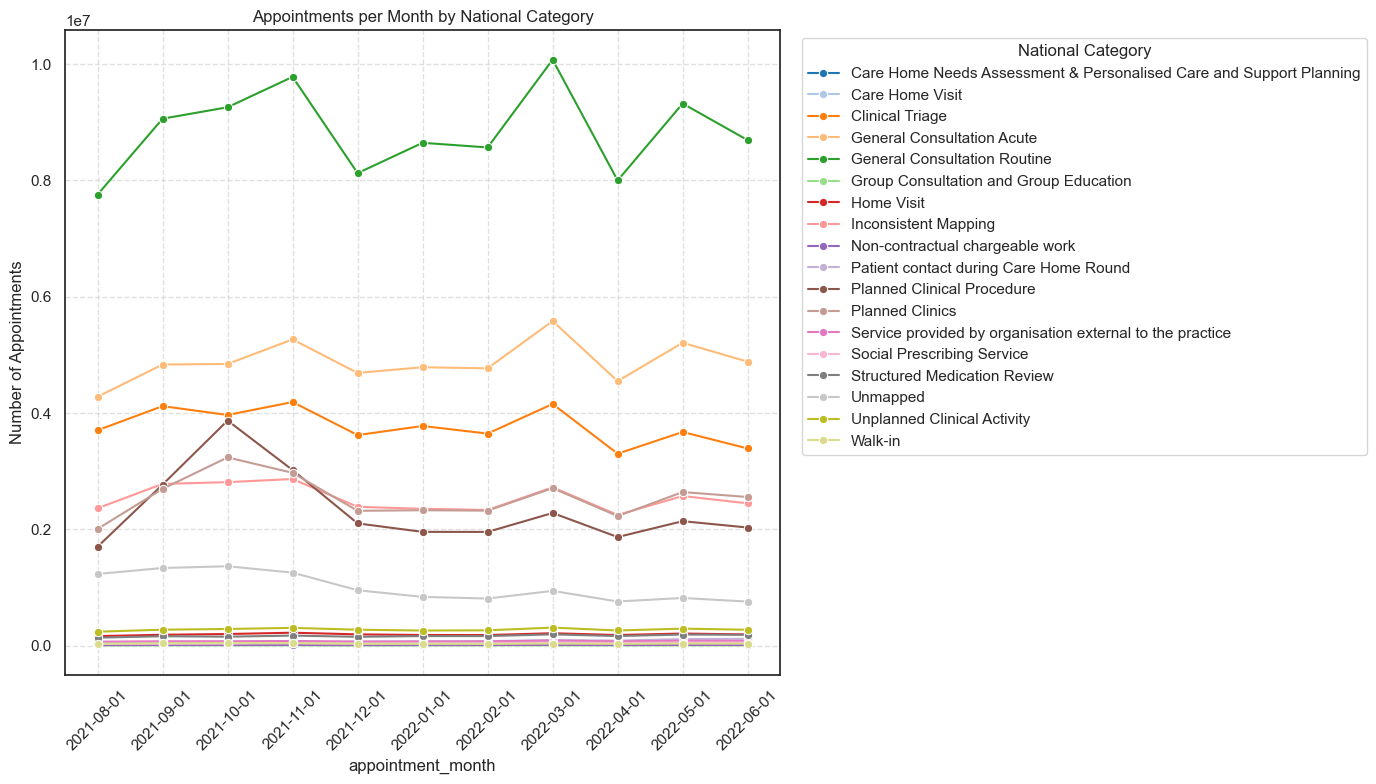

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert appointment_month to string
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Group data by appointment_month and national_category
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# Plot using a clearer color palette
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=nc_nc,
    x='appointment_month',
    y='count_of_appointments',
    hue='national_category',
    marker="o",
    palette='tab20',     
    errorbar=None
)

# Style the plot
plt.title("Appointments per Month by National Category")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.6)
plt.legend(title='National Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

This line plot has too much information to reveal any true value. Need to plot top 5.

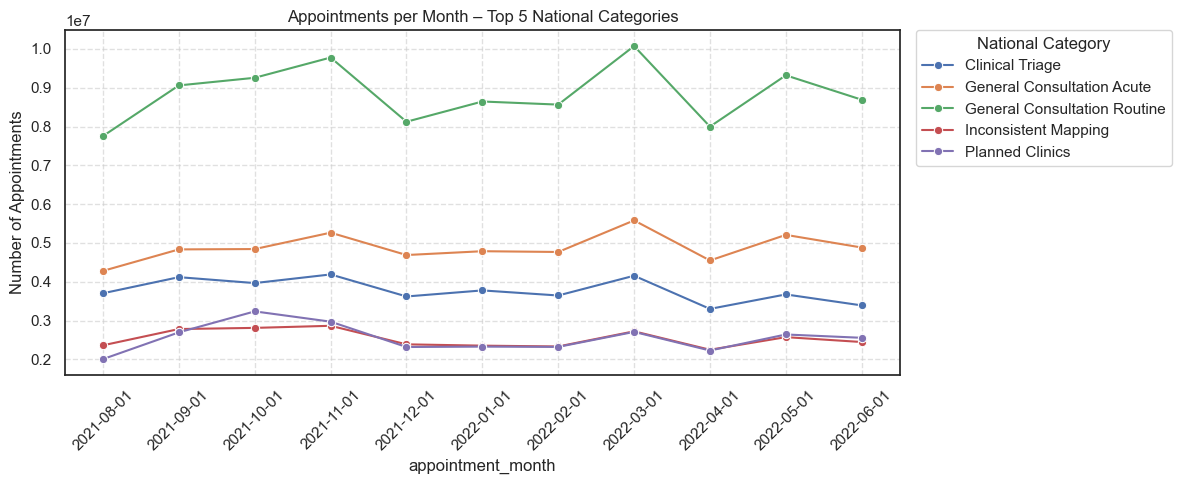

In [116]:
# alculate total appointments by national category
top_nc = nc.groupby('national_category')['count_of_appointments'].sum().sort_values(ascending=False).head(5).index

# Filter for only the top 5 national categories
nc_top = nc[nc['national_category'].isin(top_nc)]

# Group by appointment_month and national_category
nc_nc_top = nc_top.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# Convert month to string (if not already done)
nc_nc_top['appointment_month'] = nc_nc_top['appointment_month'].astype(str)

# Plot the simplified lineplot with markers and grid lines
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=nc_nc_top,
    x='appointment_month',
    y='count_of_appointments',
    hue='national_category',
    marker="o",             
    errorbar=None
)
plt.title("Appointments per Month – Top 5 National Categories")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', alpha=0.6)  

# Move legend to the right of the plot
plt.legend(
    title='National Category',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()

This chart was used to explore trends across the most common national appointment categories in the dataset. As expected in a GP context, 'General Consultation Routine' consistently has the highest volume, followed by 'General Consultation Acute' and 'Clinical Triage'.

'Planned Clinics' and 'Inconsistent Mapping' contribute less volume, but 'Inconsistent Mapping' again highlights underlying data quality limitations.

While the chart provides useful validation of what types of care dominate GP activity, it was not used in the final presentation as it offered limited insight into capacity and utilisation.

### Seasonal Trends
The seasons are Summer (June to August 2021), Autumn (September to November 2021), Winter (December to February 2022), and Spring (March to May 2022).

**Summer:** June to August 2021

NC dataset range is from 1st August 2021 - 30th June 2022 (11 months) so can only explore August 2021

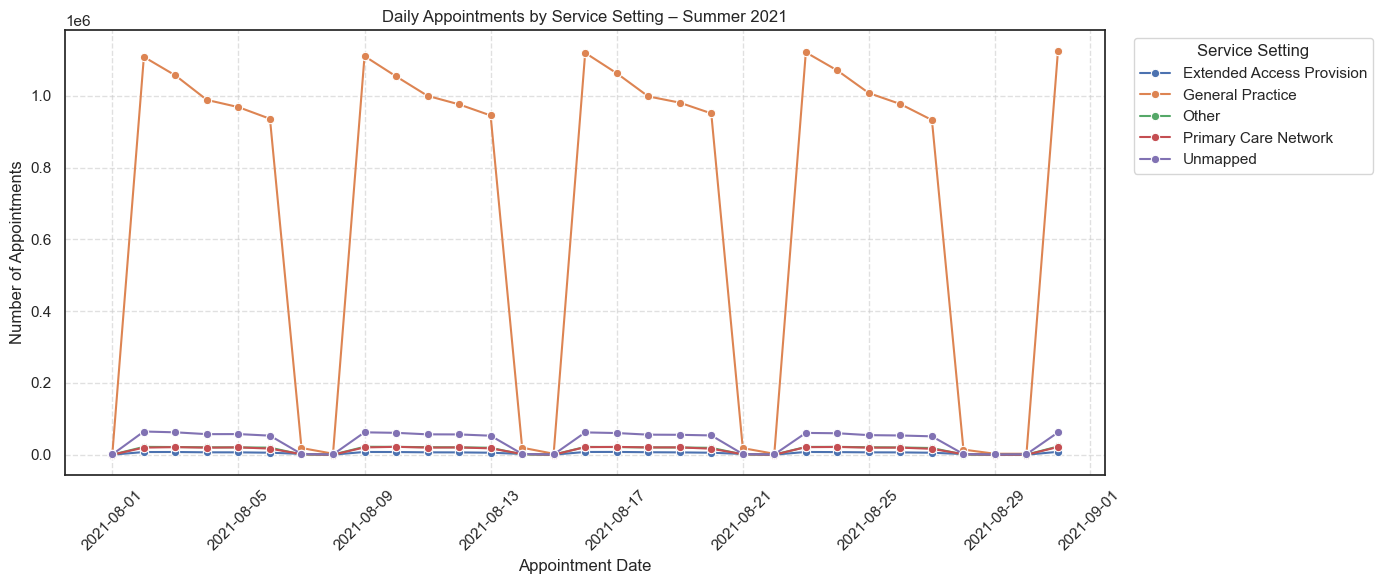

In [117]:
# Summer: August 2021 only (limited by available data) 
# The line plot shows how appointment volumes changed day-by-day, given the data cannot be viewed across Summer months

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert appointment_date to datetime 
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Filter for August 2021 only
nc_august = nc[
    (nc['appointment_date'].dt.year == 2021) &
    (nc['appointment_date'].dt.month == 8)
]

# Group by appointment_date and service_setting
daily_counts = (
    nc_august.groupby(['appointment_date', 'service_setting'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Plot line chart
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=daily_counts,
    x='appointment_date',
    y='count_of_appointments',
    hue='service_setting',
    marker='o',
    errorbar=None
)

# Style the plot
plt.title("Daily Appointments by Service Setting – Summer 2021")
plt.xlabel("Appointment Date")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Service Setting', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

The dramatic dips are weekends. This view also demonstrates the decline in appointments throughout the weekdays - peaking on Mondays and declining each day until Friday.

**Autumn:** September to November 2021

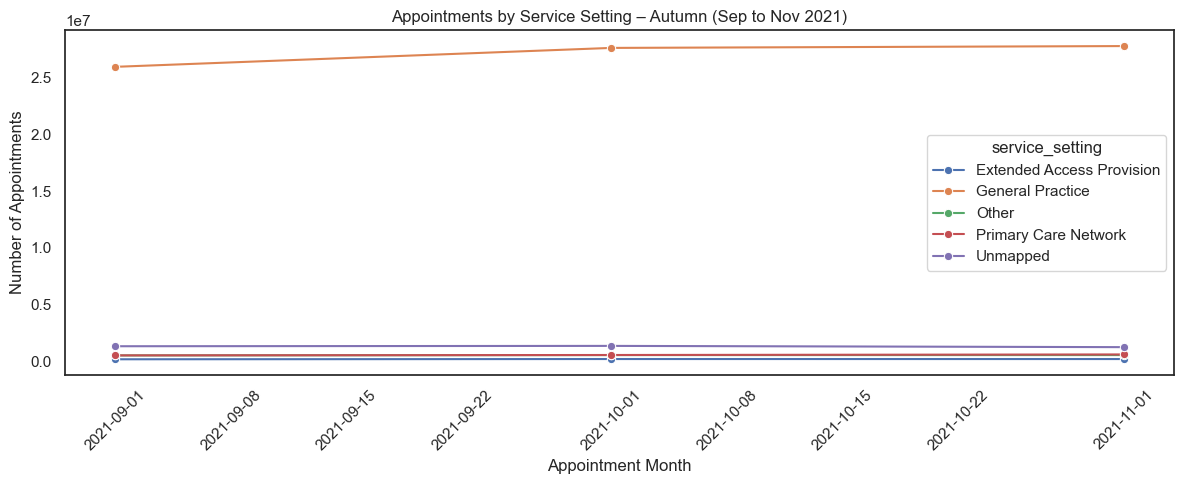

In [118]:
# Autumn: September to November 2021

# Ensure datetime conversion happens first
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'], errors='coerce')

# Convert appointment_month to string format YYYY-MM for filtering
nc['appointment_month_str'] = nc['appointment_month'].dt.strftime('%Y-%m')

# Filter the nc dataset for autumn months using the new string column
nc_autumn = nc[nc['appointment_month_str'].isin(['2021-09', '2021-10', '2021-11'])]

# Group by original datetime month and service setting
nc_autumn_grouped = nc_autumn.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=nc_autumn_grouped,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    marker='o',
    errorbar=None
)

# Formatting
plt.title("Appointments by Service Setting – Autumn (Sep to Nov 2021)")
plt.xlabel("Appointment Month")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There is a rise at the start of Autumn but it remains level for the remainder of the season

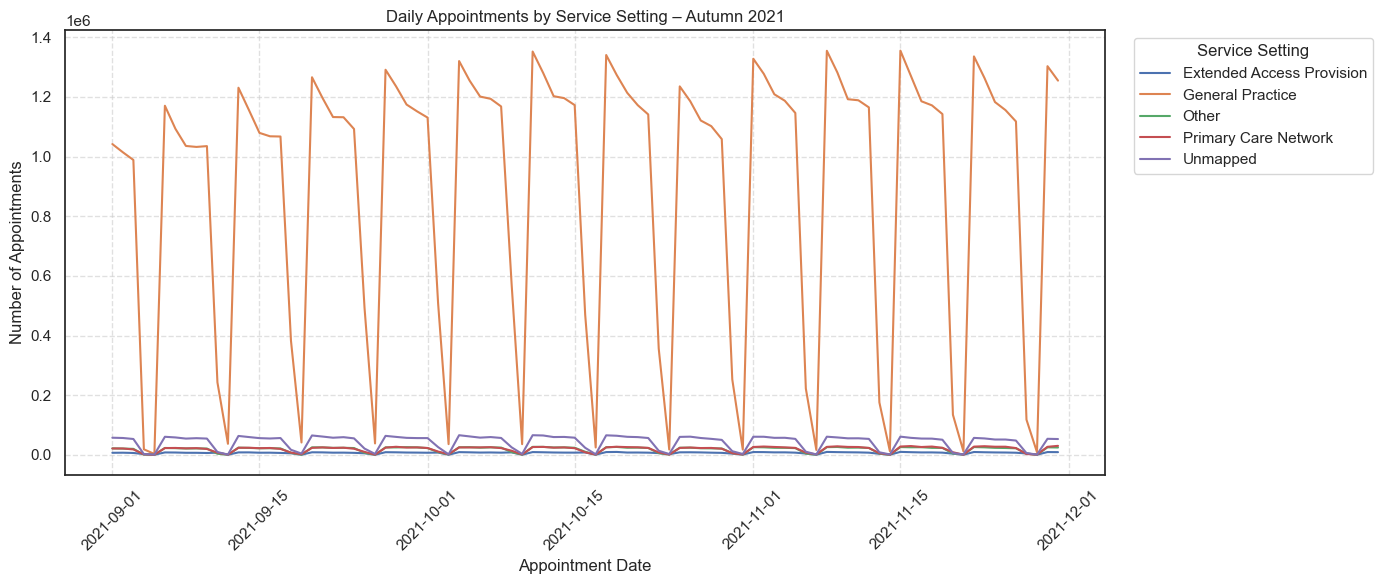

In [119]:
#View a daily plot as monthly represents 3 data points and limited value

# Convert 'appointment_date' to datetime if not already
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Filter the dataset for autumn (September to November 2021)
nc_autumn_daily = nc[
    (nc['appointment_date'] >= '2021-09-01') &
    (nc['appointment_date'] <= '2021-11-30')
]

# Group by date and service setting
nc_autumn_daily_grouped = nc_autumn_daily.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Create the daily lineplot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=nc_autumn_daily_grouped,
    x='appointment_date',            # Daily dates
    y='count_of_appointments',
    hue='service_setting',
    errorbar=None
)

# Format the plot
plt.title("Daily Appointments by Service Setting – Autumn 2021")
plt.xlabel("Appointment Date")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Service Setting', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

Again, can see that there is a rise at the start of Autumn but it remains level for the remainder of the season.

Similar trends are observed as per the Summer graph above - the dramatic dips are weekends. This view also demonstrates the decline in appointments throughout the weekdays - peaking on Mondays and declining each day until Friday.

By plotting each date, rather than monthly, it enables us to view the patterns in the other service settings (outside of GP). That is, the rise in appointments during the weekdays.

**Winter:** December to February 2022

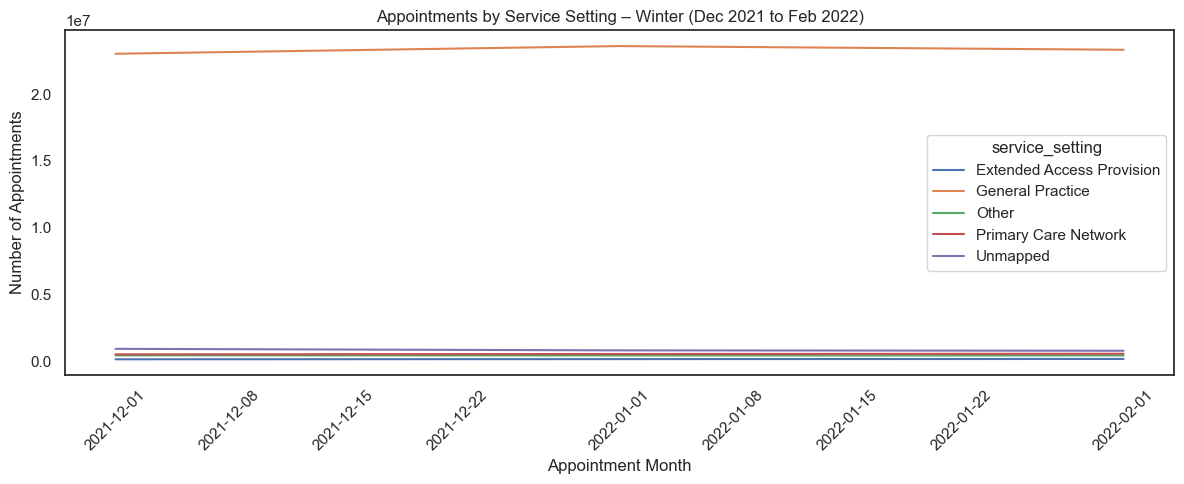

In [120]:
# Winter: December 2021 to February 2022

# Filter the nc dataset for winter months
nc_winter = nc[nc['appointment_month'].isin(['2021-12', '2022-01', '2022-02'])]

# Group by month and service setting, and calculate total appointments
nc_winter_grouped = nc_winter.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the output
nc_winter_grouped.head()

# Create a lineplot showing trends over winter months
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=nc_winter_grouped,
    x='appointment_month',             
    y='count_of_appointments',         
    hue='service_setting',          
    errorbar=None                      # Disable confidence intervals (for Seaborn ≥ 0.12.0)
)

# Format the plot
plt.title("Appointments by Service Setting – Winter (Dec 2021 to Feb 2022)")
plt.xlabel("Appointment Month")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot demonstrates routine, consistent service delivery

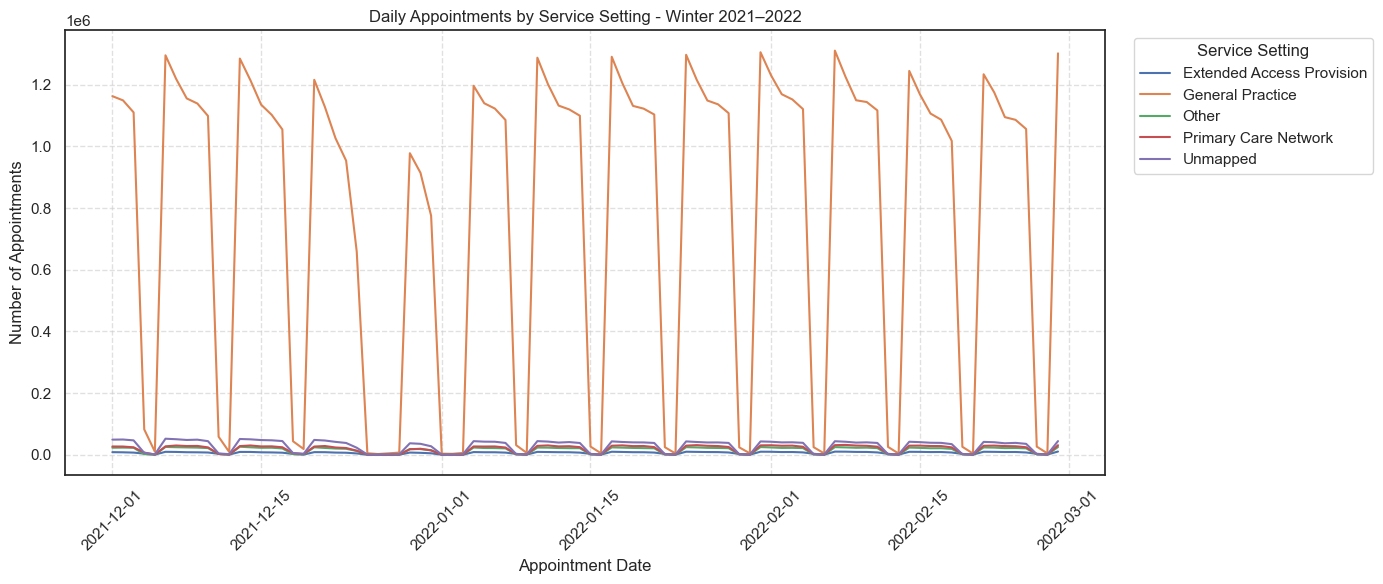

In [121]:
# Daily Lineplot for Winter (Dec 2021 to Feb 2022)

# Ensure appointment_date is in datetime format
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Filter for winter dates
nc_winter_daily = nc[
    (nc['appointment_date'] >= '2021-12-01') &
    (nc['appointment_date'] <= '2022-02-28')
]

# Group by appointment_date and service_setting
nc_winter_daily_grouped = nc_winter_daily.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Plot daily lineplot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=nc_winter_daily_grouped,
    x='appointment_date',
    y='count_of_appointments',
    hue='service_setting',   
    errorbar=None
)

# Style the plot
plt.title("Daily Appointments by Service Setting - Winter 2021–2022")
plt.xlabel("Appointment Date")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Service Setting', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

Winter 2021–22 displays a consistent weekly appointment pattern, with lower volumes on weekends and a modest dip around the late December period, likely reflecting the impact of Christmas and New Year public holidays. 

Despite the concurrent Omicron wave, overall service delivery remained relatively stable, suggesting that the NHS maintained a steady level of appointments throughout winter.

**Spring:**  March to May 2022

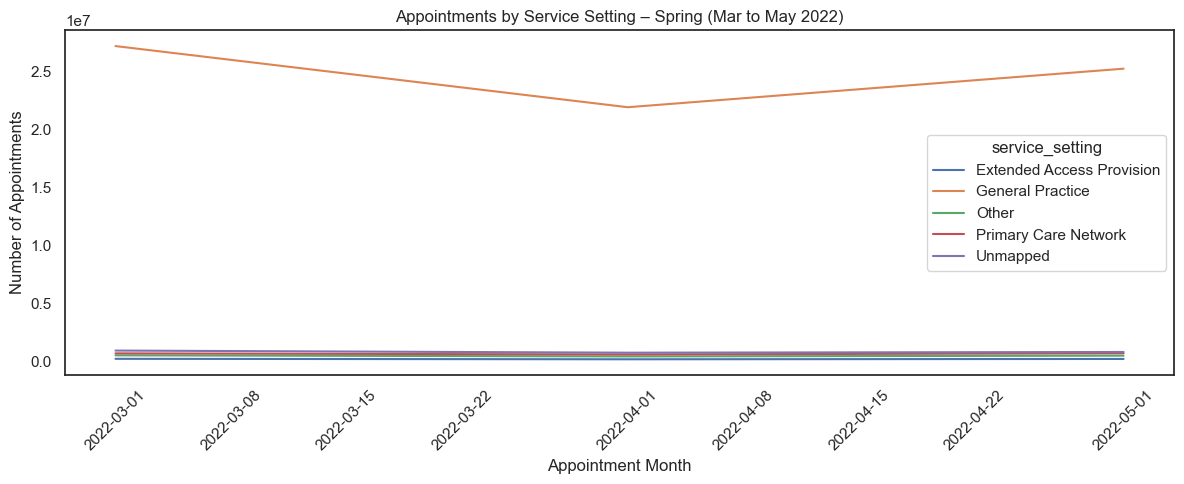

In [122]:
# Spring: March to May 2022

# Filter the nc dataset for spring months
nc_spring = nc[nc['appointment_month'].isin(['2022-03', '2022-04', '2022-05'])]

# Group by appointment_month and service_setting, and calculate total appointments
nc_spring_grouped = nc_spring.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the output
nc_spring_grouped.head()

# Create a lineplot to visualise appointments by service setting during spring
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=nc_spring_grouped,
    x='appointment_month',            
    y='count_of_appointments',        
    hue='service_setting',            
    errorbar=None                      # Disable confidence intervals for Seaborn ≥ 0.12.0
)

# Format the plot
plt.title("Appointments by Service Setting – Spring (Mar to May 2022)")
plt.xlabel("Appointment Month")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A dip in April 2022 - likely not related to COVID-19 as restrictions had ended and NHS services were actively working to recover appointment volumes.
It may be impacted by seasonal factors like Easter public holidays, school breaks, and staff leave.

The reduction in appointment volume in April 2022 may partially reflect a data change: this is the first month where NHS Digital clearly stated that COVID-19 vaccination appointments were excluded from the published dataset. While the methodology notes this exclusion applies “from December 2020 onwards,” earlier datasets — including March 2022 — appear to have included vaccination appointments in total counts. The April 2022 publication is the first to formally reference their removal, which likely contributed to the visible drop in appointment volumes that month. Links to reference:[April 2022](https://digital.nhs.uk/data-and-information/publications/statistical/appointments-in-general-practice/april-2022 )  [March 2022](https://digital.nhs.uk/data-and-information/publications/statistical/appointments-in-general-practice/appointments-in-general-practice-supporting-information).

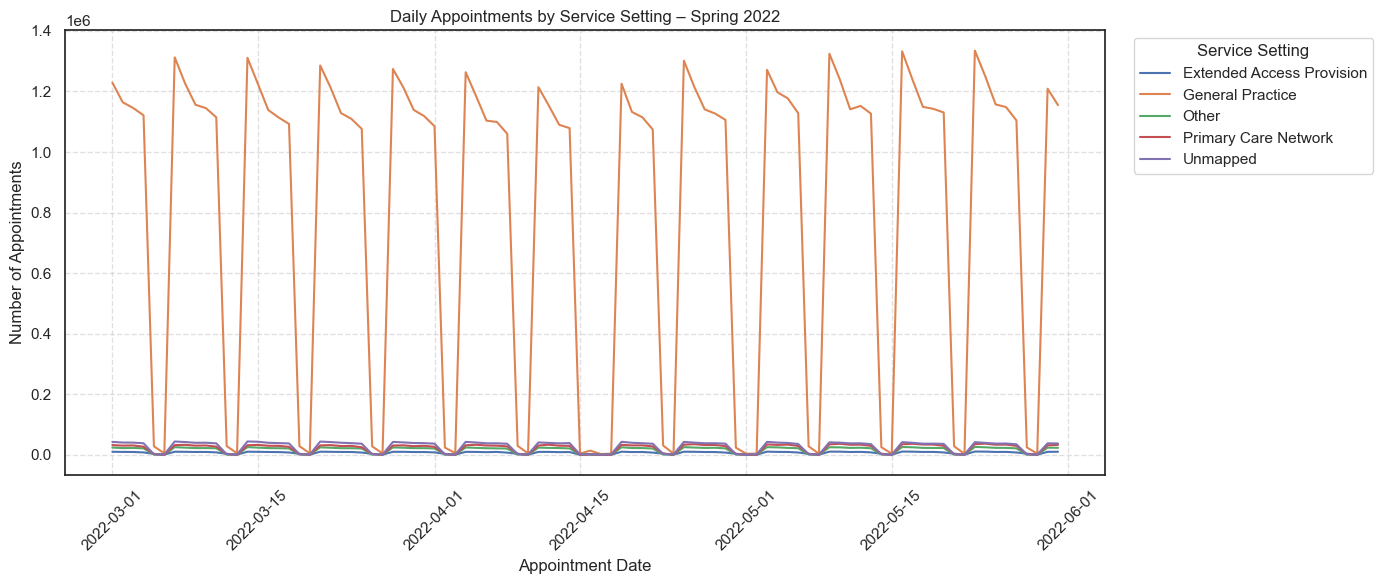

In [123]:
# Daily Lineplot for Spring (Mar to May 2022)

# Ensure appointment_date is in datetime format
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Filter for spring dates
nc_spring_daily = nc[
    (nc['appointment_date'] >= '2022-03-01') &
    (nc['appointment_date'] <= '2022-05-31')
]

# Group by appointment_date and service_setting
nc_spring_daily_grouped = nc_spring_daily.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Plot daily lineplot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=nc_spring_daily_grouped,
    x='appointment_date',
    y='count_of_appointments',
    hue='service_setting',
    errorbar=None
)

# Style the plot
plt.title("Daily Appointments by Service Setting – Spring 2022")
plt.xlabel("Appointment Date")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Service Setting', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

Outside of the April dip, the rest demonstrates a stable, routine service delivery

### Daily Trends
- Using the nc DataFrame as it has 11 months of data from Aug 2021 to June 2022, and includes appointment date.
- The other data set with appointment date data is ad however it captures a shorter span of 8 months

In [124]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Set figure style.
sns.set(style='darkgrid', context='talk',palette='colorblind')

In [125]:
# Add 'day_of_week' columns for subsequent analysis of appointments by day.
nc['day_of_week'] = nc['appointment_date'].dt.day_name()
nc['day_of_week_index'] = nc['appointment_date'].dt.dayofweek

# View output.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  datetime64[ns]
 8   icb_name               781565 non-null  object        
 9   region_name            781565 non-null  object        
 10  sub_icb_location_code  817394 non-null  object        
 11  appointment_month_str  817394 non-null  object        
 12  day_of_week            817394 non-null  obje

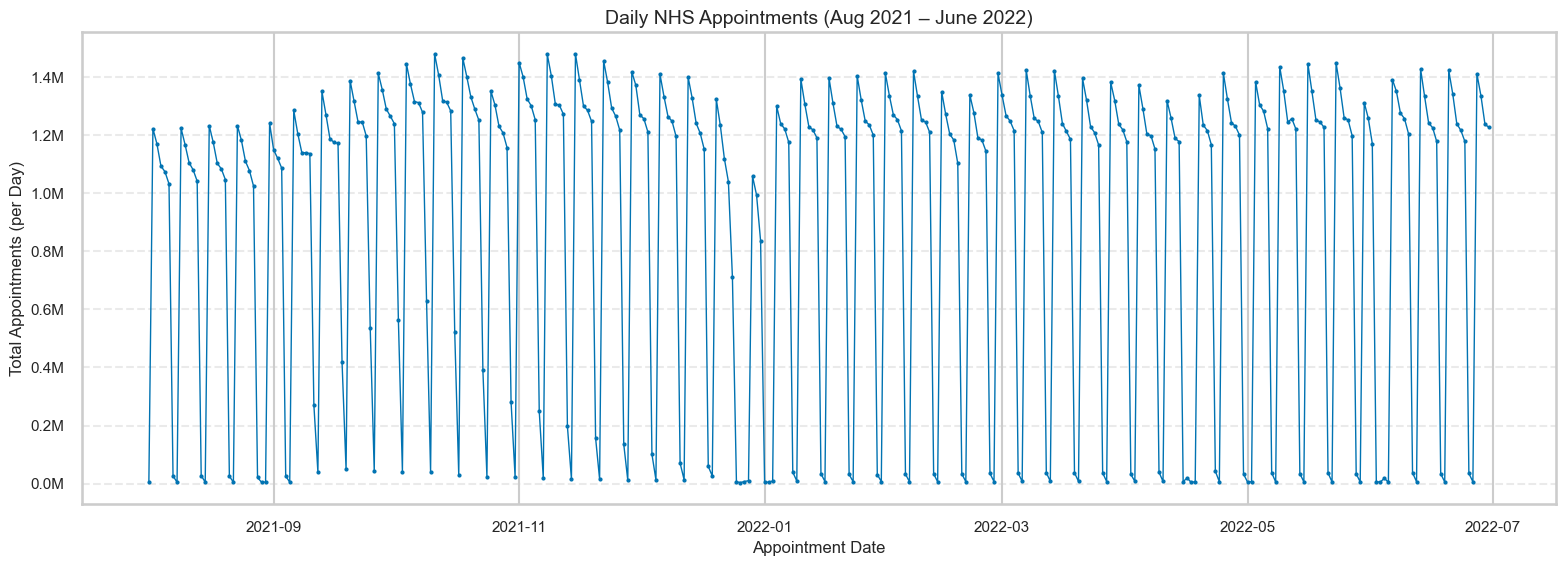

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Group daily data
nc_daily = (
    nc.groupby('appointment_date')['count_of_appointments']
    .sum()
    .reset_index()
)

# Plot daily appointments with dots
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

# Plot line + markers for daily points
plt.plot(
    nc_daily['appointment_date'],
    nc_daily['count_of_appointments'],
    label='Daily Appointments',
    linewidth=1,
    marker='o',
    markersize=2
)

# Axis formatting
plt.title("Daily NHS Appointments (Aug 2021 – June 2022)", fontsize=14)
plt.xlabel("Appointment Date", fontsize=12)
plt.ylabel("Total Appointments (per Day)", fontsize=12)

# Format y-axis to millions (e.g., 1.2M)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

There is a clear pattern in daily appointments with total appointments dipping each weekend. The individual dots represent a day of the week so improve clarity. daily totals. These weekend troughs are expected, reflecting limited service provision during Saturdays and Sundays.

A bar graph would be useful for count of appointments on each day of the week

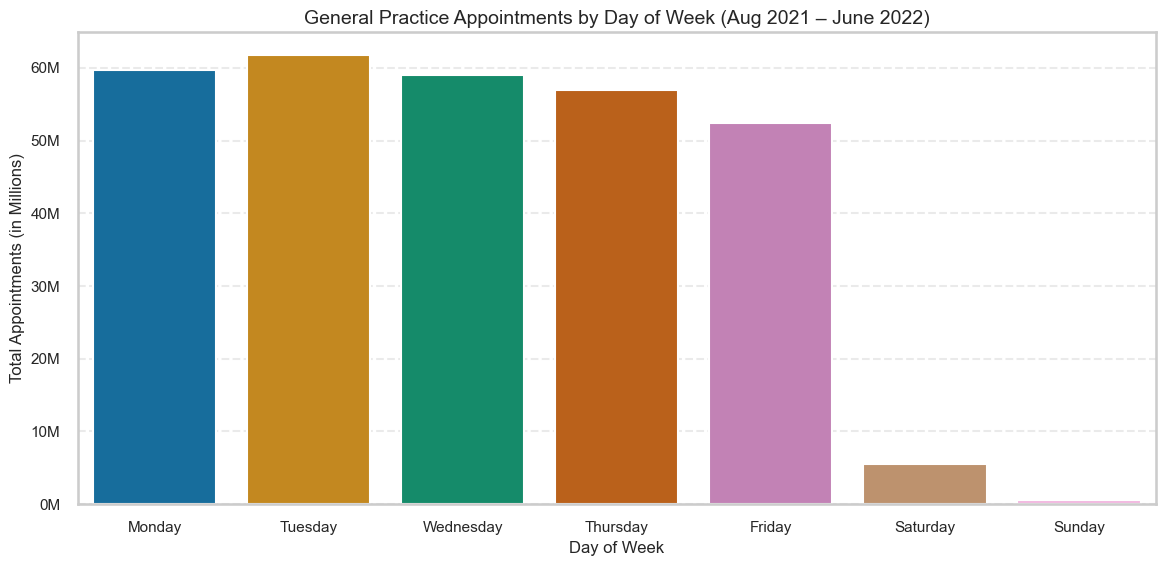

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors

# Group and label
nc_day = (
    nc.groupby(['day_of_week_index'])[['count_of_appointments']]
    .sum()
    .reset_index()
    .rename(columns={'day_of_week_index': 'Day Index', 'count_of_appointments': 'Total Appointments'})
)

# Map numeric day index to weekday names
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
nc_day['Day Name'] = nc_day['Day Index'].map(dict(enumerate(day_labels)))

# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor('white')

# Use colorblind palette
sns.barplot(data=nc_day, x='Day Name', y='Total Appointments', palette='colorblind', ax=ax)

# Titles and axis labels
plt.title("General Practice Appointments by Day of Week (Aug 2021 – June 2022)", fontsize=14)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Total Appointments (in Millions)", fontsize=12)

# Format y-axis ticks to show millions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

The graph shows that appointments are most concentrated at the start of the week, with Tuesday having the highest volume, followed closely by Monday. The slightly lower Monday figures are likely influenced by Bank Holidays, which typically fall on Mondays and reduce available appointment slots.

## Twitter Data
#### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [128]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set the figure size
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [129]:
# Import the tweets.csv file
tweets = pd.read_csv('tweets.csv')

# Display the first few rows to inspect
tweets.head()

tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

In [130]:
# View the bottom of the DataFrame
tweets.tail()

tweet_id  \
1169  1567583004209332227   
1170  1567582945342267393   
1171  1567582936014241792   
1172  1567582892892782592   
1173  1567582846847533058   

                                                                                                                                                                                              tweet_full_text  \
1169                                                           RT @PotomacPhotonic: Potomac #Innovation Report:  #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…   
1170  Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...   
1171  The @hfmaorg Region 9 presents "The Value of ESG to the Healthcare Industry" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...   
1172                                    Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC   
1173                                                             RT @KimcoStaffing: Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift -  Interviewing Now!! (#NewportBeach) #job http…   

                                                                                                                                                                                               tweet_entities  \
1169  {'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...   
1170  {'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...   
1171  {'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices': [209, 213]}, {'text': 'healthcare', 'indices': [235, 246]}], 'symbols': [], 'user_mentions': [{'screen_name': '...   
1172  {'hashtags': [{'text': 'bpt', 'indices': [30, 34]}, {'text': 'physiotherapy', 'indices': [35, 49]}, {'text': 'HealthyNation', 'indices': [51, 65]}, {'text': 'healthcare', 'indices': [66, 77]}, {'t...   
1173  {'hashtags': [{'text': 'MediQuestStaffing', 'indices': [41, 59]}, {'text': 'Hospital', 'indices': [69, 78]}, {'text': 'shift', 'indices': [85, 91]}, {'text': 'NewportBeach', 'indices': [115, 128]}...   

                                                      tweet_entities_hashtags  \
1169                        #Innovation, #precisionFabrication, #Microfluidic   
1170                                                     #SKPoli, #healthcare   
1171                                              #webinar, #ESG, #healthcare   
1172  #bpt, #physiotherapy, #HealthyNation, #healthcare, #medicalcare, #csjmu   
1173               #MediQuestStaffing, #Hospital, #shift, #NewportBeach, #job   

                                            tweet_metadata  \
1169  {'iso_language_code': 'en', 'result_type': 'recent'}   
1170  {'iso_language_code': 'en', 'result_type': 'recent'}   
1171  {'iso_language_code': 'en', 'result_type': 'recent'}   
1172  {'iso_language_code': 'en', 'result_type': 'recent'}   
1173  {'iso_language_code': 'en', 'result_type': 'recent'}   

      tweet_retweet_count  tweet_favorite_count  tweet_favorited  \
1169                    1                     0            False   
1170                    0                     1            False   
1171                    0                     0            False   
1172                    0                     5            False   
1173                    2                     0            False   

      tweet_retweeted tweet_lang  
1169            False       

In [131]:
# Explore the metadata and data set
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [132]:
# Check for missing values
tweets.isna().sum()

tweet_id                     0
tweet_full_text              0
tweet_entities               0
tweet_entities_hashtags    167
tweet_metadata               0
tweet_retweet_count          0
tweet_favorite_count         0
tweet_favorited              0
tweet_retweeted              0
tweet_lang                   0
dtype: int64

There are some tweets that don't have hashtags. 
It is possible that this holds valuable data so they have been left unchanged.

**Would it be useful to only look at retweeted and favourite tweet messages?**
It can be useful, but not sufficient, to only analyse retweeted and favourited tweets. These tweets typically reflect high engagement and can highlight topics that resonate most with the public. As such, they are valuable for identifying widely visible issues and prioritising public sentiment in decision-making.

However, focusing exclusively on highly engaged tweets can introduce bias. A tweet may receive low engagement for several reasons unrelated to its relevance or importance — for example:

- It may be newly posted and not yet widely seen,
- It could be informative or factual without being emotionally engaging (and therefore not likely to be liked or shared),
- It may come from users with a smaller follower base, limiting its reach.

To form a complete and balanced understanding of public discourse, it is important to consider both highly engaged tweets and those with lower engagement. An inclusive approach ensures that recurring hashtags, emerging concerns, or underrepresented voices are not overlooked. This provides a more robust foundation for NHS communication strategies and service improvement decisions.

**Filter the hashtags to get a count of most used**

In [133]:
# Create a new DataFrame containing only the text
tweets_text_only = tweets.select_dtypes(include=['object']).copy()

# View the first few rows
tweets_text_only.head()

tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata tweet_lang  
0  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
1  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
2  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
3  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
4  {'iso_language_code': 'en', 'result_type': 'recent'}         en

In [134]:
# Loop through the messages, and create a list of values containing the # symbol
# Create an empty list to store hashtags
hashtags_in_text = []

for tweet in tweets_text_only['tweet_full_text']:
    hashtags = [word for word in tweet.split() if word.startswith('#')]
    hashtags_in_text.extend(hashtags)

# Display the first 30 records
hashtags_in_text[:30]

['#Healthcare',
 '#PremiseHealth',
 '#hiring',
 '#Healthcare',
 '#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 '#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '#disparities.',
 '#healthcare',
 '#alert',
 '#insurance',
 '#data',
 '#Healthcare',
 '#healthcare',
 '#Healthcare']

In [135]:
# Create a variable to store the hashtag data
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Convert to lowercase and strip trailing punctuation
            clean_tag = z.lower().strip('.,!?;:)\n\r')
            tags.append(clean_tag)

In [136]:
# Create a Series and count occurrences
tags_series = pd.Series(tags)

# Show top hashtags
print(tags_series.value_counts().head(30))

#healthcare                    768
#health                         83
#ai                             44
#medicine                       42
#job                            38
#medical                        35
#strategy                       30
#digitalhealth                  29
#pharmaceutical                 28
#marketing                      25
#biotech                        25
#pharma                         25
#competitiveintelligence        24
#medtwitter                     24
#meded                          23
#vaccine                        18
#technology                     18
#hiring                         18
#machinelearning                17
#covid                          17
#news                           17
#competitivemarketing           16
#coronavirus                    16
#womeninmedicine                16
#healthtech                     15
#wellness                       15
#covid19                        14
#doctorofveterinarymedicine     14
#telemedicine       

In [137]:
# Convert the Series to a DataFrame
hashtag_df = tags_series.value_counts().reset_index()

# Rename the columns
hashtag_df.columns = ['Hashtag', 'Count']

# View the top rows
hashtag_df.head()

Hashtag  Count
0  #healthcare    768
1      #health     83
2          #ai     44
3    #medicine     42
4         #job     38

In [138]:
# Display records where the count is larger than 10
# Filter hashtags that occur more than 10 times
popular_hashtags = hashtag_df[hashtag_df['Count'] > 10]

# View the result
popular_hashtags

Hashtag  Count
0                   #healthcare    768
1                       #health     83
2                           #ai     44
3                     #medicine     42
4                          #job     38
5                      #medical     35
6                     #strategy     30
7                #digitalhealth     29
8               #pharmaceutical     28
9                    #marketing     25
10                     #biotech     25
11                      #pharma     25
12     #competitiveintelligence     24
13                  #medtwitter     24
14                       #meded     23
15                     #vaccine     18
16                  #technology     18
17                      #hiring     18
18             #machinelearning     17
19                       #covid     17
20                        #news     17
21        #competitivemarketing     16
22                 #coronavirus     16
23             #womeninmedicine     16
24                  #healthtech     15
25                    #wellness     15
26                     #covid19     14
27  #doctorofveterinarymedicine     14
28                #telemedicine     14
29                    #medicare     14
30                     #science     14
31                   #education     14
32                        #tech     13
33                 #patientcare     13
34                      #foamed     13
35                     #nursing     12
36                #mentalhealth     12
37                   #hospitals     12
38                      #doctor     12
39                      #nurses     12
40                  #telehealth     12
41                  #innovation     11
42                     #medtech     11
43                        #data     11
44                         #usa     11
45       #digitaltransformation     11
46     drugs\n\n#tipsfornewdocs     11
47                #healthcareit     11

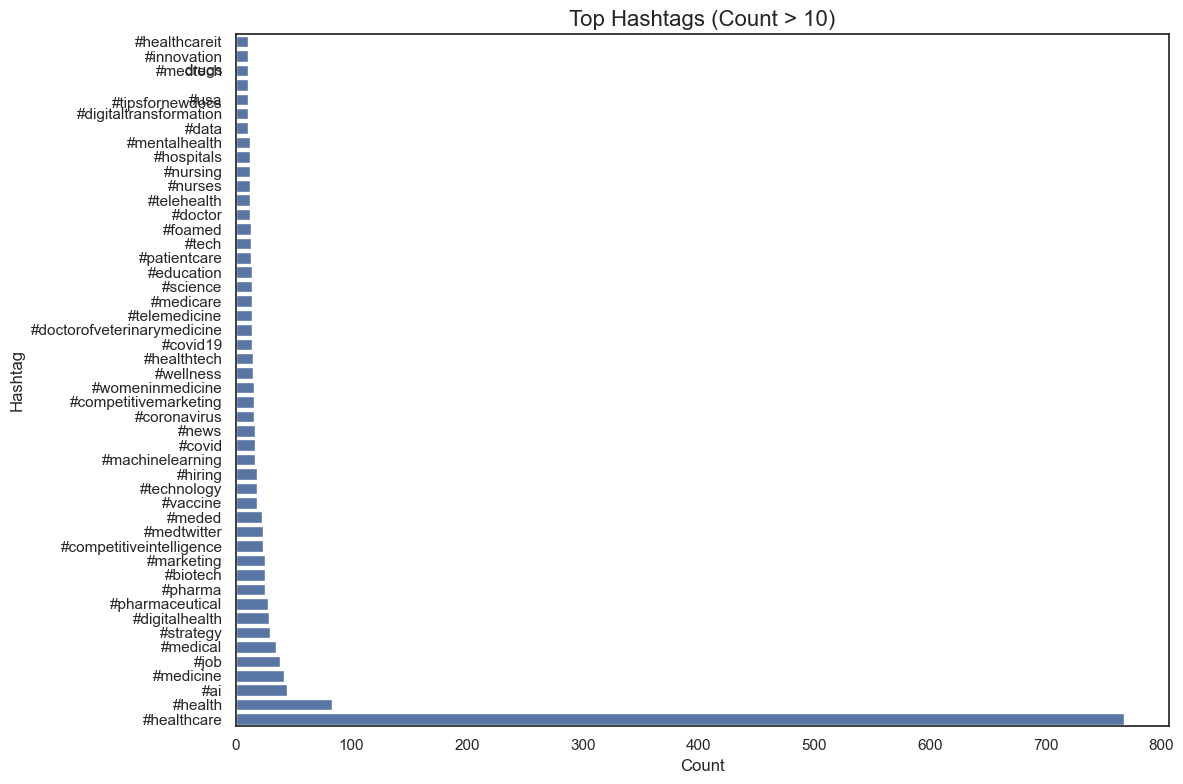

In [139]:
# Create a Seaborn barplot displaying records with a count larger than 10.
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by count for a clean visual
popular_hashtags = popular_hashtags.sort_values(by='Count', ascending=True)

# Create the barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=popular_hashtags, x='Count', y='Hashtag')

# Add labels and title
plt.title('Top Hashtags (Count > 10)', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

This chart has too much information that it lacks value

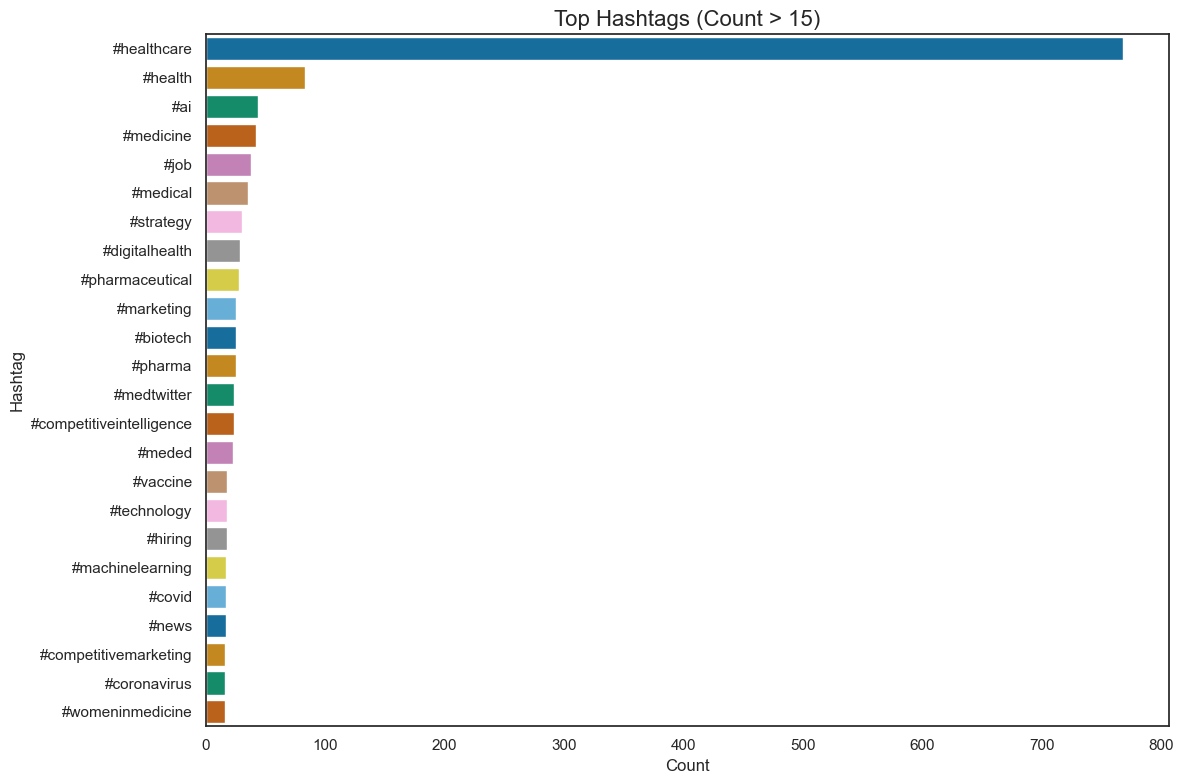

In [140]:
# The above chart feels too cluttered so changing to tweet count > 15

# Filter and sort hashtags with count > 15
popular_hashtags_15 = hashtag_df[hashtag_df['Count'] > 15].sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=popular_hashtags_15,
    x='Count',
    y='Hashtag',
    palette='colorblind'
)

# Remove the legend
plt.legend([], [], frameon=False)

# Add titles and labels
plt.title('Top Hashtags (Count > 15)', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

The above graph shows hashtags with a count greater than 15, this graph isn’t especially insightful but does show the clear dominance of #healthcare in the dataset.
The hashtags were placed on the y-axis to improve readability.

The next graph removes #healthcare and #health

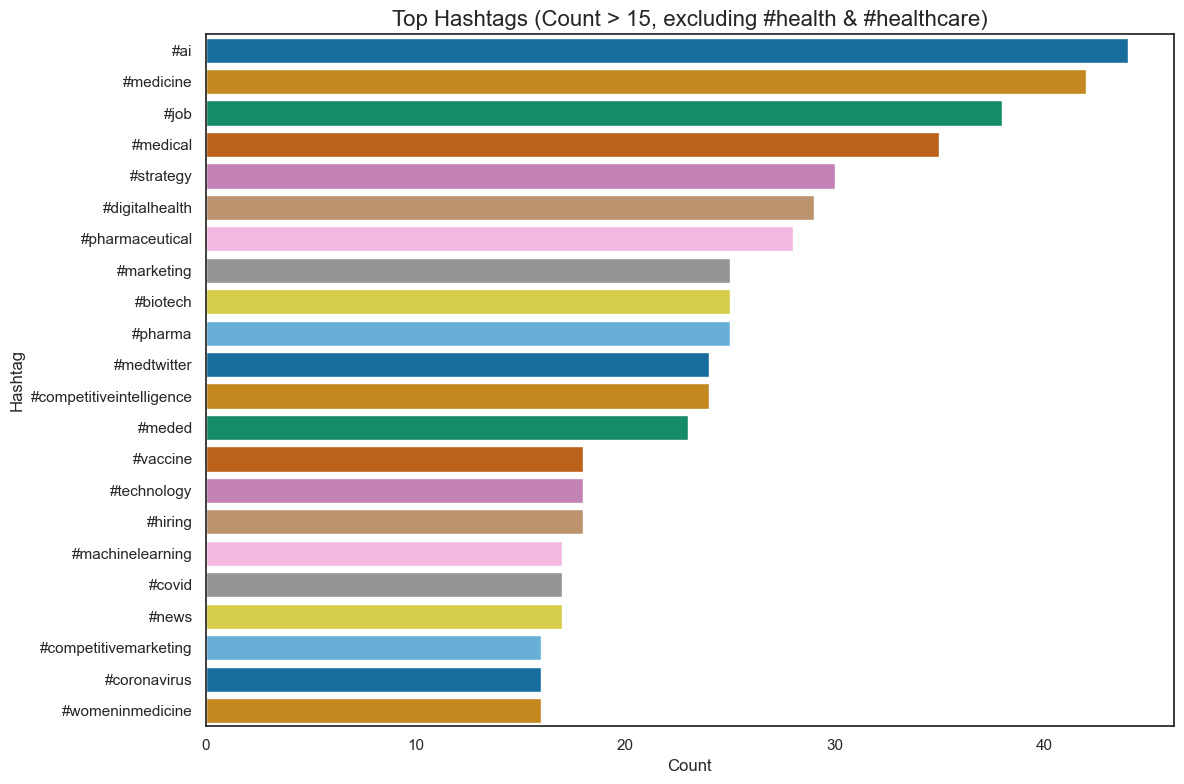

In [141]:
# Remove healthcare and health hashtags to view rest of results
# Define hashtags to exclude
excluded_tags = ['#health', '#healthcare']

# Filter for hashtags with count > 15 and exclude the dominant ones
filtered_hashtags = hashtag_df[
    (hashtag_df['Count'] > 15) & (~hashtag_df['Hashtag'].isin(excluded_tags))
].sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=filtered_hashtags,
    x='Count',
    y='Hashtag',
    palette='colorblind'
)

# Remove the legend
plt.legend([], [], frameon=False)

# Add titles and labels
plt.title('Top Hashtags (Count > 15, excluding #health & #healthcare)', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

To better understand the data outside of #healthcare, it was removed in the following graph, as well as #health. Key themes can be extracted:
- Focus on technology: #AI, #digitalhealth, #technology, #biotech, #machinelearning
- Focus on job market: #job, #marketing, #competitive marketing, #hiring, #womeninmedicine
- #covid, #coronavirus and #vaccine sit below technology themes
- Additional healthcare hashtags remain: #medicine, #medical, #pharma, #pharmaceutical

Next I filter the top favourited tweets to see if these are relevant to NHS

In [142]:
# Sort by favourite count
top_favourited_tweets = tweets.sort_values(by='tweet_favorite_count', ascending=False)

# Select relevant columns INCLUDING hashtags
top_favourited_tweets = top_favourited_tweets[['tweet_favorite_count', 'tweet_full_text', 'tweet_entities_hashtags']]

# Display top 10
top_favourited_tweets.head(10)

tweet_favorite_count  \
1156                    42   
9                       28   
442                     20   
84                      18   
1122                    17   
119                     14   
758                     13   
1098                    12   
342                     11   
1093                    10   

                                                                                                                                                                                              tweet_full_text  \
1156  Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...   
9                                                                                                                        You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥   
442                                                                                                                    How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb   
84    Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes savin...   
1122  Heart Failure, Myocardial Infarction &amp; immediate Treatment\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStude...   
119   More data that our 13+ 🇨🇦 #healthcare systems fall short of providing adequate access to care, even for those w/ a family physician.\n\nInstead of siloed solutions and further system fragmentation...   
758   Looking forward to speaking at #ConV2X on Sep 15! Ping me for a speaker discount if interested! Register at https://t.co/v20ebbXmdO \n\n.@BHTYjournal @hedera @acoerco\n#blockchain #DLT #healthcare...   
1098  @CapricornFMNews We have waiting to hear this kind of news now Sa is getting things correct there is absolutely nothing mahala #HealthCare services in SA must be paid by foreign nationals and loca...   
342   September is #WomenInMedicine Month! Thrilled to join @JulieSilverMD  #SheLeadsHealthcare @ELAMProgram &amp; @AMWADoctors  to #InvestInHer!\n\nI #InvestInHer to diversify the #healthcare #leadersh...   
1093  Thanks &amp; Happy #WomenInMedicine Month to AMWA Board Member @SusanHingle! We appreciate your contributions to #Healthcare &amp; your leadership in AMWA! Learn about AMWA's community &amp; initi...   

                                                                                                                                                           tweet_entities_hashtags  
1156  #TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid  
9                                                                                                                                                                      #Healthcare  
442                                                                                                                                                #comedy, #adulting, #healthcare  
84                                                                                                                                                           #healthcare, #cdnpoli  
1122  #TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid  
119                                                                                                                                                                    #healthcare  
758                                                                                                         

These tweets are irrelevant to the business case. They are further explored in the technical report.
The yellow highlight appeared automatically and I could not seem to remove it. 

In [143]:
# Filter and rank the tweets with the most retweets to see of relevance to the business case

# Remove duplicate tweets based on the text
unique_tweets = tweets.drop_duplicates(subset='tweet_full_text')

# Sort by retweet count in descending order
top_retweeted_tweets = unique_tweets.sort_values(by='tweet_retweet_count', ascending=False)

# Select columns to inspect
top_retweeted_tweets = top_retweeted_tweets[['tweet_retweet_count', 'tweet_full_text']]

# Display the top 10 unique retweeted tweets
top_retweeted_tweets.head(10)

tweet_retweet_count  \
263                   303   
27                    207   
1130                  169   
779                   150   
790                   107   
65                     85   
577                    79   
355                    78   
111                    76   
348                    73   

                                                                                                                                       tweet_full_text  
263    RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…  
27        RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…  
1130    RT @imedverse: I.V Drug Calculations Cheat Sheet\n\n@Pharma_Connect @imedverse #TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicar…  
779   RT @Khulood_Almani: 🔟#Applications of #AI in #healthcare \n\nv/@ValueCoders\n \n#digitalhealth #Healthtech #Health #DataScience #Bigdata #Analy…  
790    RT @Khulood_Almani: #Healthcare #DigitalTransformation Starts with This 6⃣Step Process\n\nv/@uptophealth\n#digitalhealth #AI #Python #DataScie…  
65        RT @SoniaFurstenau: Germany has one of the top ranked #healthcare systems in the world, while Canada’s is teetering. We both dedicate simil…  
577     RT @imedverse: Features of Lung Diseases\n\n#pulmonary #pulmtwitter #pulmonology #pulmonary #respiratory #internalmedicine #TipsForNewDocs #M…  
355     RT @Khulood_Almani: 🪑This #wearable Chair from Could be a Solution to many People’s Back Pain Due to Long Time Standing\n\n#wearable #healthc…  
111      RT @AWSCloudIndia: How is #data revolutionizing #healthcare? 💊 🚑 🏥 \n\nHear the prognosis from @DubeyPradeepK, Director of @intel's Parallel…  
348       RT @healthcare_NFT_: Really excited to be working with @TheGivingBlock on what is proving to be a historic campaign. #HealthCare Heroes are…

These tweets are irrelevant to the business case. 

**Is the Twitter data useful?**
The Twitter dataset used in this project falls short in offering the depth and context necessary to draw meaningful insights about NHS service utilisation or missed GP appointments. It lacks crucial metadata such as geolocation, user demographics, and timestamp accuracy, making it difficult to connect tweets with NHS performance metrics. Most content is general or unrelated to primary care, and there is no reliable way to differentiate between posts from patients versus healthcare professionals. However, past studies have shown that Twitter can offer valuable insights into public sentiment and healthcare experiences when collected and analysed using targeted methods like hashtags and structured campaigns.

Looking ahead, Twitter data could become a powerful complement to NHS administrative data if refined approaches are used. Techniques such as keyword filtering, sentiment analysis, and topic modelling could uncover real-time public perceptions, barriers to access, and behavioural patterns behind missed appointments. Nonetheless, ethical challenges around data privacy and representativeness remain. Additionally, changes to Twitter’s data access model—particularly the removal of free academic API access—pose financial and logistical barriers to future research. For Twitter to be a viable tool in NHS analytics, both methodological safeguards and practical feasibility must be carefully considered.

**Further information is provided in the technical report**

## Final Visualisations Required to Answer Business Questions

#### A graph of Activity via Total Sum of Appointments over 30 months

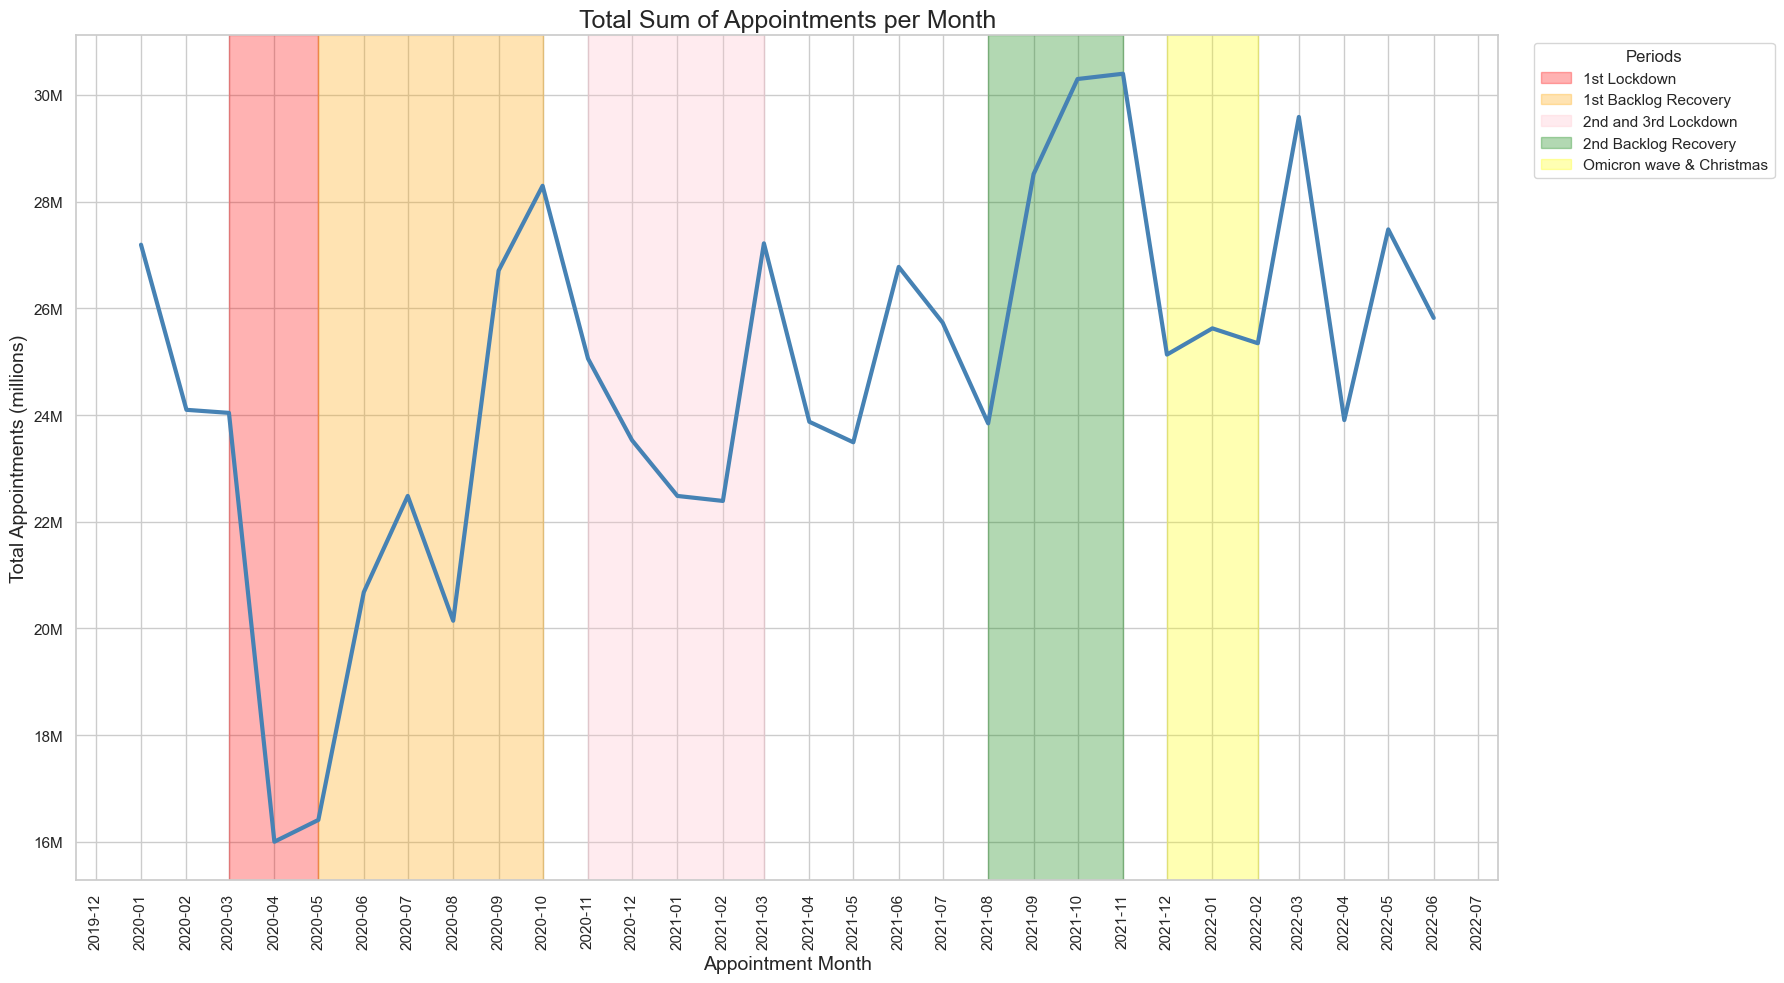

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
import matplotlib.dates as mdates

# Prep data
monthly_appointments = ar.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
monthly_appointments['appointment_month'] = pd.to_datetime(monthly_appointments['appointment_month'])

# Plot style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(18, 10))

# Line plot
sns.lineplot(
    data=monthly_appointments,
    x='appointment_month',
    y='count_of_appointments',
    color="steelblue",
    linewidth=3
)

# Title and labels
plt.title("Total Sum of Appointments per Month", fontsize=18)
plt.xlabel("Appointment Month", fontsize=14)
plt.ylabel("Total Appointments (millions)", fontsize=14)

# Format y-axis to show in millions, e.g., 16.0M, 18.0M
plt.gca().yaxis.set_major_locator(MultipleLocator(2_000_000))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Set x-axis to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)

# Add shaded lockdown/backlog periods
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2020-05-01"), color="red", alpha=0.3, label="1st Lockdown")
plt.axvspan(pd.to_datetime("2020-05-01"), pd.to_datetime("2020-10-01"), color="orange", alpha=0.3, label="1st Backlog Recovery")
plt.axvspan(pd.to_datetime("2020-11-01"), pd.to_datetime("2021-03-01"), color="pink", alpha=0.3, label="2nd and 3rd Lockdown")
plt.axvspan(pd.to_datetime("2021-08-01"), pd.to_datetime("2021-11-01"), color="green", alpha=0.3, label="2nd Backlog Recovery")
plt.axvspan(pd.to_datetime("2021-12-01"), pd.to_datetime("2022-02-01"), color="yellow", alpha=0.3, label="Omicron wave & Christmas")

# Legend formatting
plt.legend(
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    title="Periods",
    frameon=True,
    framealpha=0.8
)

plt.tight_layout()
plt.show()

This graph outlines the sum of appointments across the 30 month time frame. 

To visualise overall NHS appointment volume trends, I used the ar DataFrame to calculate the total number of appointments per month. The data was grouped by appointment_month, and a line graph was created to illustrate changes over the 30-month period from January 2020 to June 2022.

Formatting techniques were applied to improve readability:
- The y-axis was formatted to display total appointment counts in whole millions (e.g. 16M, 18M) using a custom tick formatter. This improves readability by avoiding scientific notation and making large numbers easier to interpret for a general audience.
- The x-axis was formatted to display each month clearly, with rotated labels for legibility.
- Shaded bands were added to highlight key periods.

#### Monthly Utilisation by Percentage

This methodology for this graph is outlined in detail in the technical report. 

In [145]:
# Calculate monthly utilisation (% of national capacity)
ar_utilisation = ar.groupby("appointment_month")["count_of_appointments"].sum().reset_index()

# NHS guideline: 1.2 million appointments per day
daily_capacity = 1_200_000

# Calculate utilisation as a percentage
ar_utilisation["utilisation"] = ((ar_utilisation["count_of_appointments"] / 30 / daily_capacity) * 100).round(1)

ar_utilisation.head()

appointment_month  count_of_appointments  utilisation
0        2020-01-01               27191758         75.5
1        2020-02-01               24097066         66.9
2        2020-03-01               24039635         66.8
3        2020-04-01               16002488         44.5
4        2020-05-01               16410591         45.6

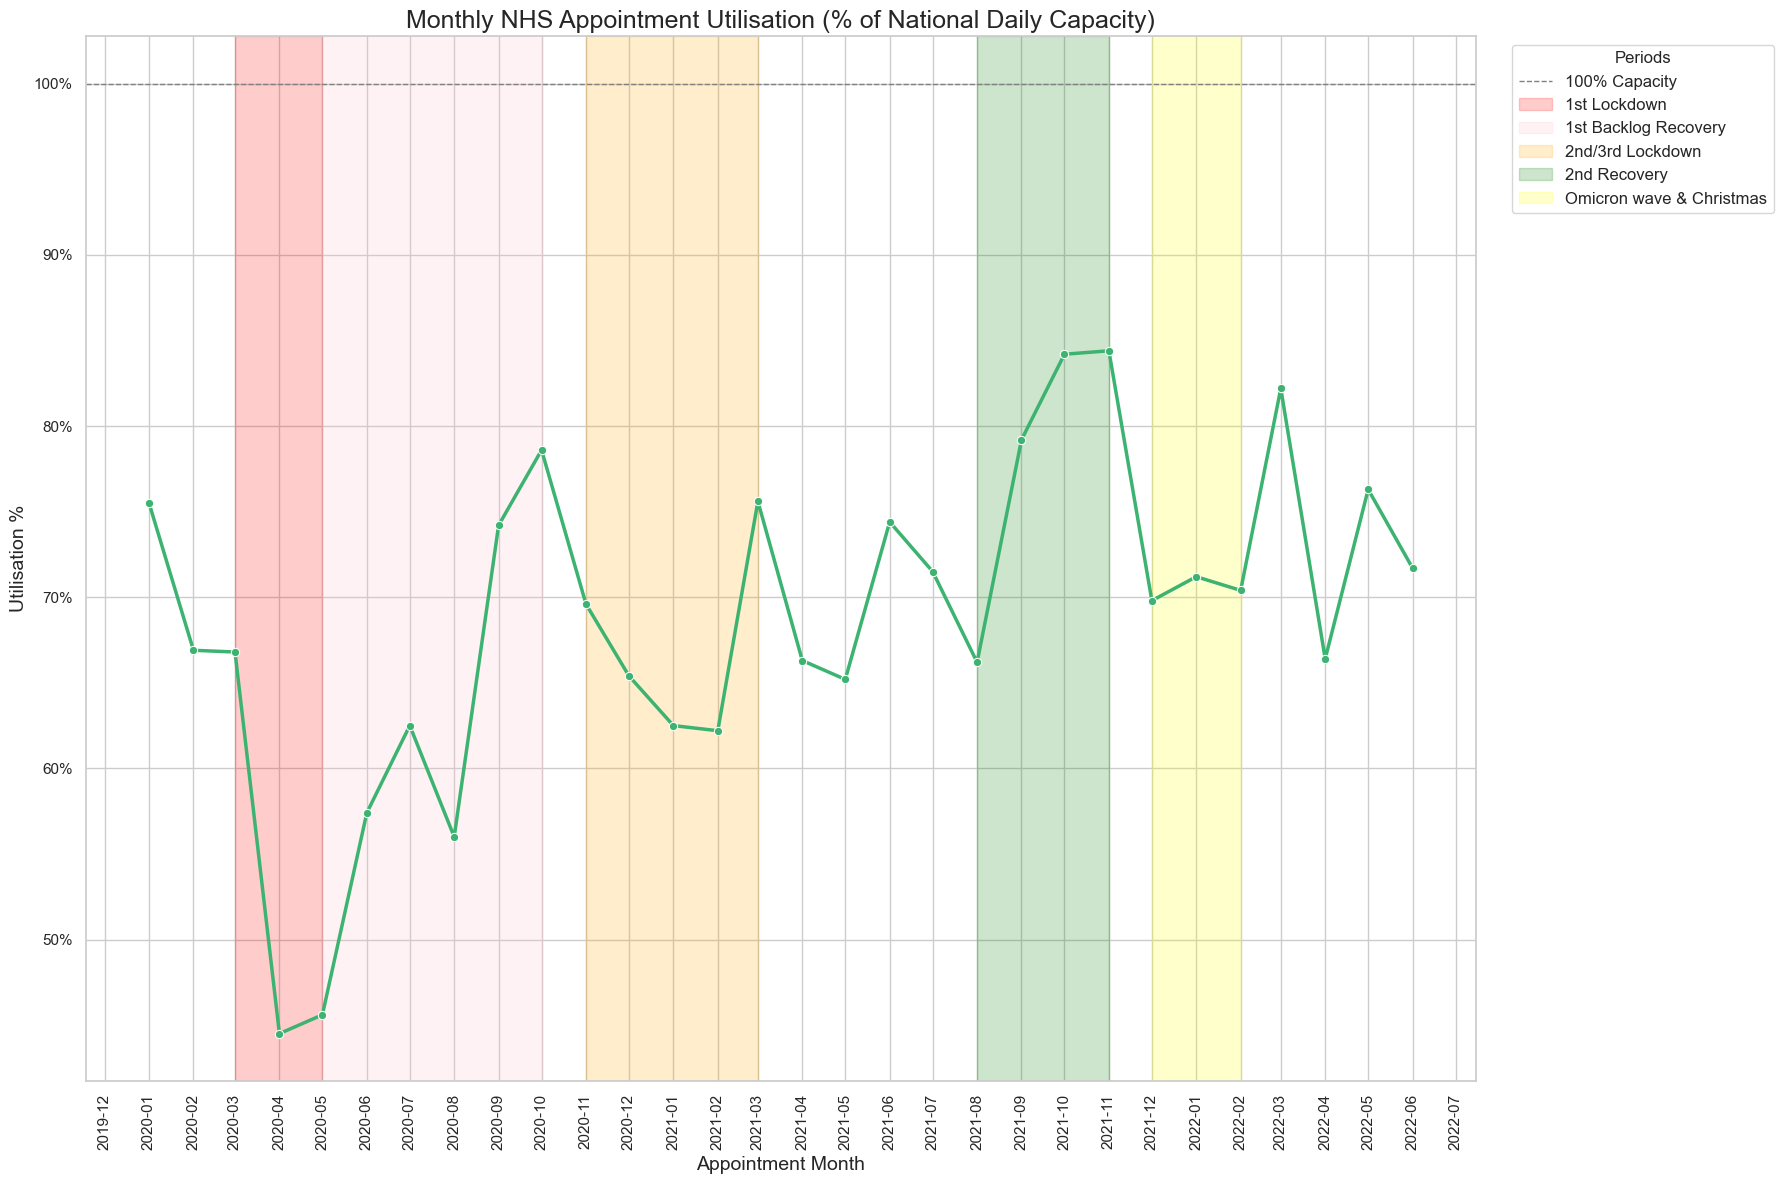

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.dates as mdates

# Convert to datetime
ar_utilisation['appointment_month'] = pd.to_datetime(ar_utilisation['appointment_month'], errors='coerce')

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(18, 12)) 

sns.lineplot(
    data=ar_utilisation,
    x="appointment_month",
    y="utilisation",
    color="mediumseagreen",
    linewidth=2.5,
    marker="o",
    markersize=6
)

# Titles and labels
plt.title("Monthly NHS Appointment Utilisation (% of National Daily Capacity)", fontsize=18)
plt.xlabel("Appointment Month", fontsize=14)
plt.ylabel("Utilisation %", fontsize=14)

# Format y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter())

# Show every month on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)

# Add 100% capacity line
plt.axhline(y=100, linestyle='--', color='gray', linewidth=1, label='100% Capacity')

# Add shaded periods
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2020-05-01"), color="red", alpha=0.2, label="1st Lockdown")
plt.axvspan(pd.to_datetime("2020-05-01"), pd.to_datetime("2020-10-01"), color="pink", alpha=0.2, label="1st Backlog Recovery")
plt.axvspan(pd.to_datetime("2020-11-01"), pd.to_datetime("2021-03-01"), color="orange", alpha=0.2, label="2nd/3rd Lockdown")
plt.axvspan(pd.to_datetime("2021-08-01"), pd.to_datetime("2021-11-01"), color="green", alpha=0.2, label="2nd Recovery")
plt.axvspan(pd.to_datetime("2021-12-01"), pd.to_datetime("2022-02-01"), color="yellow", alpha=0.2, label="Omicron wave & Christmas")

# Legend
plt.legend(
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    title="Periods",
    title_fontsize=12,  
    fontsize=12,        
    frameon=True,
    framealpha=0.8
)

plt.tight_layout()
plt.show()

While the average monthly utilisation of NHS appointment capacity appears to sit comfortably at 65%, this figure risks oversimplifying system performance. As noted by NHS England (2017), “utilisation is a measure of how much capacity is used” but aiming for consistently high utilisation can lead to overpressure, reduced staff morale, and adverse operational behaviours.

The 65% figure was calculated by averaging monthly utilisation percentages across the 30-month period. However, this method does not account for monthly variability, local surges, or structural constraints.

The trend line in this chart mirrors the pattern observed in the total sum of appointments graph above. This is expected, as utilisation is directly calculated from total appointment volume using a fixed national capacity benchmark. As such, both graphs reflect the same underlying fluctuations in service activity over time.

#### Appointment Modes Over Time

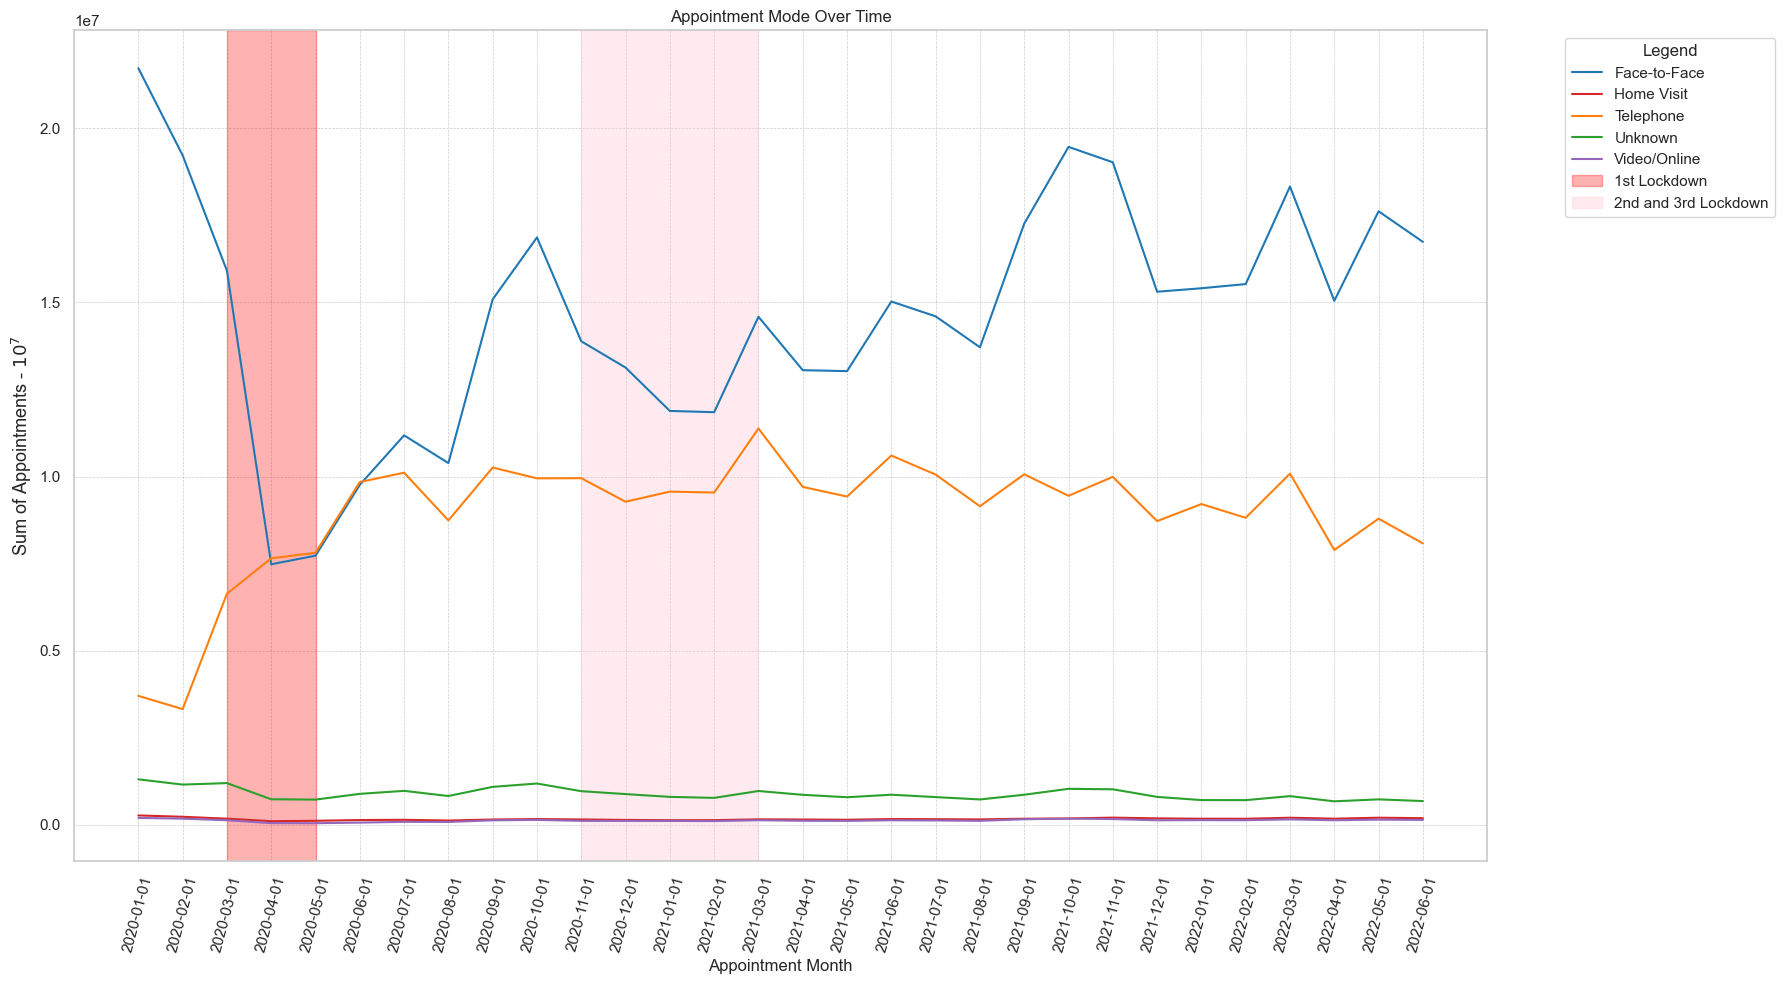

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color palette
# Wanted the colours to match the appointment mode bar graph
custom_palette = {
    'Face-to-Face': '#1f77b4',    # blue
    'Telephone': '#ff7f0e',       # orange
    'Unknown': '#2ca02c',         # green
    'Home Visit': '#d62728',      # red
    'Video/Online': '#9467bd'     # purple
}

plt.figure(figsize=(18, 10))

# Line plot with custom colors and inline grouping
sns.lineplot(
    data=ar.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index(),
    x="appointment_month",
    y="count_of_appointments",
    hue="appointment_mode",
    palette=custom_palette,  # apply colors
    estimator=None,
    ci=None
)

# Lockdown shading
plt.axvspan("2020-03-01", "2020-05-01", color="red", alpha=0.3, label="1st Lockdown")
plt.axvspan("2020-11-01", "2021-03-01", color="pink", alpha=0.3, label="2nd and 3rd Lockdown")

# Plot labels and styling
plt.title("Appointment Mode Over Time")
plt.xlabel("Appointment Month")
plt.ylabel("Sum of Appointments - $10^7$", fontsize=13)
plt.xticks(rotation=75)
plt.grid(True, linestyle="--", linewidth=0.5)

# Move legend far enough right to avoid overlapping
plt.legend(loc="upper left", title="Legend", bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

The monthly trend in appointment mode reveals several fluctuations, though face-to-face appointments consistently remain the most common. During the first lockdown, there is a noticeable drop in face-to-face appointments, likely driven by public health restrictions — while telephone appointments rose sharply in response.
Toward the later months of the dataset, telephone appointments gradually decline, while face-to-face delivery increases steadily, possibly reflecting patient or provider preference for in-person care. However, as highlighted in the report’s recommendations, this shift should be explored further to determine the reason behind it. 

#### Healthcare Professional Type Over Time

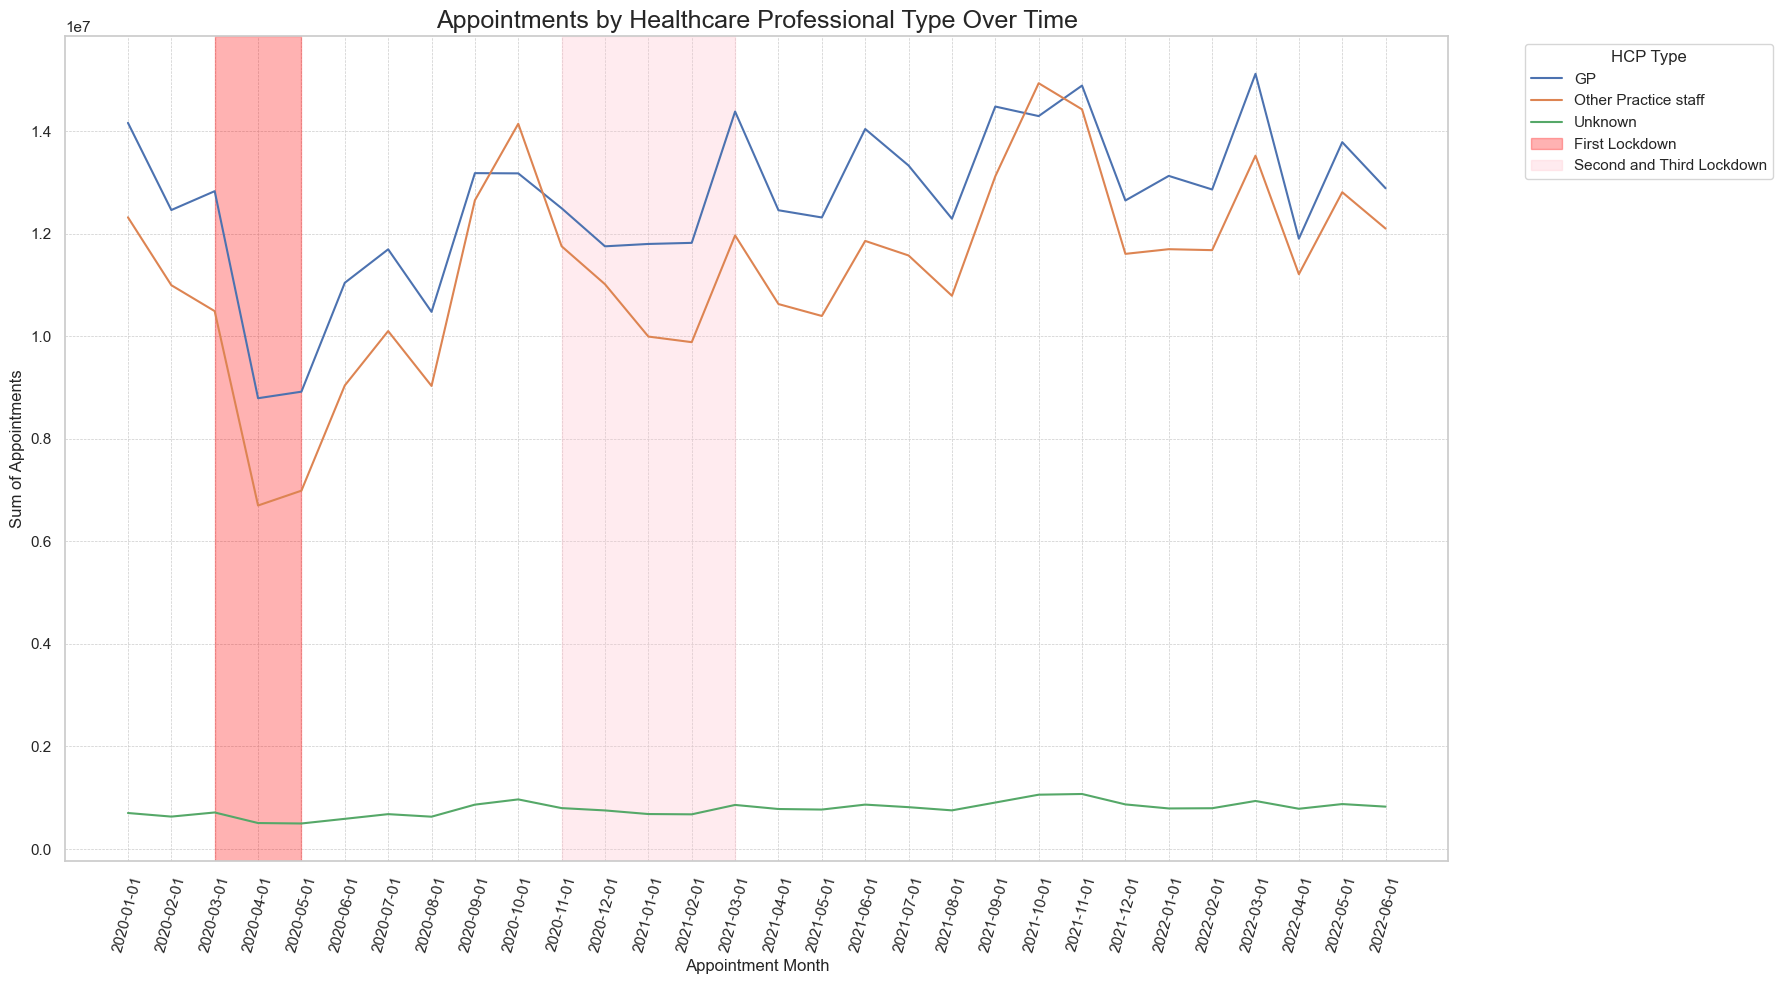

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data: Group by month and HCP type
hcp_time_series = (
    ar.groupby(['appointment_month', 'hcp_type'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(18, 10))
sns.lineplot(
    data=hcp_time_series,
    x='appointment_month',
    y='count_of_appointments',
    hue='hcp_type',  # Auto-coloured
    estimator=None,
    ci=None
)

# Lockdown shading
plt.axvspan("2020-03-01", "2020-05-01", color="red", alpha=0.3, label="First Lockdown")
plt.axvspan("2020-11-01", "2021-03-01", color="pink", alpha=0.3, label="Second and Third Lockdown")

# Labels and styling
plt.title("Appointments by Healthcare Professional Type Over Time", fontsize=18)
plt.xlabel("Appointment Month")
plt.ylabel("Sum of Appointments")
plt.xticks(rotation=75)
plt.grid(True, linestyle="--", linewidth=0.5)

# Legend
plt.legend(loc="upper left", title="HCP Type", bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

This graph shows that appointment trends for GPs and Other Practice Staff follow closely aligned patterns, with peaks and troughs occurring at similar points across the timeline. This likely attributes to a system-wide response, rather than isolated behaviour by certain regions. Interestingly, there are two distinct periods where Other Practice Staff briefly overtake GPs in appointment volume.

Expanding the use of Other Practice Staff — such as pharmacists, physiotherapists, and physician associates - plays an important role in tackling NHS workforce pressures and keeping up with rising demand.

## Key insights and Recommendations

### Capacity Insights

**NHS Daily Capacity Benchmark**

- Capacity analysed using NHS benchmark (Appendix xA)
- Average system-wide utilisation: 65%
- Appointment volumes increased over time despite challenges

**Local ICB Capacity Pressures**

- Proportional capacity calculated per ICB based on registered population (Appendix xC)
- Several months where over 80% of ICBs exceeded their expected monthly capacity
- Indicates local overstretch, even when national-level capacity appeared stable

### Utilisation Insights

**Region-Level Patterns**

- Total appointments vary by region and align broadly with population size
- Booking-to-appointment time is consistent across regions

**Service Setting**
- Decline in unmapped appointments
- Rise in PCN-attributed appointments likely reflects improved data recording and policy shifts

**Booking-to-Appointment Timing**
- 88% of appointments delivered within 14-day target
- 12% outside the target = approx. 91 million appointments
- Telephone appointments more likely to be same-day (60%+)

**Attendance Rates**
- 91% of appointments attended
- 4% missed = ~£925 million cost from Jan 2020–June 2022

**Healthcare Professional Usage**
- GPs deliver 51% of appointments; Other Practice Staff deliver 46%
- Indicates NHS is already leveraging a diversified workforce

**Appointment Delivery Mode**
- 59% face-to-face, 36% telephone
- GPs more likely to deliver telephone; Other Practice Staff more likely to deliver face-to-face

**Appointment Length**
- 24% of records affected by data quality issues
- 52% <15 minutes; 24% >15 minutes

**Daily Trends**
- Appointment volumes highest early in the week (Tuesdays peak)
- Slight drop on Mondays likely due to Bank Holidays

**Additional Attendance Factors**
- Higher attendance with shorter booking-to-appointment time
- Telephone appointments have higher attendance (95%) than face-to-face (89%)
- DNA rate: higher for Other Practice Staff at 6.5%, GPs = 2.56%

**Twitter Data**
- No significant insights
- Could be useful with more targeted collection, as outlined in technical report

### Capacity Recommendations
- NHS capacity can be addressed by expanding overall capacity or improving the efficiency of existing resources.
- Assessing capacity is complex due to variation across practices, staff availability, and operational models.
- National-level metrics are not sufficient; data should be collected at practice, ICB, and regional levels, and across all appointment categories.
- In the short term, resources should be reallocated at the ICB level to address localised demand.
- In the long term, capacity expansion is necessary, particularly through continued workforce growth.
- Given the rise in part-time and flexible working, the NHS should move away from relying solely on traditional full-time GP models and design systems that better support a non-FTE workforce.

### Utilisation Recommendations
- Rebalance delivery to achieve a 50/50 split between face-to-face and telephone appointments.
- Increase use of Other Practice Staff for both appointment types.
- Enforce a consistent 15-minute appointment duration.
- Ensure more staff are available earlier in the week to meet peak demand.
- Investigate the decline in telephone appointments — consider a patient education campaign to highlight the benefits.
- Improve data granularity to better assess how different staff types contribute to overall delivery.
- Focus on increasing same-day, telephone appointments with Other Practice Staff. They are more likely to be attended and are a more efficient use of resources.

>Thanks for reading this notebook. Please refer to the technical report for further detail about the analysis, especially in relation to the core business questions. 